In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import struct
import requests
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from scipy.fftpack import fft
from scipy.signal import get_window, spectrogram
import pickle
import re
from collections import Counter
from scipy.optimize import curve_fit

# only 111

In [2]:
#ZCU111 SBL list >5%
zcu111_list=np.array([
 'LERFUJI_2024-10-13_00-10-19.npz',
 'LERFUJI_2024-10-13_09-25-06.npz',
 'LERFUJI_2024-10-13_12-47-29.npz',
 'LERFUJI_2024-10-13_14-34-59.npz',
 'LERFUJI_2024-10-14_01-44-58.npz',
 'LERFUJI_2024-10-14_02-20-24.npz',
 'LERFUJI_2024-10-14_15-02-49.npz',
 'LERFUJI_2024-10-15_01-18-06.npz',
 'LERFUJI_2024-10-15_05-30-08.npz',
 'LERFUJI_2024-10-15_08-37-16.npz',
 'LERFUJI_2024-10-15_11-30-38.npz',
 'LERFUJI_2024-10-15_20-22-59.npz',
 'LERFUJI_2024-10-15_20-56-49.npz',
 'LERFUJI_2024-10-15_22-52-26.npz',
 'LERFUJI_2024-10-15_23-43-13.npz',
 'LERFUJI_2024-10-16_01-29-20.npz',
 'LERFUJI_2024-10-16_02-27-58.npz',
 'LERFUJI_2024-10-16_04-52-14.npz',
 'LERFUJI_2024-10-17_09-02-58.npz',
 'LERFUJI_2024-10-17_09-32-06.npz',
 'LERFUJI_2024-10-18_02-29-34.npz',
 'LERFUJI_2024-10-18_03-07-24.npz',
 'LERFUJI_2024-10-18_03-27-52.npz',
 'LERFUJI_2024-10-18_09-17-07.npz',
 'LERFUJI_2024-10-18_15-51-23.npz',
 'LERFUJI_2024-10-18_19-22-55.npz',
 'LERFUJI_2024-10-18_23-01-11.npz',
 'LERFUJI_2024-10-19_00-02-36.npz',
 'LERFUJI_2024-10-19_02-46-12.npz',
 'LERFUJI_2024-10-19_05-21-33.npz',
 'LERFUJI_2024-10-19_06-12-19.npz',
 'LERFUJI_2024-10-19_06-35-20.npz',
 'LERFUJI_2024-10-19_09-05-05.npz',
 'LERFUJI_2024-10-19_10-19-12.npz',
 'LERFUJI_2024-10-19_18-05-55.npz',
 'LERFUJI_2024-10-19_21-33-36.npz',
 'LERFUJI_2024-10-20_10-14-52.npz',
 'LERFUJI_2024-10-20_11-00-25.npz',
 'LERFUJI_2024-10-20_13-51-29.npz',
 'LERFUJI_2024-10-20_20-21-44.npz',
 'LERFUJI_2024-10-21_00-19-58.npz',
 'LERFUJI_2024-10-21_00-35-06.npz',
 'LERFUJI_2024-10-21_07-54-25.npz',
 'LERFUJI_2024-10-21_08-08-53.npz',
 'LERFUJI_2024-10-21_08-59-35.npz',
 'LERFUJI_2024-10-22_00-58-30.npz',
 'LERFUJI_2024-10-22_02-30-09.npz',
 'LERFUJI_2024-10-22_03-20-25.npz',
 'LERFUJI_2024-10-22_09-20-05.npz',
 'LERFUJI_2024-10-22_09-37-16.npz',
 'LERFUJI_2024-10-22_09-56-32.npz',
 'LERFUJI_2024-10-23_03-16-57.npz',
 'LERFUJI_2024-10-26_16-37-24.npz',
 'LERFUJI_2024-10-26_20-37-51.npz',
 'LERFUJI_2024-10-27_02-02-02.npz',
 'LERFUJI_2024-10-27_05-01-04.npz',
 'LERFUJI_2024-10-27_05-25-07.npz',
 'LERFUJI_2024-10-27_06-17-55.npz',
 'LERFUJI_2024-10-27_06-55-20.npz',
 'LERFUJI_2024-10-27_13-43-55.npz',
 'LERFUJI_2024-10-27_15-10-13.npz',
 'LERFUJI_2024-10-27_15-32-04.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-27_23-44-12.npz',
 'LERFUJI_2024-10-28_02-06-05.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-10-28_02-55-30.npz',
 'LERFUJI_2024-10-28_19-13-27.npz',
 'LERFUJI_2024-10-29_01-41-14.npz',
 'LERFUJI_2024-10-29_03-00-30.npz',
 'LERFUJI_2024-10-29_15-19-37.npz',
 'LERFUJI_2024-10-29_17-51-52.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-10-29_22-59-36.npz',
 'LERFUJI_2024-10-29_23-49-03.npz',
 'LERFUJI_2024-10-30_02-02-03.npz',
 'LERFUJI_2024-10-30_02-30-10.npz',
 'LERFUJI_2024-11-01_03-49-06.npz',
 'LERFUJI_2024-11-01_04-31-16.npz',
 'LERFUJI_2024-11-02_08-54-09.npz',
 'LERFUJI_2024-11-02_12-30-45.npz',
 'LERFUJI_2024-11-02_13-51-41.npz',
 'LERFUJI_2024-11-02_16-48-53.npz',
 'LERFUJI_2024-11-02_19-05-51.npz',
 #'LERFUJI_2024-11-03_01-33-25.npz',
 'LERFUJI_2024-11-03_03-33-06.npz',
 'LERFUJI_2024-11-03_03-58-26.npz',
 'LERFUJI_2024-11-03_11-46-08.npz',
 'LERFUJI_2024-11-03_17-35-45.npz',
 'LERFUJI_2024-11-03_17-56-46.npz',
 'LERFUJI_2024-11-03_20-11-52.npz',
 'LERFUJI_2024-11-03_23-57-50.npz',
 'LERFUJI_2024-11-04_04-14-19.npz',
 #'LERFUJI_2024-11-04_09-57-37.npz',
 'LERFUJI_2024-11-04_14-40-20.npz',
 'LERFUJI_2024-11-04_21-12-50.npz',
 'LERFUJI_2024-11-04_22-05-43.npz',
 'LERFUJI_2024-11-05_04-53-14.npz',
 'LERFUJI_2024-11-05_10-06-20.npz',
 'LERFUJI_2024-11-05_10-37-18.npz',
 'LERFUJI_2024-11-05_11-56-33.npz',
 'LERFUJI_2024-11-05_16-29-27.npz',
 'LERFUJI_2024-11-05_20-32-53.npz',
 'LERFUJI_2024-11-06_04-06-18.npz',
 'LERFUJI_2024-11-06_05-48-50.npz',
 #'LERFUJI_2024-11-07_16-25-57.npz',
 'LERFUJI_2024-11-08_08-50-27.npz',
 #'LERFUJI_2024-11-08_16-43-14.npz',
 #'LERFUJI_2024-11-08_16-58-08.npz',
 'LERFUJI_2024-11-09_08-59-06.npz',
 'LERFUJI_2024-11-09_23-06-12.npz',
 'LERFUJI_2024-11-10_03-27-52.npz',
 'LERFUJI_2024-11-11_05-25-24.npz',
 'LERFUJI_2024-11-11_10-54-27.npz',
 'LERFUJI_2024-11-11_11-42-48.npz',
 #'LERFUJI_2024-11-11_12-41-57.npz',
 'LERFUJI_2024-11-12_19-38-00.npz',
 'LERFUJI_2024-11-13_23-16-26.npz',
 'LERFUJI_2024-11-15_08-22-08.npz',
 'LERFUJI_2024-11-15_20-34-41.npz',
 'LERFUJI_2024-11-16_01-15-10.npz',
 'LERFUJI_2024-11-16_03-39-21.npz',
 'LERFUJI_2024-11-18_03-28-51.npz',
 #'LERFUJI_2024-11-22_23-42-46.npz'
])

pressure=[
'D10_L02/03',
'D10_L02/03',
'D04_L07',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D04_L06',
'D10_L02/03',
'D10_L02/03',
'D04_L07',
'D10_L02/03',
'D10_L06',
'D10_L02/03',
'nan',
'D10_L02/03',
'D10_L02/03',
'D04_L05',
'nan',
'nan',
'D04_L04',
'D10_L02/03',
'D10_L07',
'D10_L07',
'D10_L02/03',
'D10_L02/03',
'D04_L06',
'D10_L02/03',
'D04_L04',
'D10_L02/03',
'nan',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L05',
'D10_L08',
'D10_L08',
'D10_L08',
'D10_L05',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L08',
'D10_L08',
'D10_L02/03',
'D10_L05',
'D05_L23',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D04_L07',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L05',
'D10_L02/03',
'D10_L07',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D02_L18',
'D10_L02/03',
#'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'nan',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
#'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
'D10_L02/03',
#'nan',
'D10_L06',
#'nan',
#'nan',
'D04_L04',
'D10_L07',
'D10_L06',
'D02_L18',
'D02_L25',
'D05_L25',
#'D10_L07',
'D11_L19',
'D08_L12',
'nan',
'D06_L12',
'D04_L02',
'D06_L12',
'D10_L02/03',
#'D10_L08'
]

optics=np.array([
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
#1,
1,
1,
1,
1,
1,
1,
1,
1,
#1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
#1,
1,
#1,
#1,
1,
1,
1,
1,
1,
1,
#1,
1,
1,
1,
1,
1,
1,
1,
#1
])

In [3]:
df = pd.DataFrame({
    'filrname': zcu111_list,
    'pressure': pressure,
    'optics': optics
})


In [4]:
pd.set_option('display.max_rows', None)  # 行の表示制限を解除
df

filrname    pressure  optics
0    LERFUJI_2024-10-13_00-10-19.npz  D10_L02/03       0
1    LERFUJI_2024-10-13_09-25-06.npz  D10_L02/03       0
2    LERFUJI_2024-10-13_12-47-29.npz     D04_L07       0
3    LERFUJI_2024-10-13_14-34-59.npz  D10_L02/03       0
4    LERFUJI_2024-10-14_01-44-58.npz  D10_L02/03       0
5    LERFUJI_2024-10-14_02-20-24.npz  D10_L02/03       0
6    LERFUJI_2024-10-14_15-02-49.npz  D10_L02/03       0
7    LERFUJI_2024-10-15_01-18-06.npz  D10_L02/03       0
8    LERFUJI_2024-10-15_05-30-08.npz  D10_L02/03       0
9    LERFUJI_2024-10-15_08-37-16.npz  D10_L02/03       0
10   LERFUJI_2024-10-15_11-30-38.npz     D04_L06       0
11   LERFUJI_2024-10-15_20-22-59.npz  D10_L02/03       0
12   LERFUJI_2024-10-15_20-56-49.npz  D10_L02/03       0
13   LERFUJI_2024-10-15_22-52-26.npz     D04_L07       0
14   LERFUJI_2024-10-15_23-43-13.npz  D10_L02/03       0
15   LERFUJI_2024-10-16_01-29-20.npz     D10_L06       0
16   LERFUJI_2024-10-16_02-27-58.npz  D10_L02/03       0
17   LERFUJI_2024-10-16_04-52-14.npz         nan       0
18   LERFUJI_2024-10-17_09-02-58.npz  D10_L02/03       0
19   LERFUJI_2024-10-17_09-32-06.npz  D10_L02/03       0
20   LERFUJI_2024-10-18_02-29-34.npz     D04_L05       0
21   LERFUJI_2024-10-18_03-07-24.npz         nan       0
22   LERFUJI_2024-10-18_03-27-52.npz         nan       0
23   LERFUJI_2024-10-18_09-17-07.npz     D04_L04       0
24   LERFUJI_2024-10-18_15-51-23.npz  D10_L02/03       0
25   LERFUJI_2024-10-18_19-22-55.npz     D10_L07       0
26   LERFUJI_2024-10-18_23-01-11.npz     D10_L07       0
27   LERFUJI_2024-10-19_00-02-36.npz  D10_L02/03       0
28   LERFUJI_2024-10-19_02-46-12.npz  D10_L02/03       0
29   LERFUJI_2024-10-19_05-21-33.npz     D04_L06       0
30   LERFUJI_2024-10-19_06-12-19.npz  D10_L02/03       0
31   LERFUJI_2024-10-19_06-35-20.npz     D04_L04       0
32   LERFUJI_2024-10-19_09-05-05.npz  D10_L02/03       0
33   LERFUJI_2024-10-19_10-19-12.npz         nan       0
34   LERFUJI_2024-10-19_18-05-55.npz  D10_L02/03       0
35   LERFUJI_2024-10-19_21-33-36.npz  D10_L02/03       0
36   LERFUJI_2024-10-20_10-14-52.npz  D10_L02/03       0
37   LERFUJI_2024-10-20_11-00-25.npz  D10_L02/03       0
38   LERFUJI_2024-10-20_13-51-29.npz  D10_L02/03       0
39   LERFUJI_2024-10-20_20-21-44.npz  D10_L02/03       0
40   LERFUJI_2024-10-21_00-19-58.npz  D10_L02/03       0
41   LERFUJI_2024-10-21_00-35-06.npz  D10_L02/03       0
42   LERFUJI_2024-10-21_07-54-25.npz  D10_L02/03       0
43   LERFUJI_2024-10-21_08-08-53.npz  D10_L02/03       0
44   LERFUJI_2024-10-21_08-59-35.npz  D10_L02/03       0
45   LERFUJI_2024-10-22_00-58-30.npz     D10_L05       0
46   LERFUJI_2024-10-22_02-30-09.npz     D10_L08       0
47   LERFUJI_2024-10-22_03-20-25.npz     D10_L08       0
48   LERFUJI_2024-10-22_09-20-05.npz     D10_L08       0
49   LERFUJI_2024-10-22_09-37-16.npz     D10_L05       0
50   LERFUJI_2024-10-22_09-56-32.npz     D10_L05       0
51   LERFUJI_2024-10-23_03-16-57.npz  D10_L02/03       0
52   LERFUJI_2024-10-26_16-37-24.npz  D10_L02/03       1
53   LERFUJI_2024-10-26_20-37-51.npz  D10_L02/03       1
54   LERFUJI_2024-10-27_02-02-02.npz  D10_L02/03       1
55   LERFUJI_2024-10-27_05-01-04.npz  D10_L02/03       1
56   LERFUJI_2024-10-27_05-25-07.npz  D10_L02/03       1
57   LERFUJI_2024-10-27_06-17-55.npz  D10_L02/03       1
58   LERFUJI_2024-10-27_06-55-20.npz  D10_L02/03       1
59   LERFUJI_2024-10-27_13-43-55.npz     D10_L08       1
60   LERFUJI_2024-10-27_15-10-13.npz     D10_L08       1
61   LERFUJI_2024-10-27_15-32-04.npz  D10_L02/03       1
62   LERFUJI_2024-10-27_21-28-33.npz     D10_L05       1
63   LERFUJI_2024-10-27_23-44-12.npz     D05_L23       1
64   LERFUJI_2024-10-28_02-06-05.npz  D10_L02/03       1
65   LERFUJI_2024-10-28_02-30-07.npz     D10_L05       1
66   LERFUJI_2024-10-28_02-55-30.npz  D10_L02/03       1
67   LERFUJI_2024-10-28_19-13-27.npz  D10_L02/03       1
68   LERFUJI_2024-10-29_01-41-14.npz  D10_L02/03       1
69   LERFUJI_2024-10-29_03-00-30.npz  

In [22]:
df[(df['optics']==1) & (df['pressure']=='D10_L02/03')]['filrname']

52     LERFUJI_2024-10-26_16-37-24.npz
53     LERFUJI_2024-10-26_20-37-51.npz
54     LERFUJI_2024-10-27_02-02-02.npz
55     LERFUJI_2024-10-27_05-01-04.npz
56     LERFUJI_2024-10-27_05-25-07.npz
57     LERFUJI_2024-10-27_06-17-55.npz
58     LERFUJI_2024-10-27_06-55-20.npz
61     LERFUJI_2024-10-27_15-32-04.npz
64     LERFUJI_2024-10-28_02-06-05.npz
66     LERFUJI_2024-10-28_02-55-30.npz
67     LERFUJI_2024-10-28_19-13-27.npz
68     LERFUJI_2024-10-29_01-41-14.npz
71     LERFUJI_2024-10-29_17-51-52.npz
73     LERFUJI_2024-10-29_22-59-36.npz
74     LERFUJI_2024-10-29_23-49-03.npz
75     LERFUJI_2024-10-30_02-02-03.npz
77     LERFUJI_2024-11-01_03-49-06.npz
79     LERFUJI_2024-11-02_08-54-09.npz
80     LERFUJI_2024-11-02_12-30-45.npz
81     LERFUJI_2024-11-02_13-51-41.npz
83     LERFUJI_2024-11-02_19-05-51.npz
84     LERFUJI_2024-11-03_03-33-06.npz
85     LERFUJI_2024-11-03_03-58-26.npz
87     LERFUJI_2024-11-03_17-35-45.npz
88     LERFUJI_2024-11-03_17-56-46.npz
89     LERFUJI_2024-11-03

In [5]:
len(optics)

117

In [6]:
np.unique(np.array(pressure))

array(['D02_L18', 'D02_L25', 'D04_L02', 'D04_L04', 'D04_L05', 'D04_L06',
       'D04_L07', 'D05_L23', 'D05_L25', 'D06_L12', 'D08_L12',
       'D10_L02/03', 'D10_L05', 'D10_L06', 'D10_L07', 'D10_L08',
       'D11_L19', 'nan'], dtype='<U10')

65
117
62


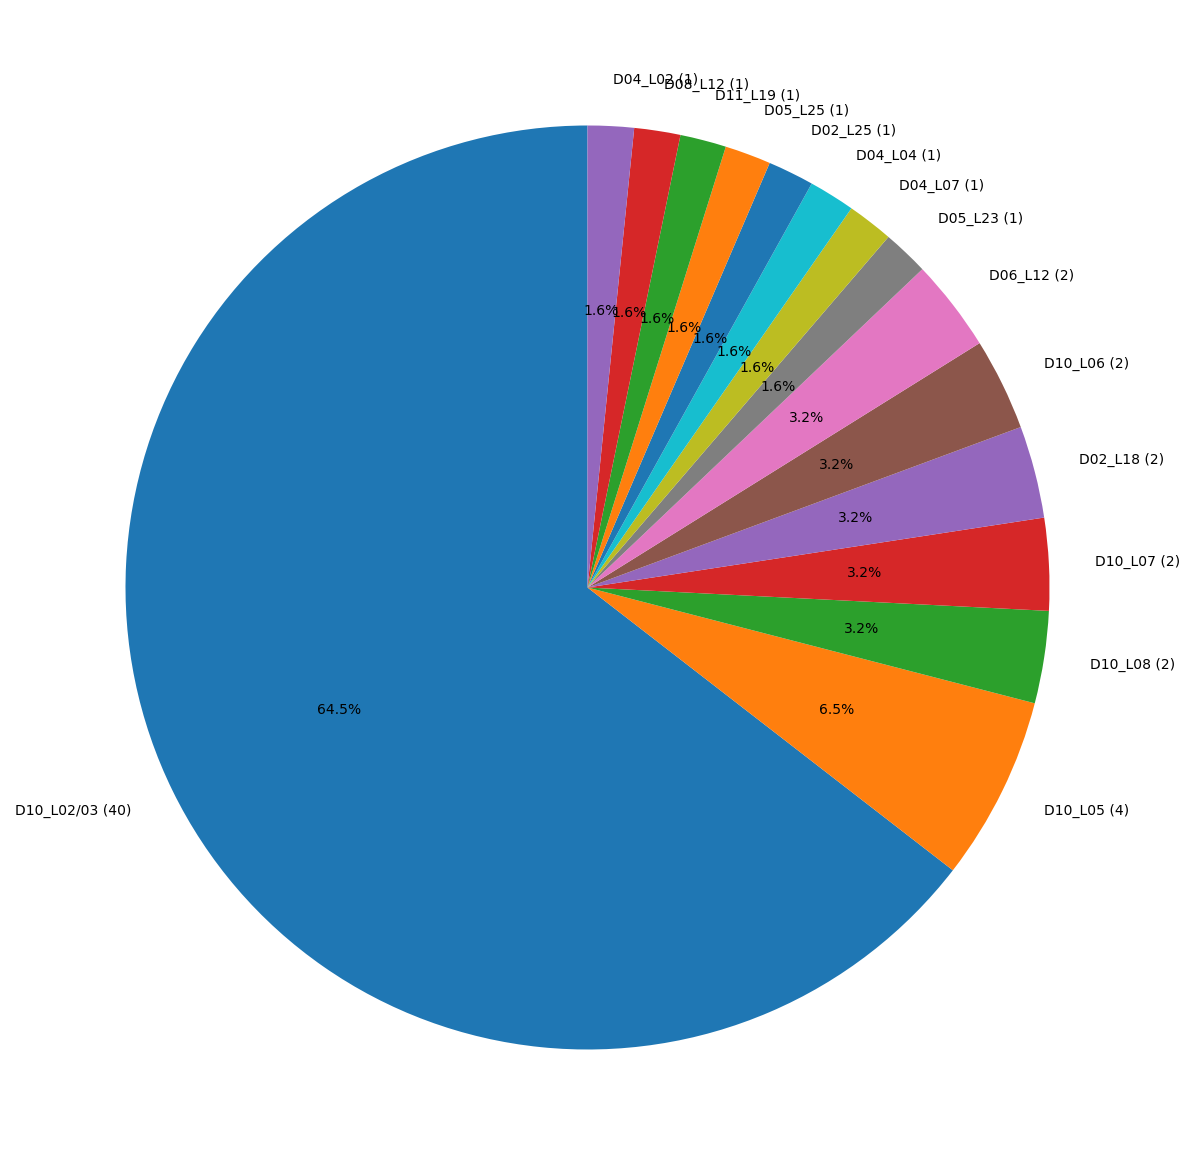

In [7]:
pressure_1mm = [a for a, b in zip(pressure, optics) if b == 1]
print(len(pressure_1mm))
print(len(pressure))
A = [fruit for fruit in pressure_1mm if fruit != 'nan']
print(len(A))

# 果物の数をカウントし、頻度が大きい順にソート
fruit_counts = Counter(A)
sorted_fruits = fruit_counts.most_common()
plt.figure(figsize=(15,15))
# 円グラフの作成
labels, counts = zip(*sorted_fruits)
plt.pie(counts, labels=[f'{label} ({count})' for label, count in sorted_fruits], autopct='%1.1f%%', startangle=90)
plt.show()

In [74]:
def make_plot(filename1,pressure):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']
    print(len(X_sum))

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz":
        return
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 1.5, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 1.5, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    iii=90
    a=tbtdata_111_x_ma[-iii*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_x))*0.6
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            iii*5120
        )
    index_111=index_111-iii*5120
    print(index_111)
    a=tbtdata_111_y_ma[-iii*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_y))*0.6
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            iii*5120
        )
    index_111_y=index_111_y-iii*5120
    print(index_111_y)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-80,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111.png',dpi=100)
    plt.close()
    print(time_111)
    print(time_111_y)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-15,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111_2.png',dpi=100)
    plt.close()

    plt.rcParams["font.size"] = 12
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    #ax1.set_title(f'{filename1[8:-4]}')

    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1,alpha=0.3)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.2,label='Moving average')
    ax1.axhline(y=np.nanstd(tbtdata_111_x)*0.6,c='blue',label='Threshold')
    ax1.axhline(y=-1*np.nanstd(tbtdata_111_x)*0.6,c='blue')
    ax1.vlines(time_111,-0.6,0.6,color='tab:blue')
    ax1.grid()
    ax1.legend(fontsize=10,loc='upper left')
    ax1.set_ylim(-0.2,0.2)
    ax1.set_ylabel('X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1,alpha=0.3)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.2,label='Moving average')
    ax2.axhline(y=np.nanstd(tbtdata_111_y)*0.6,c='blue',label='Threshold')
    ax2.axhline(y=-1*np.nanstd(tbtdata_111_y)*0.6,c='blue')
    ax2.vlines(time_111_y,-0.6,0.6,color='tab:blue')
    ax2.grid()
    ax2.legend(fontsize=10,loc='upper left')
    ax2.set_ylim(-0.2,0.2)
    ax2.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    ax2.set_ylabel('Y pos (mm)')
    """
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111*100,c='blue',s=1)
    ax3.grid()
    ax3.set_ylim(0,120)
    ax3.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    ax3.set_ylabel('Charge (%)')
    """
    plt.xlim(-8,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111_3.png',dpi=100)
    plt.close()

    fs=509e6
    signal=tbtdata_111_x_ma[-80*5120:]
    signal = pd.Series(signal).interpolate().to_numpy()
    signal = signal[~np.isnan(signal)]

    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), 1/fs)
    # 正の周波数のみ
    positive_freqs = frequencies[frequencies >= 0]
    positive_fft = 2/len(signal) * np.abs(fft_result[frequencies >= 0])
    
    # プロット
    plt.plot(positive_freqs/1e3, positive_fft)
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Amplitude')
    plt.xlim(0,150)
    plt.grid()
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111_fftx.png',dpi=100)
    plt.close()

    signal=tbtdata_111_y_ma[-80*5120:]
    signal = pd.Series(signal).interpolate().to_numpy()
    signal = signal[~np.isnan(signal)]

    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), 1/fs)
    # 正の周波数のみ
    positive_freqs = frequencies[frequencies >= 0]
    positive_fft = 2/len(signal) * np.abs(fft_result[frequencies >= 0])
    
    # プロット
    plt.plot(positive_freqs/1e3, positive_fft)
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Amplitude')
    plt.xlim(0,150)
    plt.grid()
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111_ffty.png',dpi=100)
    plt.close()

    return time_111,time_111_y, np.nanmax(tbtdata_111_x)-np.nanmin(tbtdata_111_x) ,np.nanmax(tbtdata_111_y)-np.nanmin(tbtdata_111_y) ,charge_time_111



In [9]:
time_111_x=[]
time_111_y=[]
amp_111_x=[]
amp_111_y=[]
charge_111=[]

for i in range(len(zcu111_list)):
    print(zcu111_list[i])
    a,b,c,d,e=make_plot(zcu111_list[i],pressure[i])
    time_111_x.append(a)
    time_111_y.append(b)
    amp_111_x.append(c)
    amp_111_y.append(d)
    charge_111.append(e)

time_111_x=np.array(time_111_x)
time_111_y=np.array(time_111_y)
amp_111_x=np.array(amp_111_x)
amp_111_y=np.array(amp_111_y)
charge_111=np.array(charge_111)

LERFUJI_2024-10-13_00-10-19.npz
524288
-460521
-57841
-89.9453125
-11.296875
LERFUJI_2024-10-13_09-25-06.npz
524288
-21314
-17357
-4.162695312500006
-3.389843749999997
LERFUJI_2024-10-13_12-47-29.npz
524288
-52546
-22281
-10.2626953125
-4.3515625
LERFUJI_2024-10-13_14-34-59.npz
524288
-36855
-25005
-7.198046875000003
-4.883593750000003
LERFUJI_2024-10-14_01-44-58.npz
524288
-23498
-13107
-4.5892578125000085
-2.559765624999997
LERFUJI_2024-10-14_02-20-24.npz
524288
-26972
-20493
-5.267773437499997
-4.0023437500000085
LERFUJI_2024-10-14_15-02-49.npz
524288
-24014
-21017
-4.690039062500006
-4.104687499999997
LERFUJI_2024-10-15_01-18-06.npz
524288
-100725
-67783
-19.672656250000003
-13.238671875000009
LERFUJI_2024-10-15_05-30-08.npz
524288
-26109
0
-5.099218750000006
-90.9998046875
LERFUJI_2024-10-15_08-37-16.npz
524288
-38517
-7474
-7.522656249999997
-1.4595703125000057
LERFUJI_2024-10-15_11-30-38.npz
524288
-167242
-34344
-32.664257812500004
-6.707617187500006
LERFUJI_2024-10-15_20-22-59

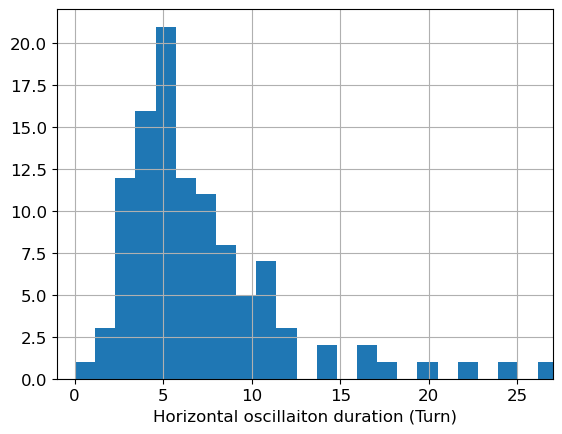

In [10]:
plt.hist(np.abs(time_111_x),bins=80)
plt.grid()
plt.xlim(-1,27)
plt.xlabel('Horizontal oscillaiton duration (Turn)')
plt.savefig('time111_x.png',dpi=100)
plt.show()

In [14]:
np.mean(np.abs(time_111_x))

11.553989716880345

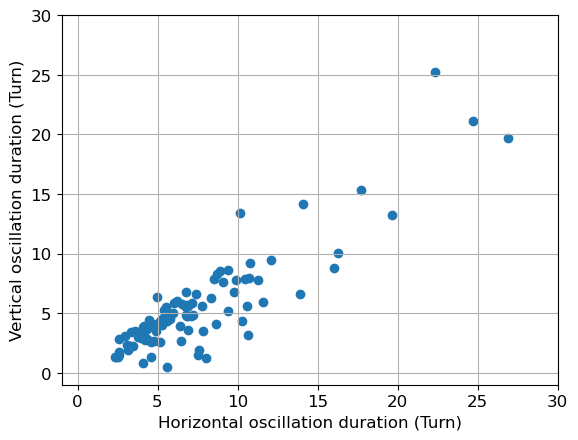

In [15]:

plt.scatter(np.abs(time_111_x),np.abs(time_111_y))
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.xlabel('Horizontal oscillation duration (Turn)')
plt.ylabel('Vertical oscillation duration (Turn)')
plt.grid()
plt.show()

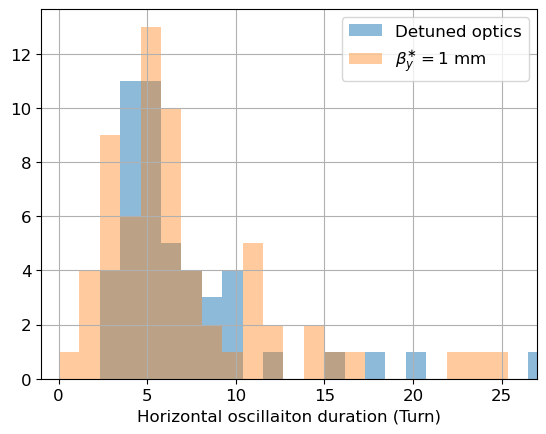

In [43]:
time_111_x=np.abs(time_111_x)
time_111_x_detuned = time_111_x[optics == 0]  # B=0のインデックスのA
time_111_x_1mm = time_111_x[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(time_111_x), max(time_111_x), 80) 
plt.hist(time_111_x_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned optics')
plt.hist(time_111_x_1mm, bins=bins, color='tab:orange', alpha=0.4, label=r'$\beta_y^{\ast}=$1 mm')
plt.grid()
plt.legend()
plt.xlim(-1,27)
plt.xlabel('Horizontal oscillaiton duration (Turn)')
plt.savefig('time111_x_optics.png',dpi=100)
plt.show()

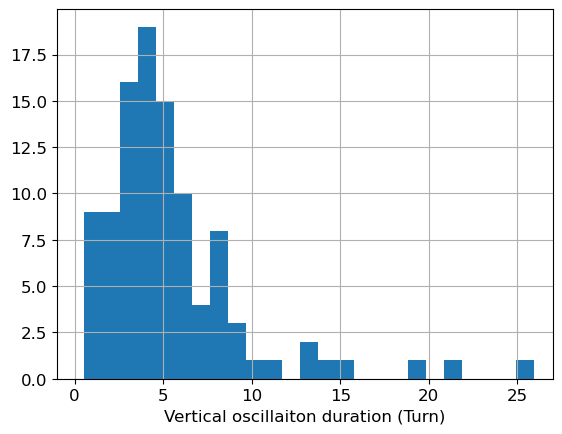

In [26]:
plt.hist(np.abs(time_111_y),bins=89)
plt.grid()
plt.xlim(-1,27)
plt.xlabel('Vertical oscillaiton duration (Turn)')
plt.savefig('time111_y.png',dpi=100)
plt.show()

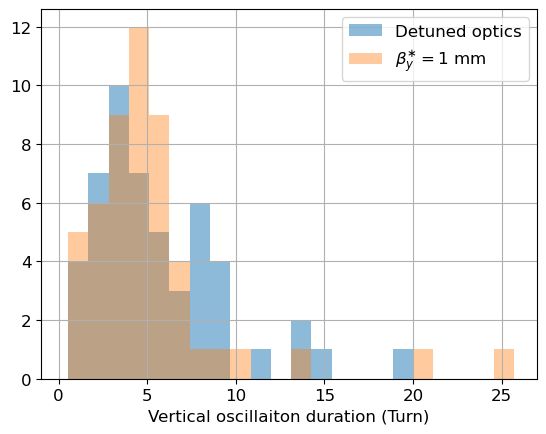

In [22]:
time_111_y=np.abs(time_111_y)
time_111_y_detuned = time_111_y[optics == 0]  # B=0のインデックスのA
time_111_y_1mm = time_111_y[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(time_111_y), max(time_111_y), 80) 
plt.hist(time_111_y_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned optics')
plt.hist(time_111_y_1mm, bins=bins, color='tab:orange', alpha=0.4, label=r'$\beta_y^{\ast}=$1 mm')
plt.grid()
plt.legend()
plt.xlim(-1,27)
plt.xlabel('Vertical oscillaiton duration (Turn)')
plt.savefig('time111_y_optics.png',dpi=100)
plt.show()

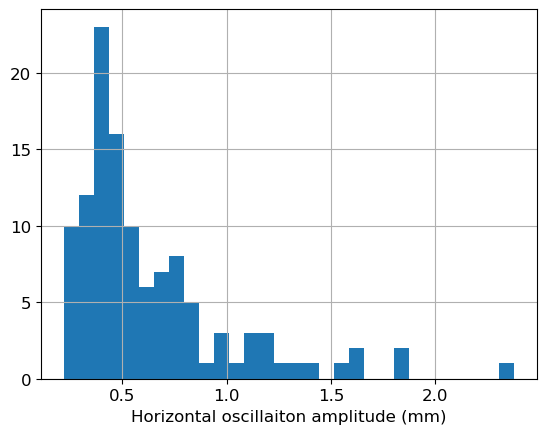

In [32]:
plt.hist(amp_111_x,bins=30)
plt.grid()
plt.xlabel('Horizontal oscillaiton amplitude (mm)')
#plt.xlim(0,2.1)
plt.savefig('amp111_x.png',dpi=100)
plt.show()


In [29]:
np.mean(amp_111_x)

0.6285539225562324

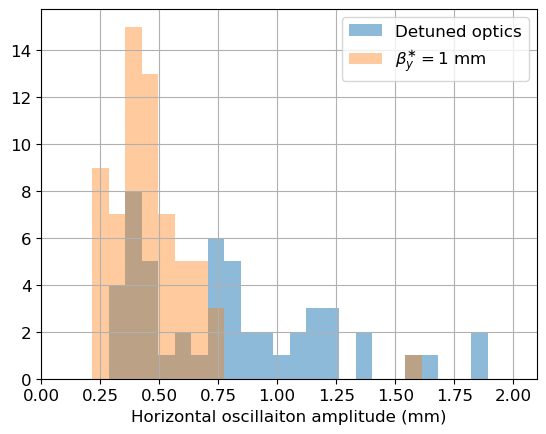

In [47]:
amp_111_x_detuned = amp_111_x[optics == 0]  # B=0のインデックスのA
amp_111_x_1mm = amp_111_x[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(amp_111_x), max(amp_111_x), 40) 
plt.hist(amp_111_x_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned optics')
plt.hist(amp_111_x_1mm, bins=bins, color='tab:orange', alpha=0.4, label=r'$\beta_y^{\ast}=$1 mm')
plt.grid()
plt.legend()
plt.xlim(0,2.1)
plt.xlabel('Horizontal oscillaiton amplitude (mm)')
plt.savefig('amp111_x_optics.png',dpi=100)
plt.show()

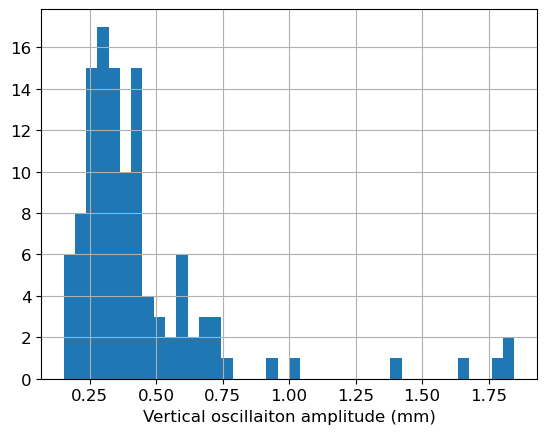

In [33]:
plt.hist(amp_111_y,bins=40)
plt.grid()
plt.xlabel('Vertical oscillaiton amplitude (mm)')
#plt.xlim(0,2.1)
plt.savefig('amp111_y.png',dpi=100)
plt.show()

In [31]:
np.mean(amp_111_y)

0.44510453221898455

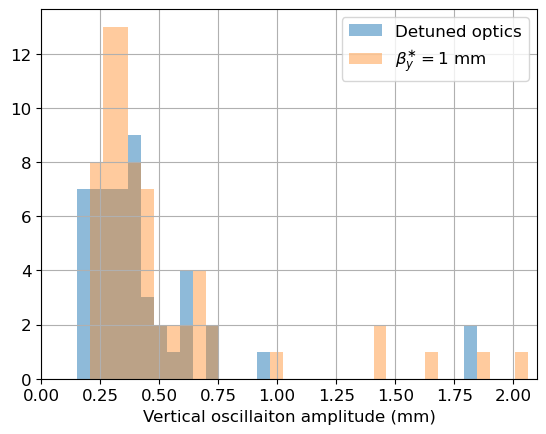

In [49]:
amp_111_y_detuned = amp_111_y[optics == 0]  # B=0のインデックスのA
amp_111_y_1mm = amp_111_y[optics == 1] # B=1のインデックスのA

# ヒストグラムの描画
bins = np.linspace(min(amp_111_y), max(amp_111_y), 40) 
plt.hist(amp_111_y_detuned, bins=bins, color='tab:blue', alpha=0.5, label='Detuned optics')
plt.hist(amp_111_y_1mm, bins=bins, color='tab:orange', alpha=0.4, label=r'$\beta_y^{\ast}=$1 mm')
plt.grid()
plt.legend()
plt.xlim(0,2.1)
plt.xlabel('Vertical oscillaiton amplitude (mm)')
plt.savefig('amp111_y_optics.png',dpi=100)
plt.show()

# only 111 with pressure burst

In [75]:
D10_L02=[]
D10_L05=[]
D10_L07=[]
D10_L08=[]
D10_L06=[]
for i in range(len(zcu111_list)):
    if pressure[i]=='D10_L02/03':
        D10_L02.append(zcu111_list[i])
    if pressure[i]=='D10_L05':
        D10_L05.append(zcu111_list[i])
    if pressure[i]=='D10_L06':
        D10_L06.append(zcu111_list[i])
    if pressure[i]=='D10_L07':
        D10_L07.append(zcu111_list[i])
    if pressure[i]=='D10_L08':
        D10_L08.append(zcu111_list[i])


In [76]:
D10_L05

['LERFUJI_2024-10-22_00-58-30.npz',
 'LERFUJI_2024-10-22_09-37-16.npz',
 'LERFUJI_2024-10-22_09-56-32.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-10-30_02-30-10.npz']

In [77]:
D10_L02_x_detuned=[]
D10_L02_y_detuned=[]
D10_L05_x_detuned=[]
D10_L05_y_detuned=[]
D10_L07_x_detuned=[]
D10_L07_y_detuned=[]
D10_L08_x_detuned=[]
D10_L08_y_detuned=[]
D10_L06_x_detuned=[]
D10_L06_y_detuned=[]

D10_L02_x_amp_detuned=[]
D10_L02_y_amp_detuned=[]
D10_L05_x_amp_detuned=[]
D10_L05_y_amp_detuned=[]
D10_L07_x_amp_detuned=[]
D10_L07_y_amp_detuned=[]
D10_L08_x_amp_detuned=[]
D10_L08_y_amp_detuned=[]
D10_L06_x_amp_detuned=[]
D10_L06_y_amp_detuned=[]

D10_L02_x_1mm=[]
D10_L02_y_1mm=[]
D10_L05_x_1mm=[]
D10_L05_y_1mm=[]
D10_L07_x_1mm=[]
D10_L07_y_1mm=[]
D10_L08_x_1mm=[]
D10_L08_y_1mm=[]
D10_L06_x_1mm=[]
D10_L06_y_1mm=[]

D10_L02_x_amp_1mm=[]
D10_L02_y_amp_1mm=[]
D10_L05_x_amp_1mm=[]
D10_L05_y_amp_1mm=[]
D10_L07_x_amp_1mm=[]
D10_L07_y_amp_1mm=[]
D10_L08_x_amp_1mm=[]
D10_L08_y_amp_1mm=[]
D10_L06_x_amp_1mm=[]
D10_L06_y_amp_1mm=[]
for i in D10_L02:
    a,b,c,d,e=make_plot(i,'D10_L02/03')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L02_x_detuned.append(a)
        D10_L02_y_detuned.append(b)
        D10_L02_x_amp_detuned.append(c)
        D10_L02_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L02_x_1mm.append(abs(a))
        D10_L02_y_1mm.append(abs(b))
        D10_L02_x_amp_1mm.append(c)
        D10_L02_y_amp_1mm.append(d)
for i in D10_L05:
    a,b,c,d,e=make_plot(i,'D10_L05')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L05_x_detuned.append(a)
        D10_L05_y_detuned.append(b)
        D10_L05_x_amp_detuned.append(c)
        D10_L05_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L05_x_1mm.append(abs(a))
        D10_L05_y_1mm.append(abs(b))
        D10_L05_x_amp_1mm.append(c)
        D10_L05_y_amp_1mm.append(d)
for i in D10_L06:
    a,b,c,d,e=make_plot(i,'D10_L06')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L06_x_detuned.append(a)
        D10_L06_y_detuned.append(b)
        D10_L06_x_amp_detuned.append(c)
        D10_L06_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L06_x_1mm.append(abs(a))
        D10_L06_y_1mm.append(abs(b))
        D10_L06_x_amp_1mm.append(c)
        D10_L06_y_amp_1mm.append(d)
for i in D10_L07:
    a,b,c,d,e=make_plot(i,'D10_L07')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L07_x_detuned.append(a)
        D10_L07_y_detuned.append(b)
        D10_L07_x_amp_detuned.append(c)
        D10_L07_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L07_x_1mm.append(abs(a))
        D10_L07_y_1mm.append(abs(b))
        D10_L07_x_amp_1mm.append(c)
        D10_L07_y_amp_1mm.append(d)
for i in D10_L08:
    a,b,c,d,e=make_plot(i,'D10_L08')
    if optics[np.where(zcu111_list==i)[0][0]]==0:
        D10_L08_x_detuned.append(a)
        D10_L08_y_detuned.append(b)
        D10_L08_x_amp_detuned.append(c)
        D10_L08_y_amp_detuned.append(d)
    if optics[np.where(zcu111_list==i)[0][0]]==1:
        D10_L08_x_1mm.append(abs(a))
        D10_L08_y_1mm.append(abs(b))
        D10_L08_x_amp_1mm.append(c)
        D10_L08_y_amp_1mm.append(d)

524288
-460521
-57841
-89.9453125
-11.296875
524288
-21314
-17357
-4.162695312500006
-3.389843749999997
524288
-36855
-25005
-7.198046875000003
-4.883593750000003
524288
-23498
-13107
-4.5892578125000085
-2.559765624999997
524288
-26972
-20493
-5.267773437499997
-4.0023437500000085
524288
-24014
-21017
-4.690039062500006
-4.104687499999997
524288
-100725
-67783
-19.672656250000003
-13.238671875000009
524288
-26109
0
-5.099218750000006
-90.9998046875
524288
-38517
-7474
-7.522656249999997
-1.4595703125000057
524288
-40050
-17966
-7.822070312500003
-3.5087890625
524288
-53498
-40445
-10.448632812500009
-7.899218750000003
524288
-44741
-42510
-8.73828125
-8.302539062500003
524288
-50833
-39746
-9.928125000000009
-7.7626953125
524288
-49996
-34691
-9.7646484375
-6.775390625
524288
-82080
-44893
-16.031054687500003
-8.767968750000009
524288
-44302
-21112
-8.652539062499997
-4.123242187499997
524288
-61843
-48406
-12.078515625000009
-9.4541015625
524288
-301629
-21987
-58.911718750000006
-4.

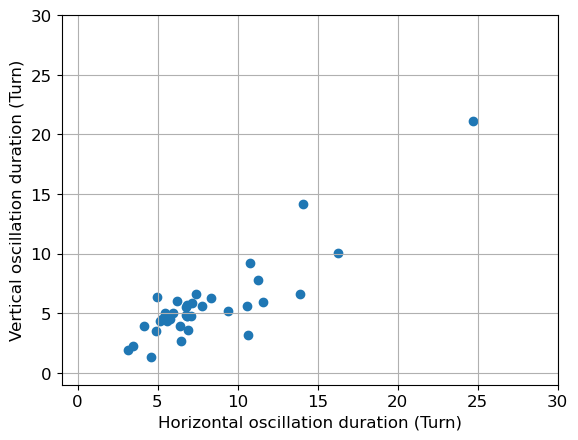

In [78]:
plt.scatter(D10_L02_x_1mm,D10_L02_y_1mm)
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.xlabel('Horizontal oscillation duration (Turn)')
plt.ylabel('Vertical oscillation duration (Turn)')
plt.grid()
plt.show()

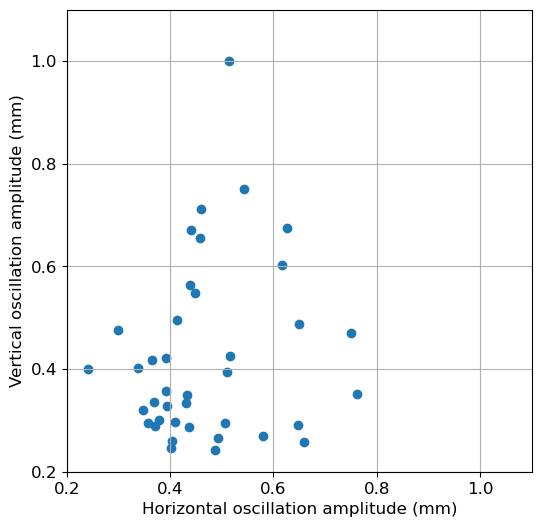

In [85]:
plt.figure(figsize=(6,6))
plt.scatter(D10_L02_x_amp_1mm,D10_L02_y_amp_1mm)
plt.xlim(0.2,1.1)
plt.ylim(0.2,1.1)
plt.xlabel('Horizontal oscillation amplitude (mm)')
plt.ylabel('Vertical oscillation amplitude (mm)')
plt.grid()
plt.show()

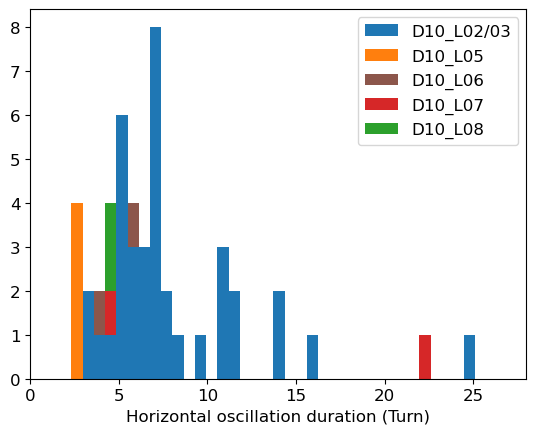

In [30]:
plt.hist([D10_L02_x_1mm,D10_L05_x_1mm,D10_L06_x_1mm,D10_L08_x_1mm,D10_L07_x_1mm], bins=140, stacked=True, 
         color=['tab:blue', 'tab:orange', 'tab:brown','tab:red','tab:green'], label=['D10_L02/03','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Horizontal oscillation duration (Turn)')
plt.legend()
plt.xlim(0,28)
plt.savefig('xduration_pressure.png',dpi=100)
plt.show()

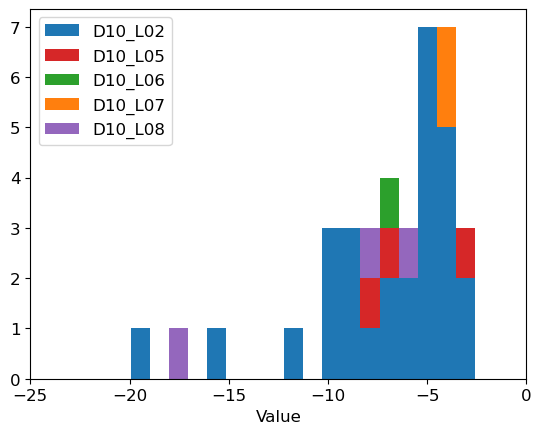

In [18]:
plt.hist([D10_L02_x_detuned,D10_L05_x_detuned,D10_L06_x_detuned,D10_L07_x_detuned,D10_L08_x_detuned], bins=80, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-25,0)
plt.show()

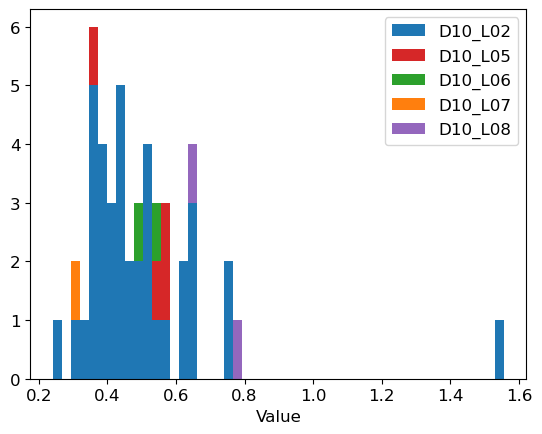

In [19]:
plt.hist([D10_L02_x_amp_1mm,D10_L05_x_amp_1mm,D10_L06_x_amp_1mm,D10_L07_x_amp_1mm,D10_L08_x_amp_1mm], bins=50, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-25,0)
plt.show()

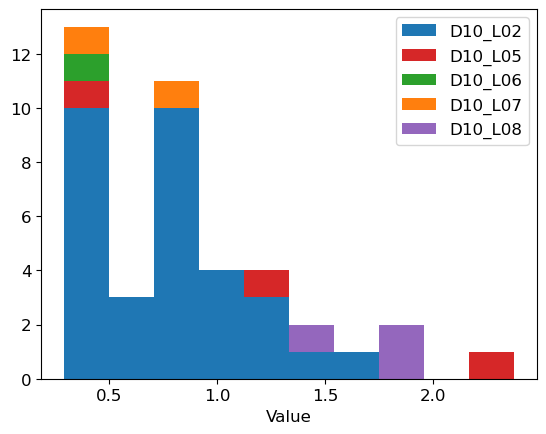

In [56]:
plt.hist([D10_L02_x_amp_detuned,D10_L05_x_amp_detuned,D10_L06_x_amp_detuned,D10_L07_x_amp_detuned,D10_L08_x_amp_detuned],  stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-25,0)
plt.show()

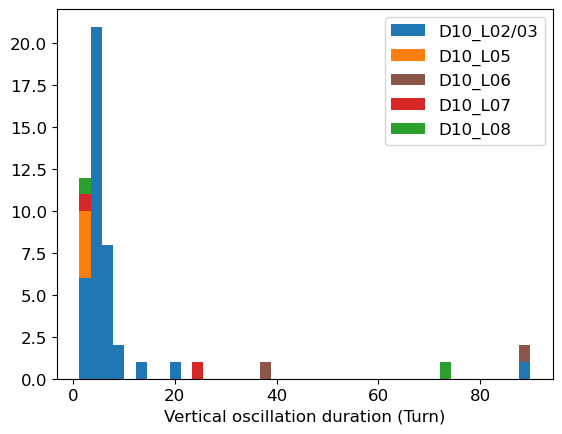

In [43]:
plt.hist([D10_L02_y_1mm,D10_L05_y_1mm,D10_L06_y_1mm,D10_L08_y_1mm,D10_L07_y_1mm], bins=40, stacked=True, 
         color=['tab:blue', 'tab:orange', 'tab:brown','tab:red','tab:green'], label=['D10_L02/03','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Vertical oscillation duration (Turn)')
plt.legend()
#plt.xlim(0,15)
plt.savefig('yduration_pressure.png',dpi=100)
plt.show()

In [34]:
D10_L02_y_1mm

[1.8859374999999972,
 4.850390625000003,
 3.528515624999997,
 5.538671875000006,
 4.506640625000003,
 3.198437499999997,
 3.6089843750000057,
 9.192187500000003,
 5.347460937500003,
 4.370312499999997,
 21.139843749999997,
 2.264453125000003,
 5.5843750000000085,
 6.568359375,
 5.660937500000003,
 4.307421875000003,
 5.847460937500003,
 6.3265625000000085,
 6.060351562500003,
 1.3425781250000028,
 3.906054687500003,
 3.9097656250000057,
 4.802343750000006,
 4.07421875,
 3.1773437500000057,
 4.7630859375000085,
 5.0087890625,
 2.6480468750000057,
 6.3050781250000085,
 5.159765625000006,
 5.6015625,
 10.053906249999997,
 4.787304687499997,
 4.5082031250000085,
 6.5859375,
 7.796484375000006,
 5.907031250000003,
 14.181835937499997,
 5.005468750000006,
 89.8103515625]

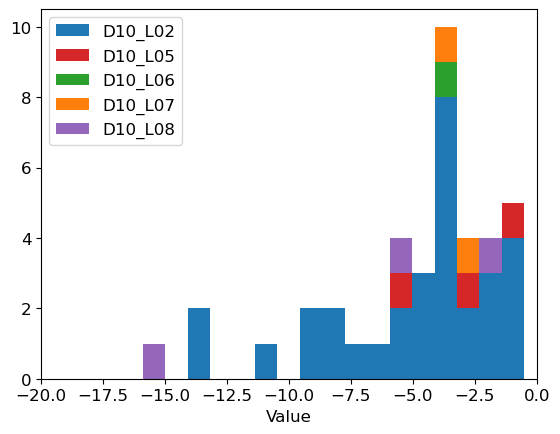

In [34]:
plt.hist([D10_L02_y_detuned,D10_L05_y_detuned,D10_L06_y_detuned,D10_L07_y_detuned,D10_L08_y_detuned], bins=100, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-20,0)
plt.show()

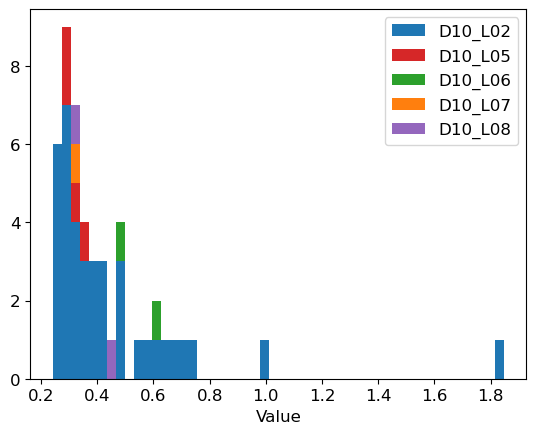

In [25]:
plt.hist([D10_L02_y_amp_1mm,D10_L05_y_amp_1mm,D10_L06_y_amp_1mm,D10_L07_y_amp_1mm,D10_L08_y_amp_1mm], bins=50, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-25,0)
plt.show()

# combined analysis

In [5]:
zcu111_list_2=zcu111_list[59:]
pressure_2=pressure[59:]

In [6]:
def get_file_timestamp(filename):
    # ファイル名からタイムスタンプを抽出
    match = re.search(r'_(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})\.npz$', filename)
    return match.group(1) if match else None

def generate_possible_timestamps(timestamp_str):
    # 文字列のタイムスタンプをdatetimeオブジェクトに変換
    timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d_%H-%M-%S")
    # -1秒, 0秒, +1秒の3つのタイムスタンプを生成
    return [
        (timestamp + timedelta(seconds=offset)).strftime("%Y-%m-%d_%H-%M-%S")
        for offset in [-1, 0, 1]
    ]

def find_matching_files_from_lists(files_dir1, dir2):
    # ディレクトリ2のファイル名をセットに変換して検索を効率化
    files_dir2 = os.listdir(dir2)
    files_dir2_set = set(files_dir2)
    matching_files = []
    pressure_burst=[]

    for i in range(len(files_dir1)):
        file1=files_dir1[i]
        timestamp_str = get_file_timestamp(file1)
        
        if timestamp_str:
            # ±1秒のタイムスタンプ候補を生成
            possible_timestamps = generate_possible_timestamps(timestamp_str)
            
            # ディレクトリ2に一致するタイムスタンプのファイルがあるか確認
            for ts in possible_timestamps:
                matching_file = next((f2 for f2 in files_dir2_set if ts in f2), None)
                if matching_file:
                    matching_files.append((file1, matching_file))
                    pressure_burst.append(pressure_2[i])
                    break  # 最初に一致したファイルのみ記録
    
    return matching_files,pressure_burst

# 使用例
files_dir1 = zcu111_list_2
dir2 = '/mnt/SBOR/2024c_RFSoC/ZCU208/Abort/'
matches,pres = find_matching_files_from_lists(files_dir1, dir2)

fuji_file = []
D5_file = []
# 結果の表示
for file1, file2 in matches:
    fuji_file.append(file1)
    D5_file.append(file2)
    print(f"Match found: {file1} in list, {file2} in dir2")

Match found: LERFUJI_2024-10-27_13-43-55.npz in list, LERD5_2024-10-27_13-43-55.npz in dir2
Match found: LERFUJI_2024-10-27_15-10-13.npz in list, LERD5_2024-10-27_15-10-13.npz in dir2
Match found: LERFUJI_2024-10-27_15-32-04.npz in list, LERD5_2024-10-27_15-32-04.npz in dir2
Match found: LERFUJI_2024-10-27_21-28-33.npz in list, LERD5_2024-10-27_21-28-33.npz in dir2
Match found: LERFUJI_2024-10-27_23-44-12.npz in list, LERD5_2024-10-27_23-44-12.npz in dir2
Match found: LERFUJI_2024-10-28_02-06-05.npz in list, LERD5_2024-10-28_02-06-05.npz in dir2
Match found: LERFUJI_2024-10-28_02-30-07.npz in list, LERD5_2024-10-28_02-30-07.npz in dir2
Match found: LERFUJI_2024-10-28_02-55-30.npz in list, LERD5_2024-10-28_02-55-30.npz in dir2
Match found: LERFUJI_2024-10-28_19-13-27.npz in list, LERD5_2024-10-28_19-13-27.npz in dir2
Match found: LERFUJI_2024-10-29_01-41-14.npz in list, LERD5_2024-10-29_01-41-14.npz in dir2
Match found: LERFUJI_2024-10-29_03-00-30.npz in list, LERD5_2024-10-29_03-00-30.

In [7]:
pres

['D10_L08',
 'D10_L08',
 'D10_L02/03',
 'D10_L05',
 'D05_L23',
 'D10_L02/03',
 'D10_L05',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'nan',
 'D04_L07',
 'D10_L02/03',
 'D10_L05',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L05',
 'D10_L02/03',
 'D10_L07',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D02_L18',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'nan',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L02/03',
 'D10_L06',
 'D04_L04',
 'D10_L07',
 'D10_L06',
 'D02_L18',
 'D02_L25',
 'D05_L25',
 'D11_L19',
 'D08_L12',
 'nan',
 'D06_L12',
 'D04_L02',
 'D06_L12',
 'D10_L02/03']

In [10]:
def make_spectrum(filename1,filename2,mark,pressure):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz" or filename1=="LERFUJI_2024-10-16_02-27-58.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 1.5, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 1.5, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    iii=90
    a=tbtdata_111_x_ma[-iii*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_x))*0.6
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            iii*5120
        )
    index_111=index_111-iii*5120
    print(index_111)
    a=tbtdata_111_y_ma[-iii*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_y))*0.6
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            iii*5120
        )
    index_111_y=index_111_y-iii*5120
    print(index_111_y)

    #######################################
    #
    #               ZCU208
    #
    ########################################
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU208/Abort/'+filename2,allow_pickle=True)
    AC_sum=npz_kw['AC_sum']
    AC_delta=npz_kw['AC_delta']
    BD_sum=npz_kw['BD_sum']
    BD_delta=npz_kw['BD_delta']

    
    timesteps2=np.arange(len(AC_sum))/5120
    timesteps2=timesteps2-timesteps2[-1]

    ##################    


    df = pd.DataFrame({'x':timesteps2,'AC_sum':AC_sum,'AC_delta':AC_delta,'BD_sum':BD_sum,'BD_delta':BD_delta})
    threshold=500
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['AC_sum'] > threshold, (df['AC_delta']+df['BD_delta']) / (df['AC_sum']+df['BD_sum']) *(31.8/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_x'] = df['result_x']
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 0.7, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_y'] = np.where(df['AC_sum'] > threshold, (df['AC_delta']-df['BD_delta']) / (df['AC_sum']+df['BD_sum']) *(32.7/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 0.7, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['AC_sum'] > threshold,  df['AC_sum']+df['BD_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)
    
    

    condition = df['AC_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['AC_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除


    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan,np.nan,np.nan,np.nan
    tbtdata_208_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values

    if mark==1:
        tbtdata_208_x=df['result_interp_AC'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_ma=df['AC_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_std=df['AC_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y=df['result_interp_BD'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_ma=df['BD_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_std=df['BD_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    turn208=turn

    a=tbtdata_208_x_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_208_x))*0.7
    index_208 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120)
    index_208=index_208-80*5120
    print(index_208)
    a=tbtdata_208_y_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_208_y))*0.7
    index_208_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120)
    index_208_y=index_208_y-80*5120
    print(index_208_y)


    ##########  PLOT  ############
    
    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])

    
    
    #ax7.scatter(timeaxis[-20*5120:],tbtdata_111_x[-21*5120:-5120]**2+tbtdata_111_y[-20*5120:]**2,s=1)
    #ax7.grid()
    #ax7.set_ylim(0,0.3)
    plt.xlim(-15,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}.png',dpi=100)
    plt.close()



    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    #ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    #ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    
    plt.xlim(-80,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_2.png',dpi=100)
    plt.close()

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex=True,figsize=(16,8))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    #ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.3,0.3)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.3,0.3)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111*100,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 

    
    index_charge_111+=5120*10
    
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,120)
    ax3.grid()
    ax3.set_ylim(0,120)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (%)')
    """
    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    #ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')
    """
    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax4.scatter(timeaxis,charge_208*100,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure} / index_charge 111: {index_charge_111} / index_charge 208: {index_charge_208}')
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax4.vlines(charge_time_208,0,120)
    ax4.grid()
    ax4.set_ylim(0,120)
    ax4.set_ylabel('D5 charge (%)')
    ax4.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-15','-14','-13','-12','-11','-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    
    plt.xlim(-8,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_plot.png',dpi=100)
    plt.close()


    output_chargeindex_208=index_charge_208-5120*20
    output_chargeindex_111=index_charge_111-5120*20
    print(output_chargeindex_111)
    print(output_chargeindex_208)

    plt.figure(figsize=(5,5))
    x=tbtdata_111_x[index_111:]
    y=tbtdata_208_x[index_111:]
    valid_mask = ~np.isnan(x) & ~np.isnan(y)  # 両方が有効なインデックスを取得
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    plt.scatter(x_valid,y_valid)
    plt.xlim(-0.5,0.5)
    plt.ylim(-0.5,0.5)
    plt.grid()
    plt.show()
    plt.close()

    """
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True,figsize=(12,3))
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.scatter(timeaxis,100*charge_111,c='blue',s=1)
    ax1.grid()
    ax1.set_ylim(0,120)
    ax1.set_ylabel('Fuji charge (%)')

    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax2.scatter(timeaxis,100*charge_208,c='blue',s=1)
    ax2.grid()
    ax2.set_ylim(0,120)
    ax2.set_ylabel('D5 charge (%)')

    ax2.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    plt.xlim(-8,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_charge.png',dpi=100,bbox_inches='tight')
    plt.close()

    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    fig, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(12,3))
    mask = ~np.isnan(charge_111[-20*5120:]) & ~np.isnan(charge_208[-20*5120:])
    result = np.zeros_like(charge_208[-20*5120:])
    result[mask] = charge_111[-20*5120:][mask] - charge_208[-20*5120:][mask]
    ax1.scatter(timeaxis[-20*5120:],100*result,label='D5 to Fuji',s=1)

    d5tofuji=np.sum(result[result > 0.02])

    mask = ~np.isnan(charge_111[-21*5120:-5120]) & ~np.isnan(charge_208[-20*5120:])
    result = np.zeros_like(charge_208[-20*5120:])
    result[mask] = charge_111[-21*5120:-5120][mask] - charge_208[-20*5120:][mask]
    
    
    ax1.scatter(timeaxis[-20*5120:],100*result,label='Fuji to D5',s=1)

    fujitoD5=np.sum(result[result > 0.02])
    
    ax1.grid()
    ax1.set_ylabel('Charge loss (%)')
    ax1.set_ylim(0,30)
    ax1.legend(loc='upper left')
    ax1.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    plt.xlim(-8,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_chargeloss.png',dpi=100,bbox_inches='tight')
    plt.close()

    
    return d5tofuji, fujitoD5
    """
    

    #######################################################
    num_plots=9
    fig, axs = plt.subplots(3, 3, figsize=(12, 10))
    for i in range(num_plots):
        ch=1-charge_111[-5120:-1]
        x=tbtdata_111_x[-5120*(9-i):-5120*(8-i)-1]
        y=tbtdata_111_x[-5120*(10-i):-5120*(9-i)-1]#tbtdata_208_x[-5120*(9-i):-5120*(8-i)-1]/np.sin(np.pi*19.488)/np.sqrt(19.1293*7.05445) - (1/np.tan(19.488*np.pi)-0.99675)*tbtdata_111_x[-5120*(10-i):-5120*(9-i)-1]/19.1293
        valid_mask = ~np.isnan(x) & ~np.isnan(y)  # 両方が有効なインデックスを取得
        x_valid = x[valid_mask]
        y_valid = y[valid_mask]
        ch_valid=ch[valid_mask]
        sort_indices = np.argsort(ch_valid)
        x_sorted = x_valid[sort_indices]
        y_sorted = y_valid[sort_indices]
        ch_sorted = ch_valid[sort_indices]
        # プロットの行と列のインデックス
        row = i // 3
        col = i % 3
        # 散布図を描画
        scatter=axs[row, col].scatter(x_sorted,y_sorted,c=ch_sorted,s=1,cmap='cividis_r')
        axs[row, col].set_title(f"Plot {9-i}")
        axs[row, col].set_xlabel(f"Fuji X pos")
        axs[row, col].set_ylabel(f"Fuji X pos one turn before")
        axs[row, col].set_xlim(-0.3,0.3)
        axs[row, col].set_ylim(-0.3,0.3)
        axs[row, col].grid()
        #x___ = np.linspace(-0.3, 0.3, 10)  # -10から10までを100点で分割
        #y___ = 2 * x___
        #axs[row,col].plot(x___,y___,c='red',linewidth=0.5)
        cbar = fig.colorbar(scatter, ax=axs[row, col], orientation="vertical", shrink=0.9)
        #cbar.set_label("Charge Difference")
    # 全体のレイアウト調整
    plt.tight_layout()
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_4.png',dpi=100)
    plt.close()

    num_plots=9
    fig, axs = plt.subplots(3, 3, figsize=(12, 10))
    for i in range(num_plots):
        ch=1-charge_111[-5120:-1]
        x=tbtdata_111_x[-5120*(10-i):-5120*(9-i)-1]
        y=tbtdata_208_x[-5120*(9-i):-5120*(8-i)-1]#tbtdata_208_y[-5120*(9-i):-5120*(8-i)-1]/np.sin(np.pi*20.3758)/np.sqrt(19.147*77.1796) - (1/np.tan(20.3758*np.pi)-1)*tbtdata_111_y[-5120*(10-i):-5120*(9-i)-1]/19.147
        
        valid_mask = ~np.isnan(x) & ~np.isnan(y)  # 両方が有効なインデックスを取得
        x_valid = x[valid_mask]
        y_valid = y[valid_mask]
        ch_valid=ch[valid_mask]
        sort_indices = np.argsort(ch_valid)
        x_sorted = x_valid[sort_indices]
        y_sorted = y_valid[sort_indices]
        ch_sorted = ch_valid[sort_indices]
        # プロットの行と列のインデックス
        row = i // 3
        col = i % 3
        # 散布図を描画
        scatter=axs[row, col].scatter(x_sorted,y_sorted,c=ch_sorted,s=1,cmap='cividis_r')
        axs[row, col].set_title(f"Plot {9-i}")
        axs[row, col].set_xlabel(f"Fuji X pos")
        axs[row, col].set_ylabel(f"D5 X Pos")
        axs[row, col].set_xlim(-0.3,0.3)
        axs[row, col].set_ylim(-0.3,0.3)
        axs[row, col].grid()
        #x___ = np.linspace(-0.3, 0.3, 10)  # -10から10までを100点で分割
        #y___ = 2 * x___
        #axs[row,col].plot(x___,y___,c='red',linewidth=0.5)
        cbar = fig.colorbar(scatter, ax=axs[row, col], orientation="vertical", shrink=0.9)
        #cbar.set_label("Charge Difference")
    # 全体のレイアウト調整
    plt.tight_layout()
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_3.png',dpi=100)
    plt.close()

    
    
    print(time_111_y)
    print(time_208_y)
    return time_111, time_111_y,time_208,time_208_y, np.nanmax(tbtdata_111_x[:output_chargeindex_111])-np.nanmin(tbtdata_111_x[:output_chargeindex_111]), np.nanmax(tbtdata_111_y[:output_chargeindex_111])-np.nanmin(tbtdata_111_y[:output_chargeindex_111]), np.nanmax(tbtdata_208_x[:output_chargeindex_208])-np.nanmin(tbtdata_208_x[:output_chargeindex_208]), np.nanmax(tbtdata_208_y[:output_chargeindex_208])-np.nanmin(tbtdata_208_y[:output_chargeindex_208]) 
    #return 0,0,0,0

LERFUJI_2024-10-27_13-43-55.npz
D10_L08
-22347
-14531
-23311
-21761
-3115
-3229


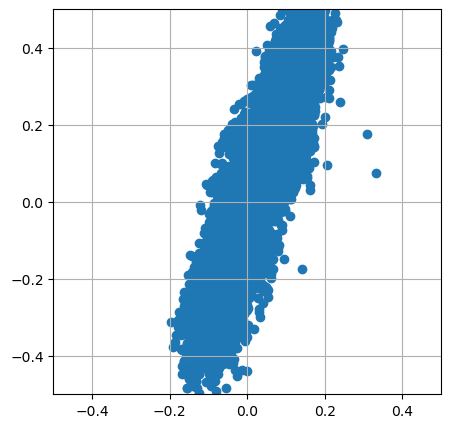

-2.837890625
-5.25
LERFUJI_2024-10-27_15-10-13.npz
D10_L08
-114466
-129203
-124069
-124812
-30551
-45911


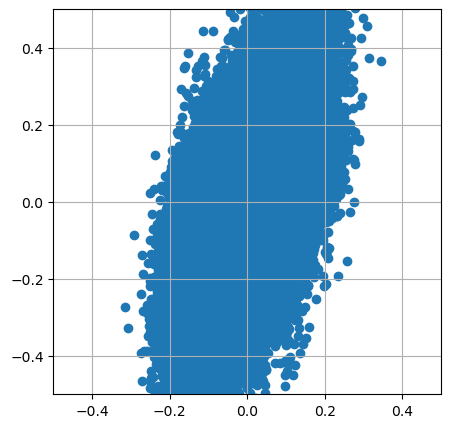

-25.23476562500001
-25.377148437499997
LERFUJI_2024-10-27_15-32-04.npz
D10_L02/03
-55303
-47065
-39353
-38736
-10076
-30556


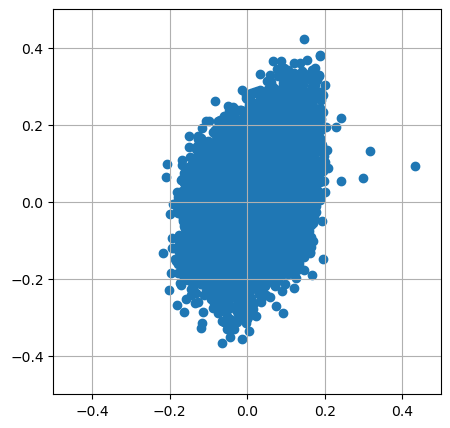

-9.192187500000003
-8.5654296875
LERFUJI_2024-10-27_21-28-33.npz
D10_L05
-11893
-6793
-6965
-6938
-7034
-7038


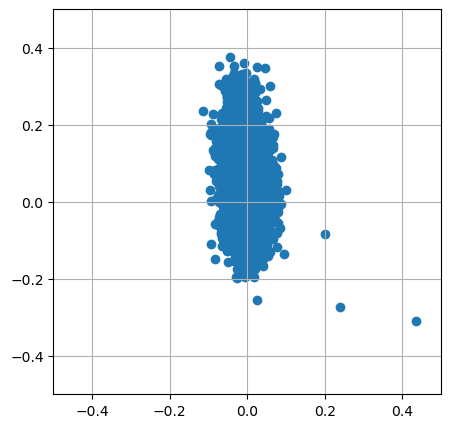

-1.3265625000000085
-2.3548828125000085
LERFUJI_2024-10-27_23-44-12.npz
D05_L23
LERFUJI_2024-10-28_02-06-05.npz
D10_L02/03
0
-27380
-10484
-54125
-4952
-50579


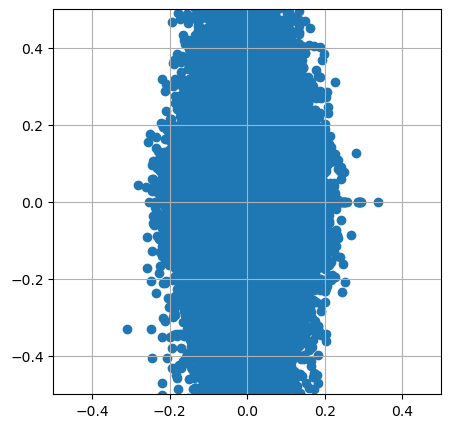

-5.347460937500003
-11.571093750000003
LERFUJI_2024-10-28_02-30-07.npz
D10_L05
-12814
-6769
-7402
-7837
-6845
-6957


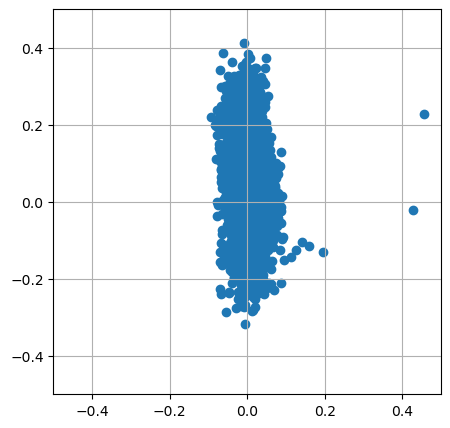

-1.3218750000000057
-2.530468749999997
LERFUJI_2024-10-28_02-55-30.npz
D10_L02/03
-26485
-22377
-19427
-17031
-7513
-7513


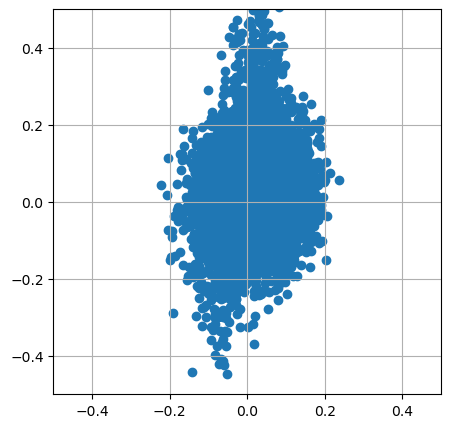

-4.370312499999997
-4.326171875
LERFUJI_2024-10-28_19-13-27.npz
D10_L02/03
-126435
-108237
-221237
-109846
-7513
-48473


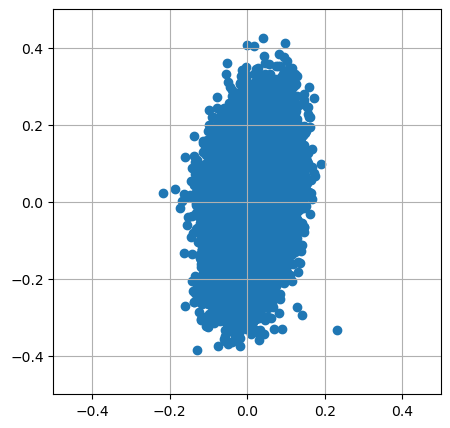

-21.139843749999997
-22.4541015625
LERFUJI_2024-10-29_01-41-14.npz
D10_L02/03
-17707
-11595
-7871
-8492
-7516
-7767


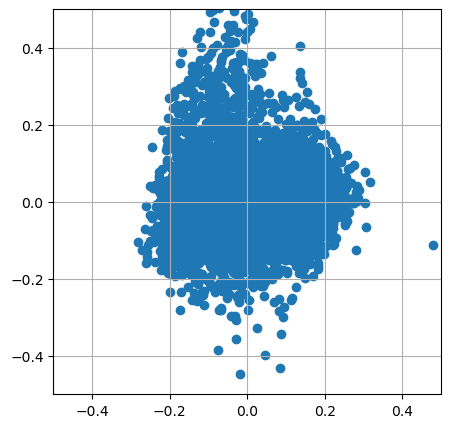

-2.264453125000003
-2.658398437499997
LERFUJI_2024-10-29_03-00-30.npz
nan
LERFUJI_2024-10-29_15-19-37.npz
D04_L07
LERFUJI_2024-10-29_17-51-52.npz
D10_L02/03
-39989
-28593
-34914
-31241
-10594
-10718


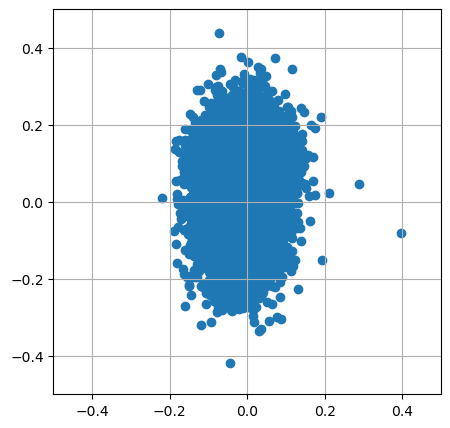

-5.5843750000000085
-7.1015625
LERFUJI_2024-10-29_19-49-12.npz
D10_L05
-13304
-7502
-7959
-8674
-8029
-8217


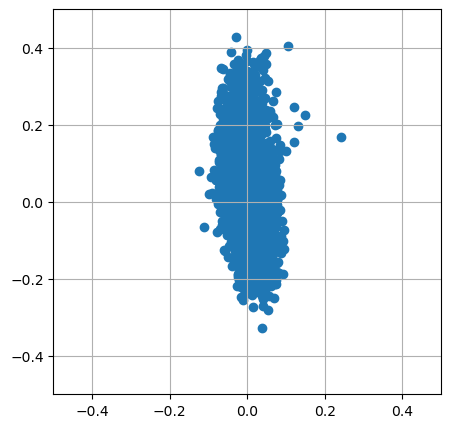

-1.4650390624999972
-2.6939453125000057
LERFUJI_2024-10-29_22-59-36.npz
D10_L02/03
-71188
-33631
-41513
-54311
-6898
-11954


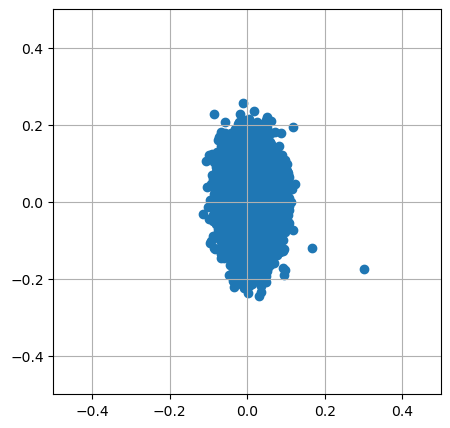

-6.568359375
-11.607421875
LERFUJI_2024-10-29_23-49-03.npz
D10_L02/03
-34987
-28985
-29418
-28242
-8556
-17753


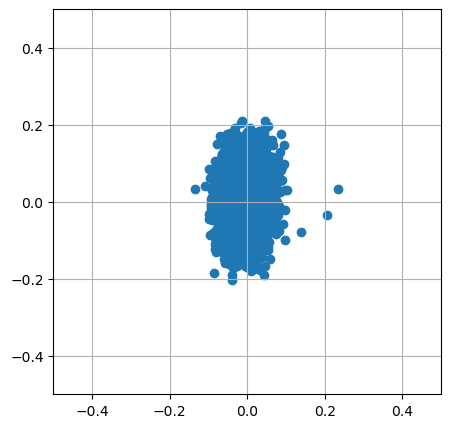

-5.660937500000003
-6.515820312499997
LERFUJI_2024-10-30_02-02-03.npz
D10_L02/03
-28643
-22055
-23095
-222421
-10076
-10076


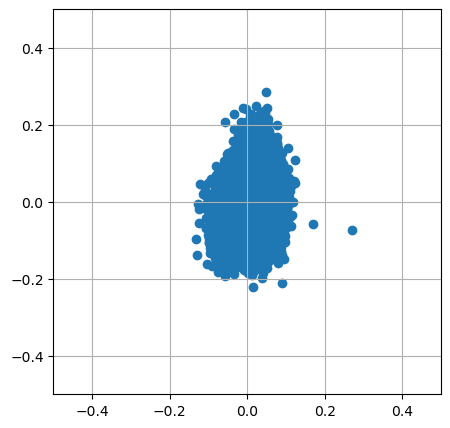

-4.307421875000003
-44.44140625
LERFUJI_2024-10-30_02-30-10.npz
D10_L05
-12183
-6587
-7061
-6618
-6736
-6832


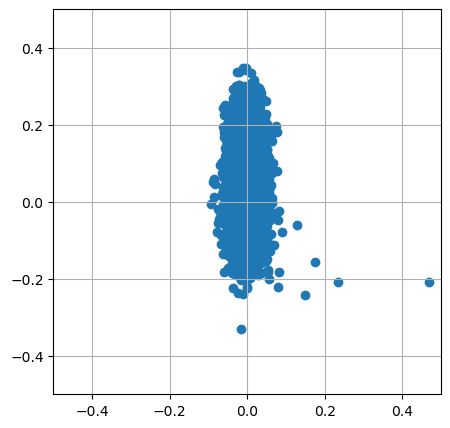

-1.2863281249999972
-2.2923828125000085
LERFUJI_2024-11-01_03-49-06.npz
D10_L02/03
-36729
-29940
-28756
-19904
-1065
-11372


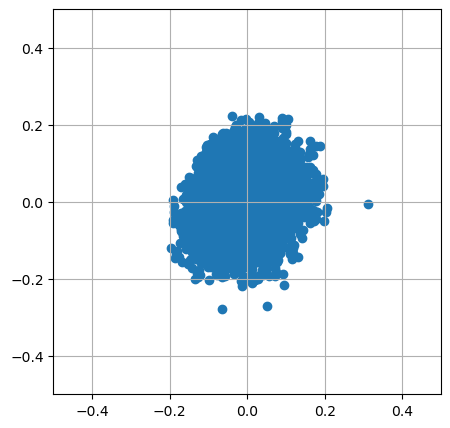

-5.847460937500003
-4.887304687500006
LERFUJI_2024-11-01_04-31-16.npz
D10_L07
-24372
-13829
-19084
-18868
-10073
-15193


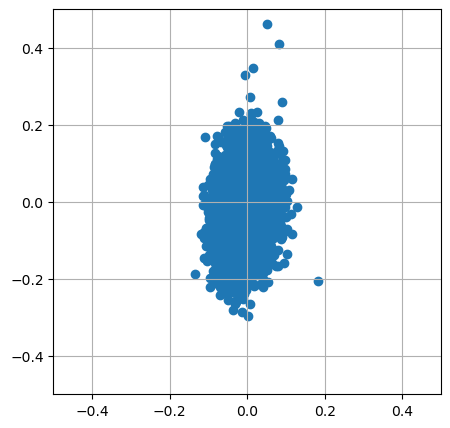

-2.7007812500000057
-4.6849609375000085
LERFUJI_2024-11-02_08-54-09.npz
D10_L02/03
-25432
-32393
-23971
-27304
-4956
-10076


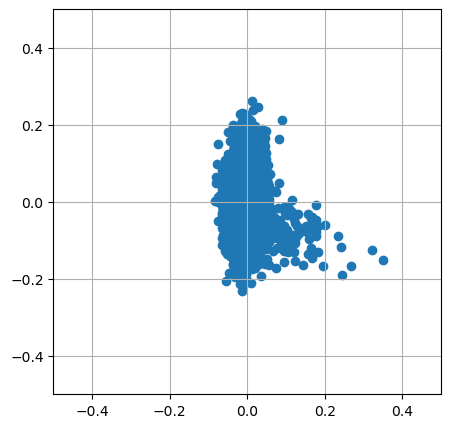

-6.3265625000000085
-6.332617187500006
LERFUJI_2024-11-02_12-30-45.npz
D10_L02/03
-31863
-31030
-19508
-32557
-17756
-17756


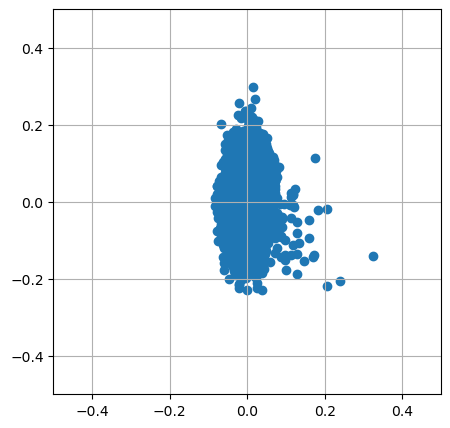

-6.060351562500003
-7.358593749999997
LERFUJI_2024-11-02_13-51-41.npz
D10_L02/03
-23393
-6875
-18050
-389869
-2805
-4956


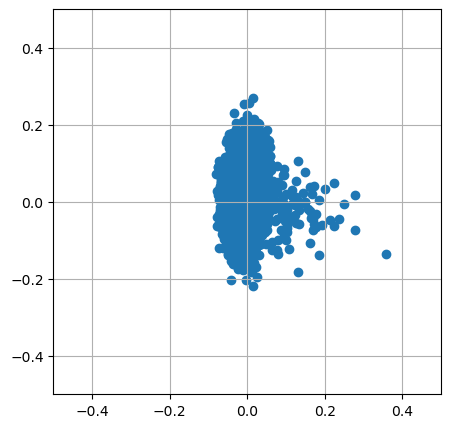

-1.3425781250000028
-77.14609375
LERFUJI_2024-11-02_16-48-53.npz
D02_L18
LERFUJI_2024-11-02_19-05-51.npz
D10_L02/03
-21237
-20000
-15717
-14272
-8168
-8294


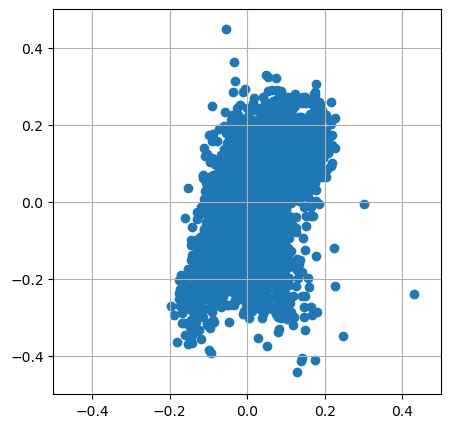

-3.906054687500003
-3.787304687499997
LERFUJI_2024-11-03_03-33-06.npz
D10_L02/03
-32713
-20019
-22224
-22524
-6799
-7001


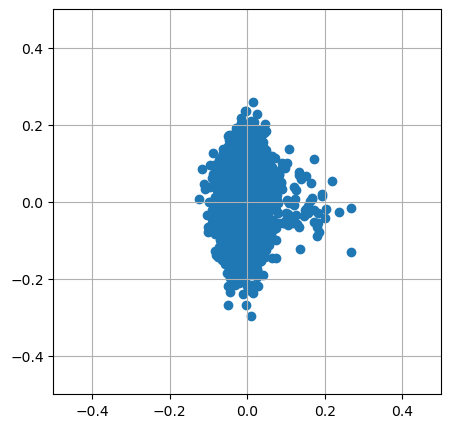

-3.9097656250000057
-5.399023437500006
LERFUJI_2024-11-03_03-58-26.npz
D10_L02/03
-35135
-24589
-19978
-17666
-8753
-10076


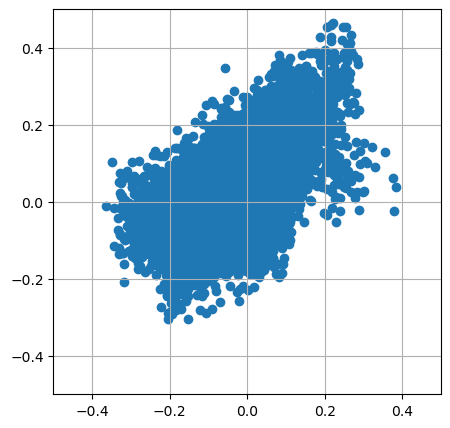

-4.802343750000006
-4.4501953125
LERFUJI_2024-11-03_11-46-08.npz
nan
LERFUJI_2024-11-03_17-35-45.npz
D10_L02/03
-284821
-20861
-221290
-188974
-6063
-10425


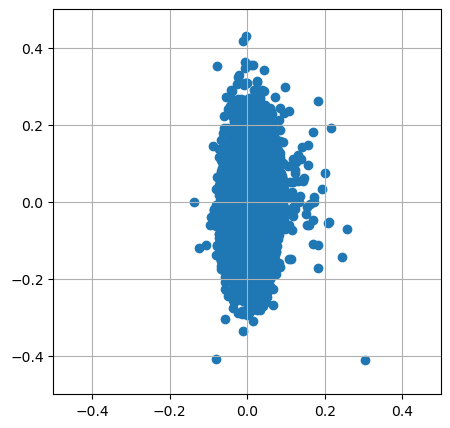

-4.07421875
-37.908789062500006
LERFUJI_2024-11-03_17-56-46.npz
D10_L02/03
-54589
-16269
-27597
-12152
-10073
-12633


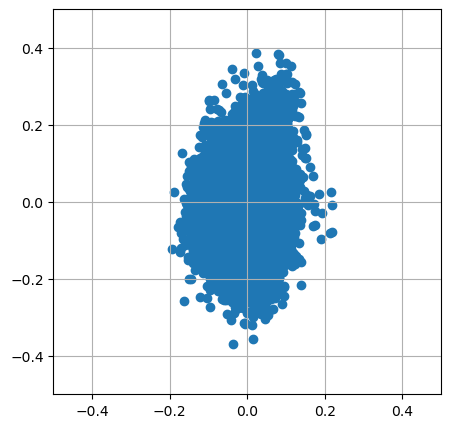

-3.1773437500000057
-3.373242187499997
LERFUJI_2024-11-03_20-11-52.npz
D10_L02/03
-36200
-24388
-1601
-24261
-4949
-5137


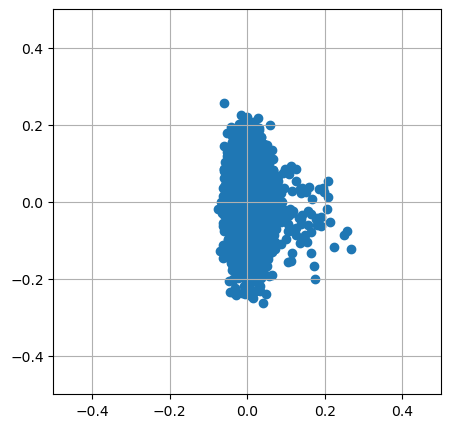

-4.7630859375000085
-5.73828125
LERFUJI_2024-11-03_23-57-50.npz
D10_L02/03
-27851
-25646
-22517
-22464
-9264
-9917


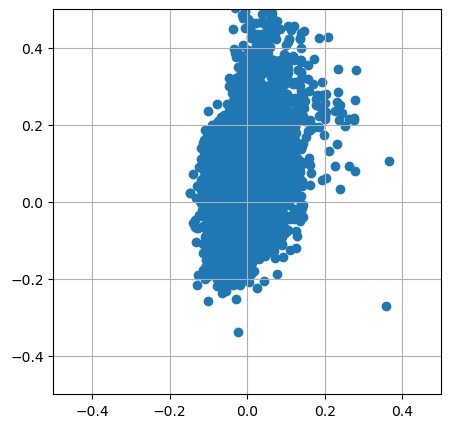

-5.0087890625
-5.387304687500006
LERFUJI_2024-11-04_04-14-19.npz
D10_L02/03
-33018
-13559
-27545
-22719
-10076
-10782


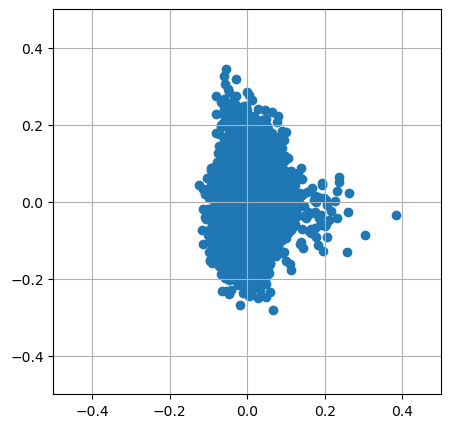

-2.6480468750000057
-5.437109375000006
LERFUJI_2024-11-04_14-40-20.npz
D10_L02/03
-42580
-32283
-12405
-31170
-10067
-10073


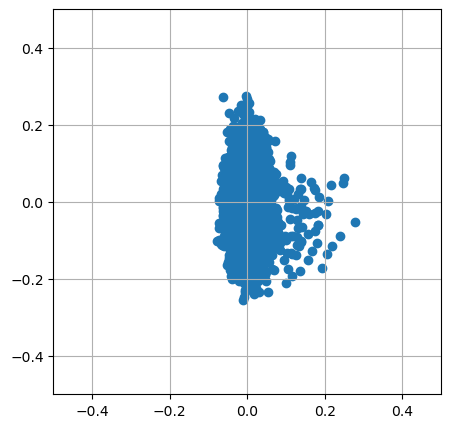

-6.3050781250000085
-7.087695312500003
LERFUJI_2024-11-04_21-12-50.npz
D10_L02/03
-48196
-26419
-144408
-42114
-27993
-27993


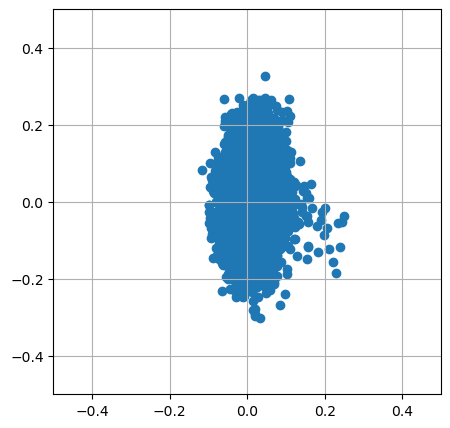

-5.159765625000006
-9.225195312500006
LERFUJI_2024-11-04_22-05-43.npz
D10_L02/03
-54373
-28681
-44703
-39235
-25433
-25433


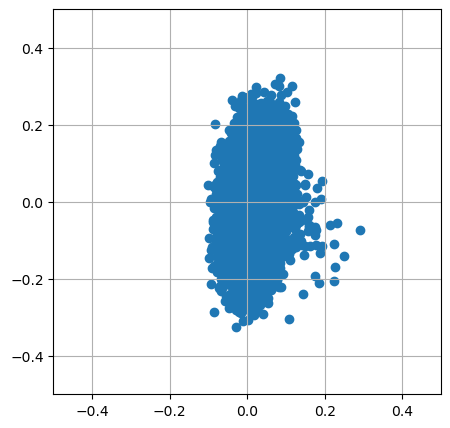

-5.6015625
-8.662890625000003
LERFUJI_2024-11-05_04-53-14.npz
D10_L02/03
-83216
-51477
-76079
-51450
-27994
-43354


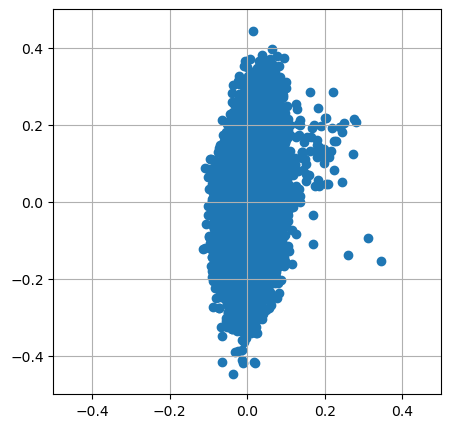

-10.053906249999997
-11.048632812500003
LERFUJI_2024-11-05_10-06-20.npz
D10_L02/03
-35032
-24512
-28746
-24133
-4953
-10073


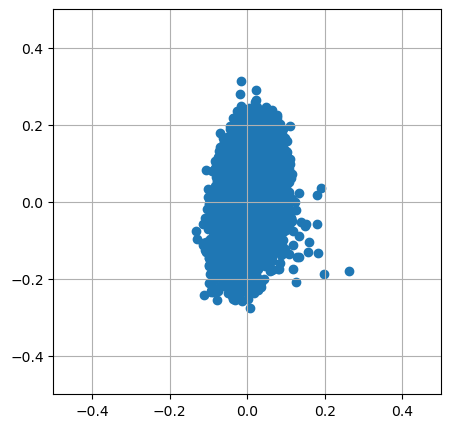

-4.787304687499997
-5.7132812500000085
LERFUJI_2024-11-05_10-37-18.npz
D10_L02/03
-27111
-23083
-21936
-23728
-6697
-8583


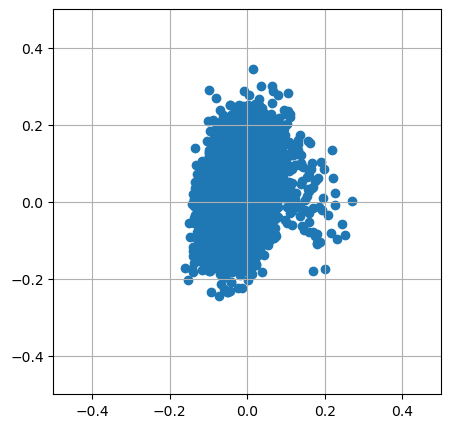

-4.5082031250000085
-5.6341796875000085
LERFUJI_2024-11-05_11-56-33.npz
D10_L02/03
-37972
-33721
-31035
-28342
-7509
-7919


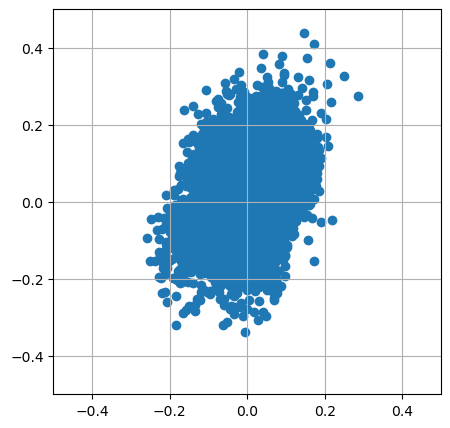

-6.5859375
-6.535351562499997
LERFUJI_2024-11-05_16-29-27.npz
D10_L02/03
-57901
-39919
-49755
-44980
-7513
-12633


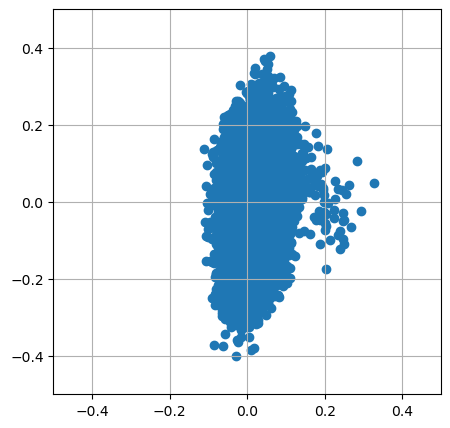

-7.796484375000006
-9.784960937500003
LERFUJI_2024-11-05_20-32-53.npz
D10_L02/03
-59338
-30245
-49433
-59430
-17753
-27993


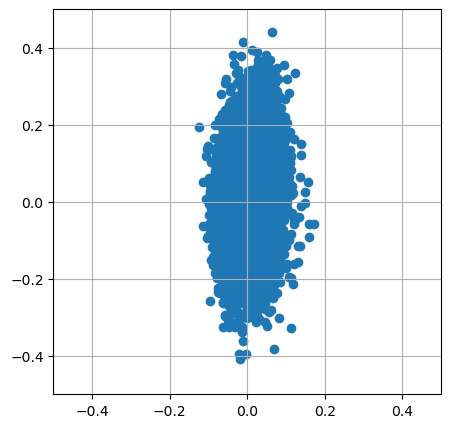

-5.907031250000003
-12.607226562500003
LERFUJI_2024-11-06_04-06-18.npz
D10_L02/03
-72265
-72612
-67374
-66665
-27994
-27996


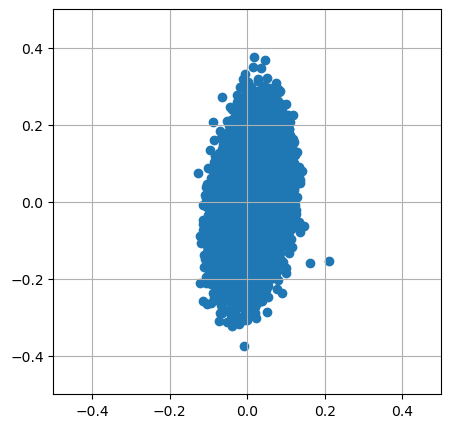

-14.181835937499997
-14.020312500000003
LERFUJI_2024-11-06_05-48-50.npz
D10_L02/03
-30525
-25629
-26556
-21477
-7960
-15193


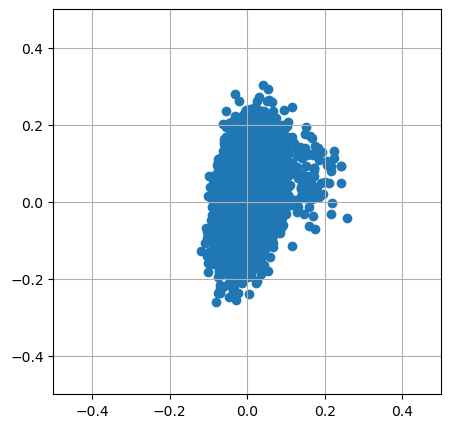

-5.005468750000006
-5.194531249999997
LERFUJI_2024-11-08_08-50-27.npz
D10_L06
-29126
-450148
-24437
-23449
-6027
-6607


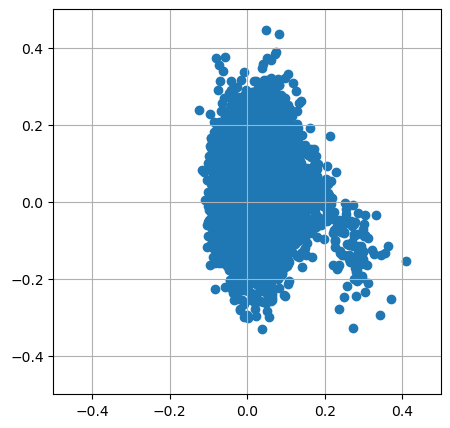

-87.91933593750001
-5.579687500000006
LERFUJI_2024-11-09_08-59-06.npz
D04_L04
LERFUJI_2024-11-09_23-06-12.npz
D10_L07
-24109
-379214
-18963
-16070
-8884
-8896


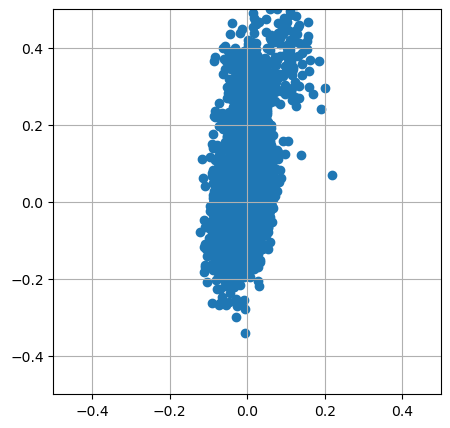

-74.0650390625
-4.138476562500003
LERFUJI_2024-11-10_03-27-52.npz
D10_L06
-19265
-188458
-9025
-11313
-9329
-9431


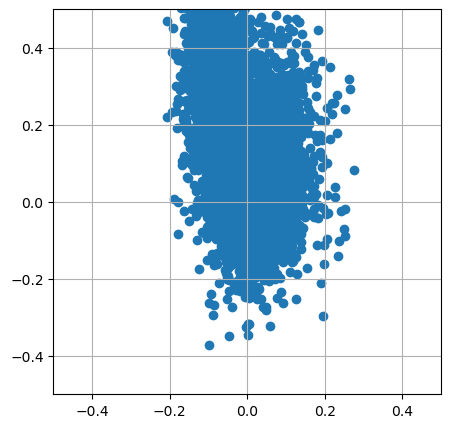

-36.8080078125
-3.2093750000000085
LERFUJI_2024-11-11_05-25-24.npz
D02_L18
LERFUJI_2024-11-11_10-54-27.npz
D02_L25
LERFUJI_2024-11-11_11-42-48.npz
D05_L25
LERFUJI_2024-11-12_19-38-00.npz
D11_L19
LERFUJI_2024-11-13_23-16-26.npz
D08_L12
LERFUJI_2024-11-15_08-22-08.npz
nan
LERFUJI_2024-11-15_20-34-41.npz
D06_L12
LERFUJI_2024-11-16_01-15-10.npz
D04_L02
LERFUJI_2024-11-16_03-39-21.npz
D06_L12
LERFUJI_2024-11-18_03-28-51.npz
D10_L02/03
-25642
-459830
-390465
-22578
-7516
-7516


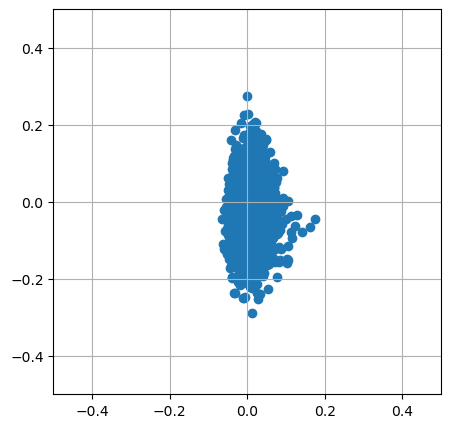

-89.8103515625
-5.4095703125000085


In [11]:
#target_datetime = datetime(2024, 10, 27, 7, 0, 0)
time_111_x_D10L02=[]
time_111_y_D10L02=[]
time_208_x_D10L02=[]
time_208_y_D10L02=[]
amp_111_x_D10L02=[]
amp_111_y_D10L02=[]
amp_208_x_D10L02=[]
amp_208_y_D10L02=[]


time_111_x_D10L05=[]
time_111_y_D10L05=[]
time_208_x_D10L05=[]
time_208_y_D10L05=[]
amp_111_x_D10L05=[]
amp_111_y_D10L05=[]
amp_208_x_D10L05=[]
amp_208_y_D10L05=[]

time_111_x_D10L06=[]
time_111_y_D10L06=[]
time_208_x_D10L06=[]
time_208_y_D10L06=[]
amp_111_x_D10L06=[]
amp_111_y_D10L06=[]
amp_208_x_D10L06=[]
amp_208_y_D10L06=[]

time_111_x_D10L07=[]
time_111_y_D10L07=[]
time_208_x_D10L07=[]
time_208_y_D10L07=[]
amp_111_x_D10L07=[]
amp_111_y_D10L07=[]
amp_208_x_D10L07=[]
amp_208_y_D10L07=[]

time_111_x_D10L08=[]
time_111_y_D10L08=[]
time_208_x_D10L08=[]
time_208_y_D10L08=[]
amp_111_x_D10L08=[]
amp_111_y_D10L08=[]
amp_208_x_D10L08=[]
amp_208_y_D10L08=[]

time_111_x=[]
time_111_y=[]
time_208_x=[]
time_208_y=[]
for i in range(len(fuji_file)):
    print(fuji_file[i])
    print(pres[i])
    mark=0
    
    if pres[i]=='D10_L02/03':
        a,b,c,d,e,f,g,h=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L02.append(a)
        time_111_y_D10L02.append(b)
        time_208_x_D10L02.append(c)
        time_208_y_D10L02.append(d)
        amp_111_x_D10L02.append(e)
        amp_111_y_D10L02.append(f)
        amp_208_x_D10L02.append(g)
        amp_208_y_D10L02.append(h)
    
    if pres[i]=='D10_L05':
        a,b,c,d,e,f,g,h=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L05.append(a)
        time_111_y_D10L05.append(b)
        time_208_x_D10L05.append(c)
        time_208_y_D10L05.append(d)
        amp_111_x_D10L05.append(e)
        amp_111_y_D10L05.append(f)
        amp_208_x_D10L05.append(g)
        amp_208_y_D10L05.append(h)
    if pres[i]=='D10_L06':
        a,b,c,d,e,f,g,h=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L06.append(a)
        time_111_y_D10L06.append(b)
        time_208_x_D10L06.append(c)
        time_208_y_D10L06.append(d)
        amp_111_x_D10L06.append(e)
        amp_111_y_D10L06.append(f)
        amp_208_x_D10L06.append(g)
        amp_208_y_D10L06.append(h)
    if pres[i]=='D10_L07':
        a,b,c,d,e,f,g,h=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L07.append(a)
        time_111_y_D10L07.append(b)
        time_208_x_D10L07.append(c)
        time_208_y_D10L07.append(d)
        amp_111_x_D10L07.append(e)
        amp_111_y_D10L07.append(f)
        amp_208_x_D10L07.append(g)
        amp_208_y_D10L07.append(h)
    if pres[i]=='D10_L08':
        a,b,c,d,e,f,g,h=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
        time_111_x_D10L08.append(a)
        time_111_y_D10L08.append(b)
        time_208_x_D10L08.append(c)
        time_208_y_D10L08.append(d)
        amp_111_x_D10L08.append(e)
        amp_111_y_D10L08.append(f)
        amp_208_x_D10L08.append(g)
        amp_208_y_D10L08.append(h)
    """    
    a,b,c,d=make_spectrum(fuji_file[i],D5_file[i],mark=mark,pressure=pres[i])
    time_111_x.append(a)
    time_111_y.append(b)
    time_208_x.append(c)
    time_208_y.append(d)
    """

/tmp/ipykernel_110189/959061000.py:3: RuntimeWarning: invalid value encountered in divide
  ratio=b/(a+b)


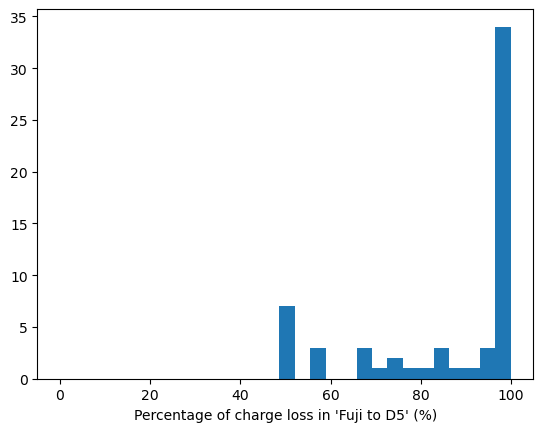

In [18]:
"""
a=np.array(time_111_x)
b=np.array(time_111_y)
ratio=b/(a+b)

plt.hist(ratio*100,bins=15)
plt.xlim(-5,105)
plt.xlabel("Percentage of charge loss in 'Fuji to D5' (%)")
plt.savefig('parcentage_loss.png',dpi=100)
plt.show()
"""

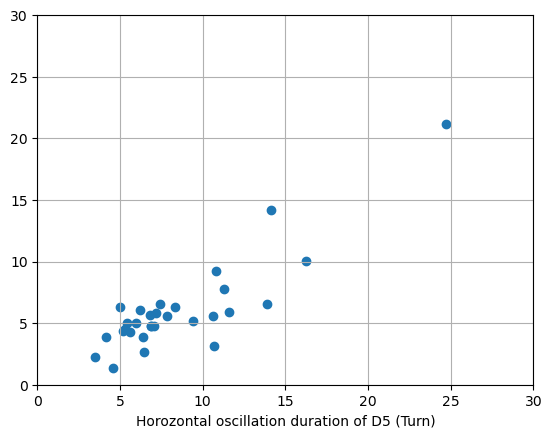

In [36]:
plt.scatter(np.abs(time_111_x_D10L02),np.abs(time_111_y_D10L02))
#plt.scatter(np.abs(time_111_x_D10L05),np.abs(time_111_y_D10L05))
#plt.scatter(np.abs(time_111_x_D10L06),np.abs(time_111_y_D10L06))
#plt.scatter(np.abs(time_111_x_D10L07),np.abs(time_111_y_D10L07))
#plt.scatter(np.abs(time_111_x_D10L08),np.abs(time_111_y_D10L08))
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Horozontal oscillation duration of Fuji (Turn)")
plt.xlabel("Horozontal oscillation duration of D5 (Turn)")
plt.grid()

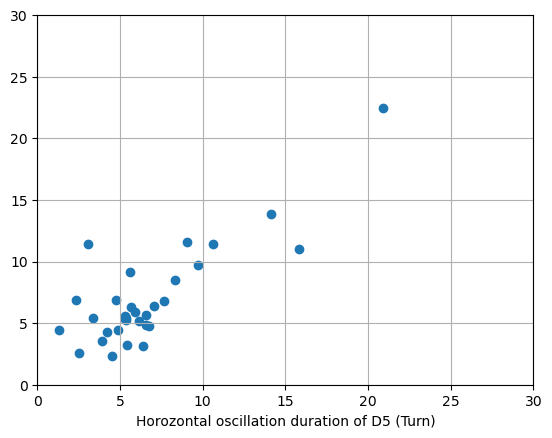

In [39]:
plt.scatter(np.abs(time_208_x_D10L02),np.abs(time_208_y_D10L02))
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Horozontal oscillation duration of Fuji (Turn)")
plt.xlabel("Horozontal oscillation duration of D5 (Turn)")
plt.grid()

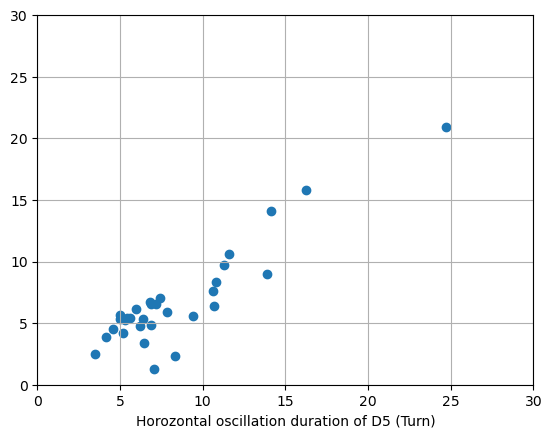

In [40]:
plt.scatter(np.abs(time_111_x_D10L02),np.abs(time_208_x_D10L02))
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Horozontal oscillation duration of Fuji (Turn)")
plt.xlabel("Horozontal oscillation duration of D5 (Turn)")
plt.grid()

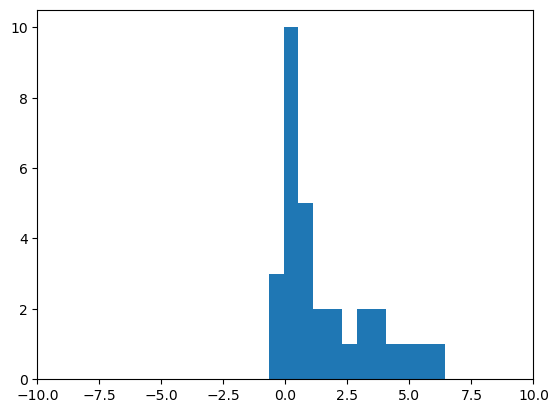

In [61]:
plt.hist(np.abs(time_111_x_D10L02)-np.abs(time_208_x_D10L02),bins=150)
plt.xlim(-10,10)
plt.show()

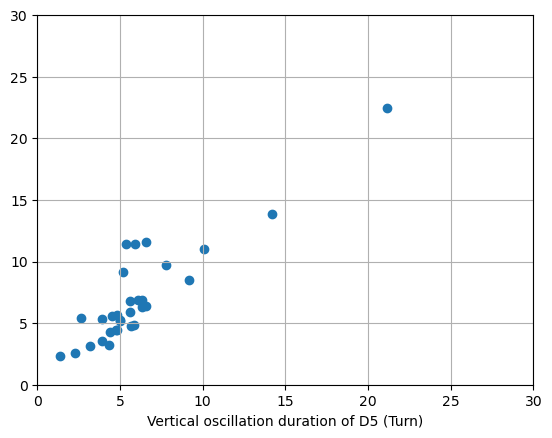

In [62]:
plt.scatter(np.abs(time_111_y_D10L02),np.abs(time_208_y_D10L02))
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Vertical oscillation duration of Fuji (Turn)")
plt.xlabel("Vertical oscillation duration of D5 (Turn)")
plt.grid()

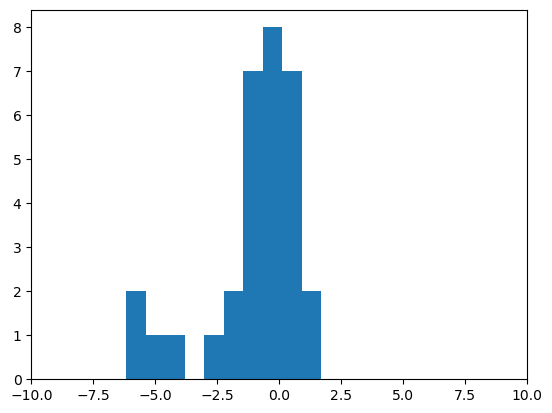

In [65]:
plt.hist(np.abs(time_111_y_D10L02)-np.abs(time_208_y_D10L02),bins=150)
plt.xlim(-10,10)
plt.show()

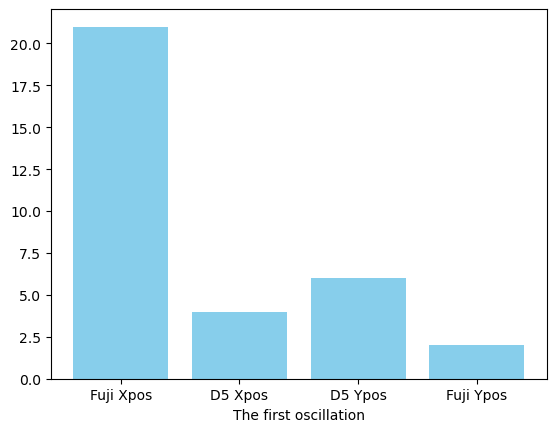

In [12]:
array_names = ["Fuji Xpos", "Fuji Ypos", "D5 Xpos", "D5 Ypos"]

# 配列を定義
array1 = time_111_x_D10L02
array2 = time_111_y_D10L02
array3 = time_208_x_D10L02
array4 = time_208_y_D10L02

# 配列をリストにまとめる
arrays = [array1, array2, array3, array4]

# 各インデックスで最小値を持つ配列名を特定
min_array_names = []
for i in range(len(array1)):
    min_index = np.argmin([array[i] for array in arrays])  # 最小値を持つ配列のインデックス
    min_array_names.append(array_names[min_index])

# ヒストグラム用データ
from collections import Counter
count_data = Counter(min_array_names)

# ヒストグラムを作成
plt.bar(count_data.keys(), count_data.values(), color='skyblue')
plt.xlabel('The first oscillation')
#plt.ylabel('Count')
#plt.title('Frequency of Minimum Values')
plt.show()

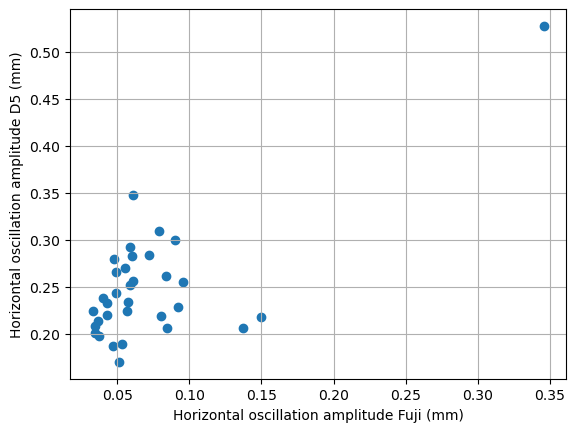

In [51]:
plt.scatter(np.array(amp_111_x_D10L02)/np.sqrt(19.13),np.array(amp_208_x_D10L02)/np.sqrt(7.05))
#plt.xlim(0,0.25)
#plt.ylim(0,0.25)
plt.xlabel("Horizontal oscillation amplitude Fuji (mm)")
plt.ylabel("Horizontal oscillation amplitude D5 (mm)")
plt.grid()

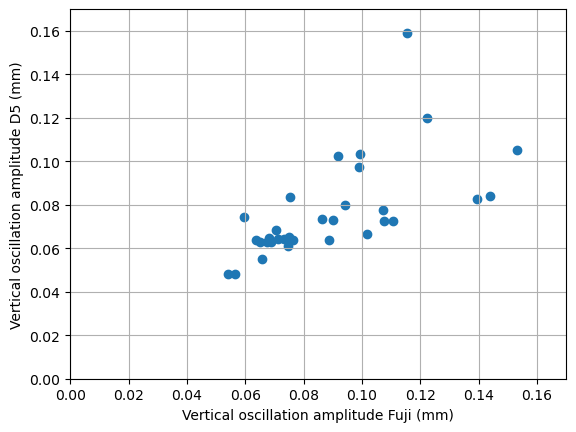

In [52]:
plt.scatter(np.array(amp_111_y_D10L02)/np.sqrt(19.15),np.array(amp_208_y_D10L02)/np.sqrt(77.18))
plt.xlim(0,0.17)
plt.ylim(0,0.17)
plt.xlabel("Vertical oscillation amplitude Fuji (mm)")
plt.ylabel("Vertical oscillation amplitude D5 (mm)")
plt.grid()

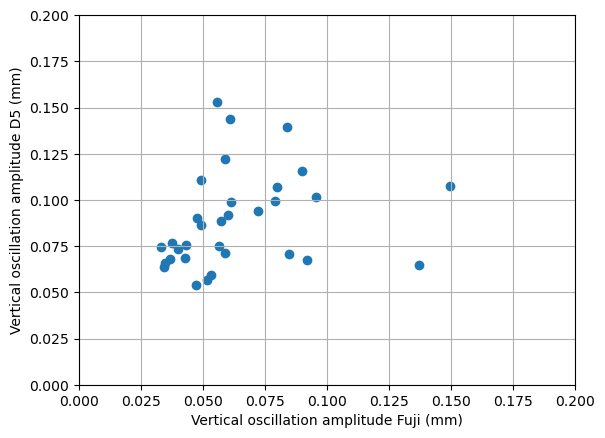

In [75]:
plt.scatter(np.array(amp_111_x_D10L02)/np.sqrt(19.13),np.array(amp_111_y_D10L02)/np.sqrt(19.15))
plt.xlim(0,0.2)
plt.ylim(0,0.2)
plt.xlabel("Vertical oscillation amplitude Fuji (mm)")
plt.ylabel("Vertical oscillation amplitude D5 (mm)")
plt.grid()

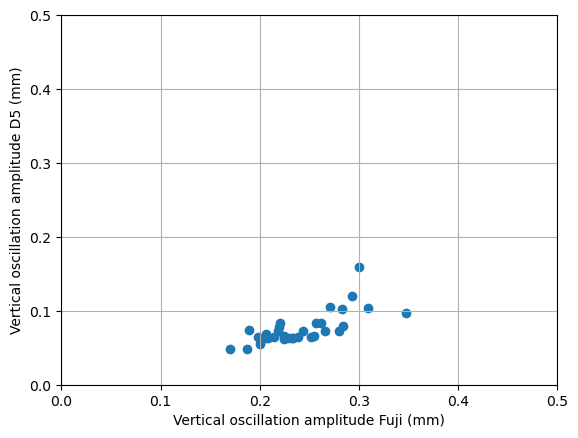

In [74]:
plt.scatter(np.array(amp_208_x_D10L02)/np.sqrt(7.05),np.array(amp_208_y_D10L02)/np.sqrt(77.18))

plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.xlabel("Vertical oscillation amplitude Fuji (mm)")
plt.ylabel("Vertical oscillation amplitude D5 (mm)")
plt.grid()


In [34]:
fuji_file

['LERFUJI_2024-10-27_13-43-55.npz',
 'LERFUJI_2024-10-27_15-10-13.npz',
 'LERFUJI_2024-10-27_15-32-04.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-27_23-44-12.npz',
 'LERFUJI_2024-10-28_02-06-05.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-10-28_02-55-30.npz',
 'LERFUJI_2024-10-28_19-13-27.npz',
 'LERFUJI_2024-10-29_01-41-14.npz',
 'LERFUJI_2024-10-29_03-00-30.npz',
 'LERFUJI_2024-10-29_15-19-37.npz',
 'LERFUJI_2024-10-29_17-51-52.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-10-29_22-59-36.npz',
 'LERFUJI_2024-10-29_23-49-03.npz',
 'LERFUJI_2024-10-30_02-02-03.npz',
 'LERFUJI_2024-10-30_02-30-10.npz',
 'LERFUJI_2024-11-01_03-49-06.npz',
 'LERFUJI_2024-11-01_04-31-16.npz',
 'LERFUJI_2024-11-02_08-54-09.npz',
 'LERFUJI_2024-11-02_12-30-45.npz',
 'LERFUJI_2024-11-02_13-51-41.npz',
 'LERFUJI_2024-11-02_16-48-53.npz',
 'LERFUJI_2024-11-02_19-05-51.npz',
 'LERFUJI_2024-11-03_03-33-06.npz',
 'LERFUJI_2024-11-03_03-58-26.npz',
 'LERFUJI_2024-11-03_11-46-0

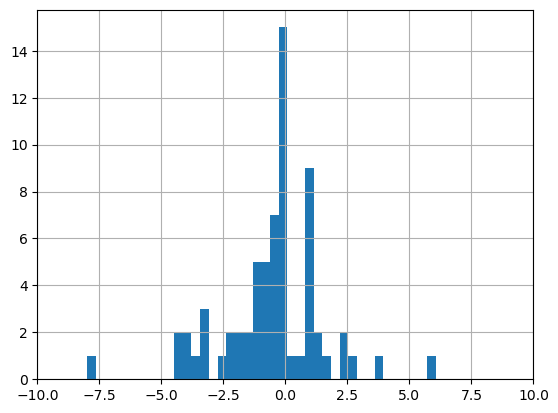

In [19]:
plt.hist(np.fmin(np.array(time_111_x),np.array(time_111_y))-np.fmin(np.array(time_208_x),np.array(time_208_y)),bins=500)
plt.grid()
plt.xlim(-10,10)
plt.show()

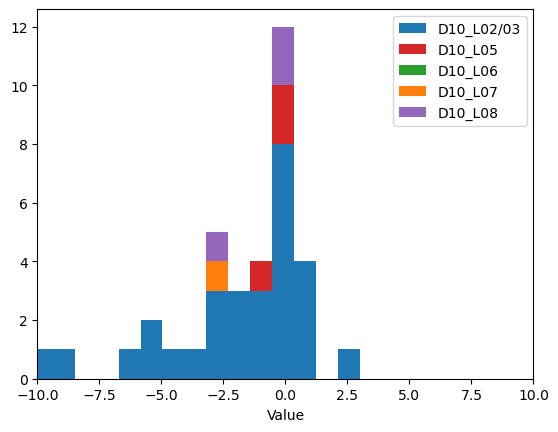

In [27]:
plt.hist([np.array(time_111_x_D10L02)-np.array(time_208_x_D10L02),
          np.array(time_111_x_D10L05)-np.array(time_208_x_D10L05),
          np.array(time_111_x_D10L06)-np.array(time_208_x_D10L06),
          np.array(time_111_x_D10L07)-np.array(time_208_x_D10L07),
          np.array(time_111_x_D10L08)-np.array(time_208_x_D10L08)], bins=200, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02/03','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-10,10)
plt.show()

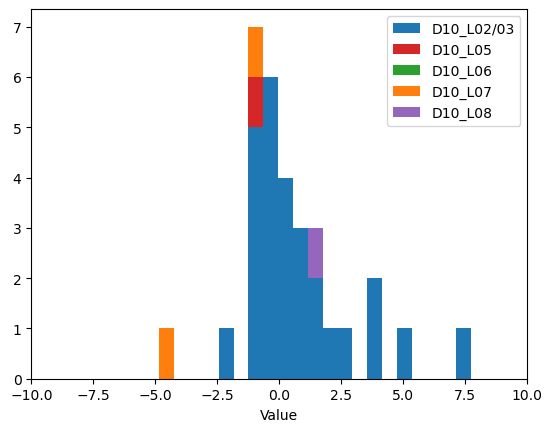

In [28]:
plt.hist([np.array(time_111_y_D10L02)-np.array(time_208_y_D10L02),
          np.array(time_111_y_D10L05)-np.array(time_208_y_D10L05),
          np.array(time_111_y_D10L06)-np.array(time_208_y_D10L06),
          np.array(time_111_y_D10L07)-np.array(time_208_y_D10L07),
          np.array(time_111_y_D10L08)-np.array(time_208_y_D10L08)], bins=300, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02/03','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
plt.xlim(-10,10)
plt.show()

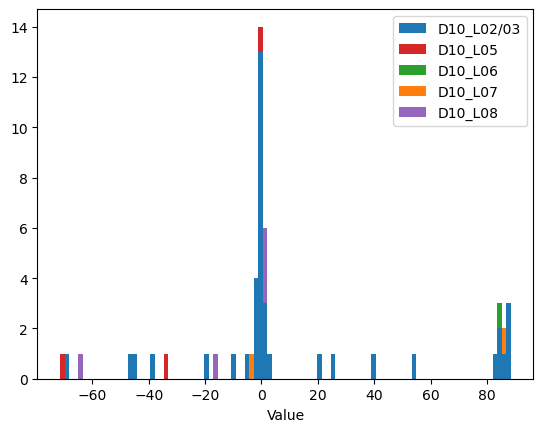

In [31]:
plt.hist([np.fmin(np.array(time_111_x_D10L02),np.array(time_111_y_D10L02))-np.fmin(np.array(time_208_x_D10L02),np.array(time_208_y_D10L02)),
          np.fmin(np.array(time_111_x_D10L05),np.array(time_111_y_D10L05))-np.fmin(np.array(time_208_x_D10L05),np.array(time_208_y_D10L05)),
          np.fmin(np.array(time_111_x_D10L06),np.array(time_111_y_D10L06))-np.fmin(np.array(time_208_x_D10L06),np.array(time_208_y_D10L06)),
          np.fmin(np.array(time_111_x_D10L07),np.array(time_111_y_D10L07))-np.fmin(np.array(time_208_x_D10L07),np.array(time_208_y_D10L07)),
          np.fmin(np.array(time_111_x_D10L08),np.array(time_111_y_D10L08))-np.fmin(np.array(time_208_x_D10L08),np.array(time_208_y_D10L08))], bins=100, stacked=True, 
         color=['tab:blue', 'tab:red', 'tab:green','tab:orange','tab:purple'], label=['D10_L02/03','D10_L05','D10_L06','D10_L07','D10_L08'])

# ラベル・凡例
plt.xlabel('Value')
plt.legend()
#plt.xlim(-10,10)
plt.show()

# Custom event

In [18]:
from sklearn.decomposition import PCA

def make_plot(filename1,pressure):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']
    print(len(X_sum))

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz":
        return
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 1.5, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 1.5, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    iii=80
    a=tbtdata_111_x_ma[-iii*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_x))*0.6
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            iii*5120
        )
    index_111=index_111-iii*5120
    print(index_111)
    a=tbtdata_111_y_ma[-iii*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_y))*0.6
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            iii*5120
        )
    index_111_y=index_111_y-iii*5120
    print(index_111_y)

    #######################################
    
    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.4,0.4)
    ax1.grid()
    ax1.set_ylim(-0.2,0.2)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.2,0.2)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-80,-0)
    plt.xlabel('Turn')
    #plt.savefig(f'masterthesis/{filename1[8:-4]}_111.png',dpi=100)
    plt.show()
    print(time_111)
    print(time_111_y)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.2,0.2)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.2,0.2)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-15,0)
    plt.xlabel('Turn')
    #plt.savefig(f'masterthesis/{filename1[8:-4]}_111_2.png',dpi=100)
    plt.show()

    plt.rcParams["font.size"] = 12
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    #ax1.set_title(f'{filename1[8:-4]}')

    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1,alpha=0.3)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.2,label='Moving average')
    ax1.axhline(y=np.nanstd(tbtdata_111_x)*0.6,c='blue',label='Threshold')
    ax1.axhline(y=-1*np.nanstd(tbtdata_111_x)*0.6,c='blue')
    ax1.vlines(time_111,-0.6,0.6,color='tab:orange')
    ax1.grid()
    ax1.legend(fontsize=10,loc='upper left')
    ax1.set_ylim(-0.2,0.2)
    ax1.set_ylabel('X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1,alpha=0.3)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.2,label='Moving average')
    ax2.axhline(y=np.nanstd(tbtdata_111_y)*0.6,c='blue',label='Threshold')
    ax2.axhline(y=-1*np.nanstd(tbtdata_111_y)*0.6,c='blue')
    ax2.vlines(time_111_y,-0.6,0.6,color='tab:orange')
    ax2.grid()
    ax2.legend(fontsize=10,loc='upper left')
    ax2.set_ylim(-0.2,0.2)
    ax2.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    ax2.set_ylabel('Y pos (mm)')
    """
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111*100,c='blue',s=1)
    ax3.grid()
    ax3.set_ylim(0,120)
    ax3.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    ax3.set_ylabel('Charge (%)')
    """
    plt.xlim(-8,0)
    plt.xlabel('Turn')
    #plt.savefig(f'masterthesis/{filename1[8:-4]}_111_3.png',dpi=100)
    plt.show()



    fs=509e6
    signal=tbtdata_111_x_ma[-80*5120:]
    signal = pd.Series(signal).interpolate().to_numpy()
    signal = signal[~np.isnan(signal)]

    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), 1/fs)
    print(fft_result)
    # 正の周波数のみ
    positive_freqs = frequencies[frequencies >= 0]
    positive_fft = 2/len(signal) * np.abs(fft_result[frequencies >= 0])
    
    # プロット
    plt.plot(positive_freqs/1e3, positive_fft)
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Amplitude')
    plt.xlim(0,150)
    plt.grid()
    plt.show()

    signal=tbtdata_111_y_ma[-80*5120:]
    signal = pd.Series(signal).interpolate().to_numpy()
    signal = signal[~np.isnan(signal)]

    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), 1/fs)
    print(fft_result)
    # 正の周波数のみ
    positive_freqs = frequencies[frequencies >= 0]
    positive_fft = 2/len(signal) * np.abs(fft_result[frequencies >= 0])
    
    # プロット
    plt.plot(positive_freqs/1e3, positive_fft)
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Amplitude')
    plt.xlim(0,150)
    plt.grid()
    plt.show()


    return time_111,time_111_y, np.nanmax(tbtdata_111_x)-np.nanmin(tbtdata_111_x) ,np.nanmax(tbtdata_111_y)-np.nanmin(tbtdata_111_y) ,charge_time_111

524288
-114466
-129203


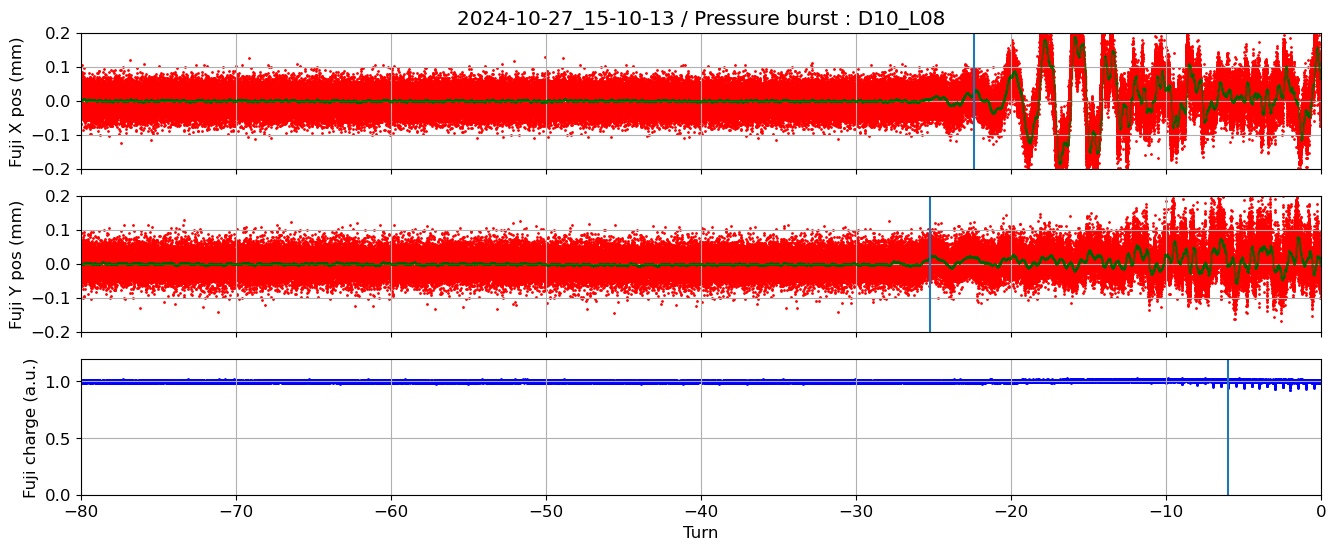

-22.3564453125
-25.23476562500001


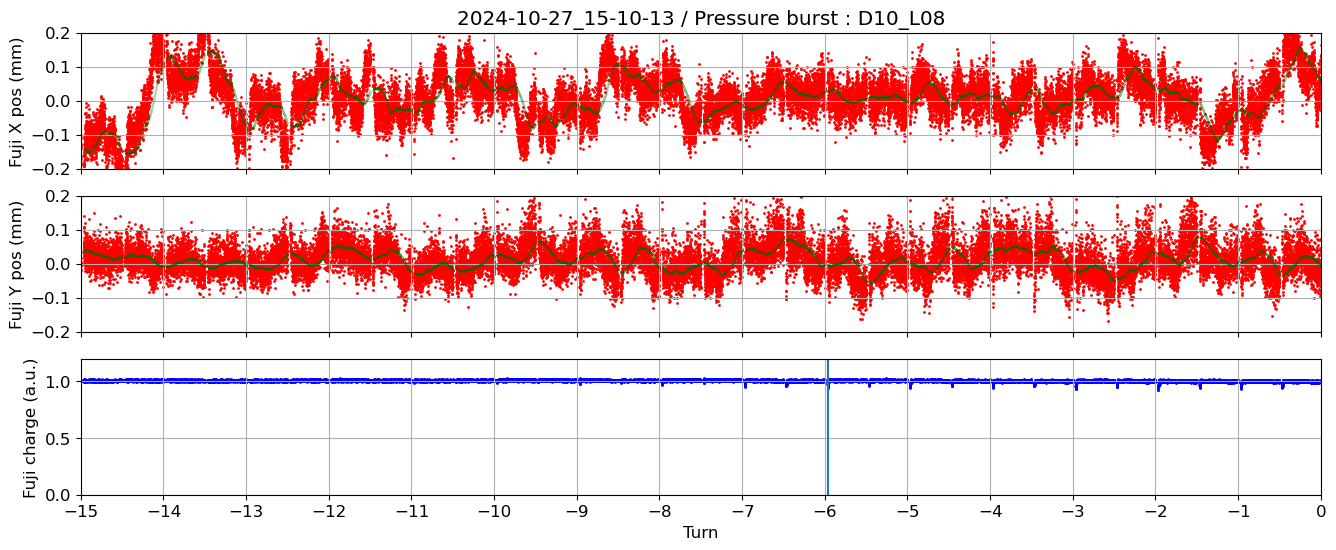

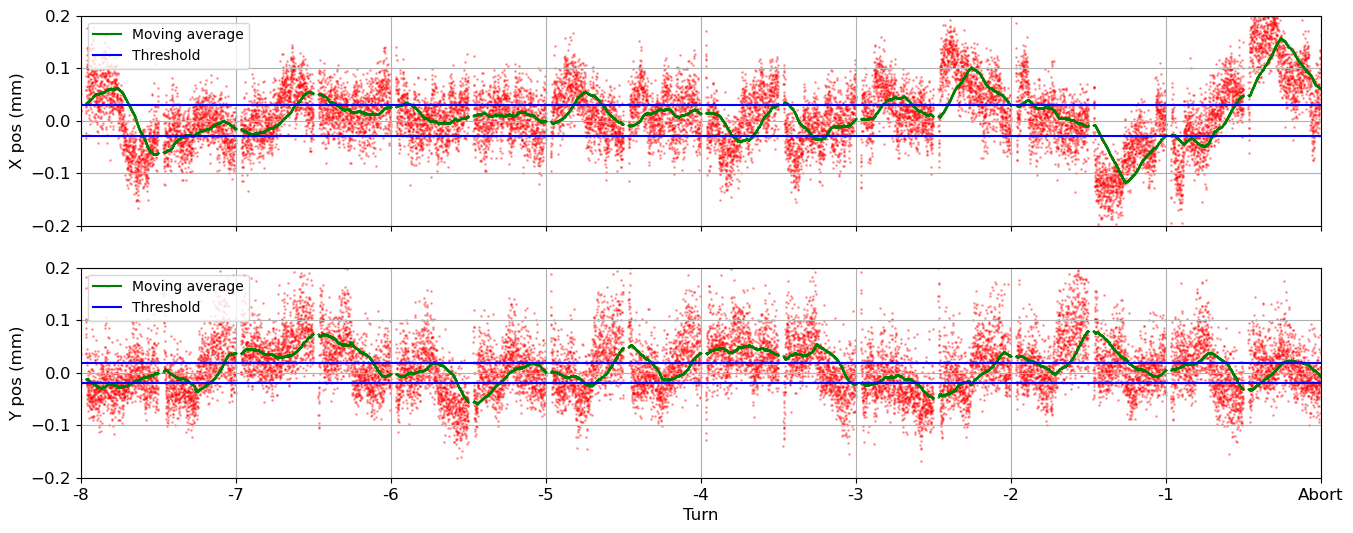

[1137.89066787+4.40758541e-14j  758.07556519+6.60282897e+02j
  145.87522241+5.86019679e+02j ...   25.08571202-1.89058479e+02j
  145.87522241-5.86019679e+02j  758.07556519-6.60282897e+02j]


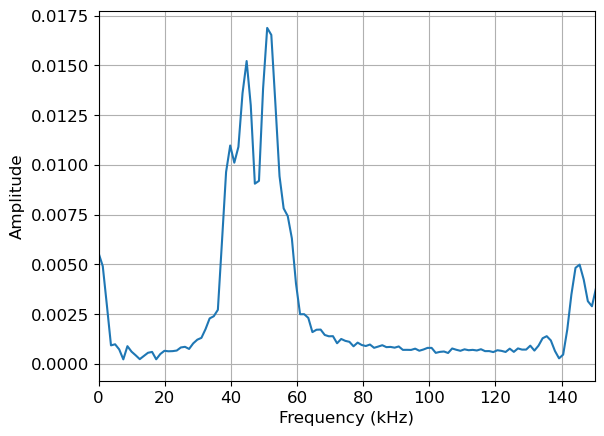

[1153.37810687+3.16691118e-14j  885.45709168+8.79498195e+02j
 -182.85418139+5.80734256e+02j ...   42.90214089-2.15413384e+02j
 -182.85418139-5.80734256e+02j  885.45709168-8.79498195e+02j]


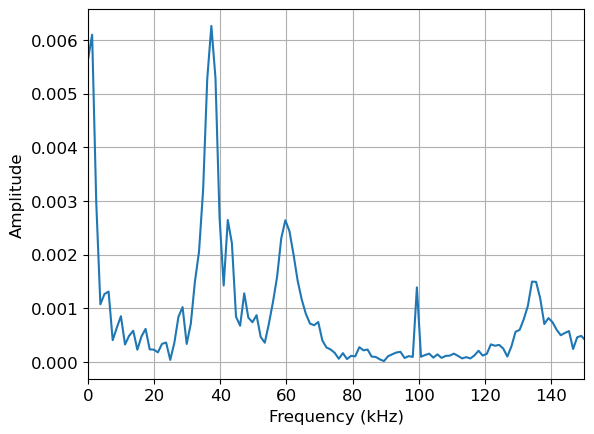

(-22.3564453125,
 -25.23476562500001,
 0.6608049507080623,
 0.43498334322649423,
 -5.966796875)

In [19]:
make_plot("LERFUJI_2024-10-27_15-10-13.npz",'D10_L08')

524288
-29126
-372378


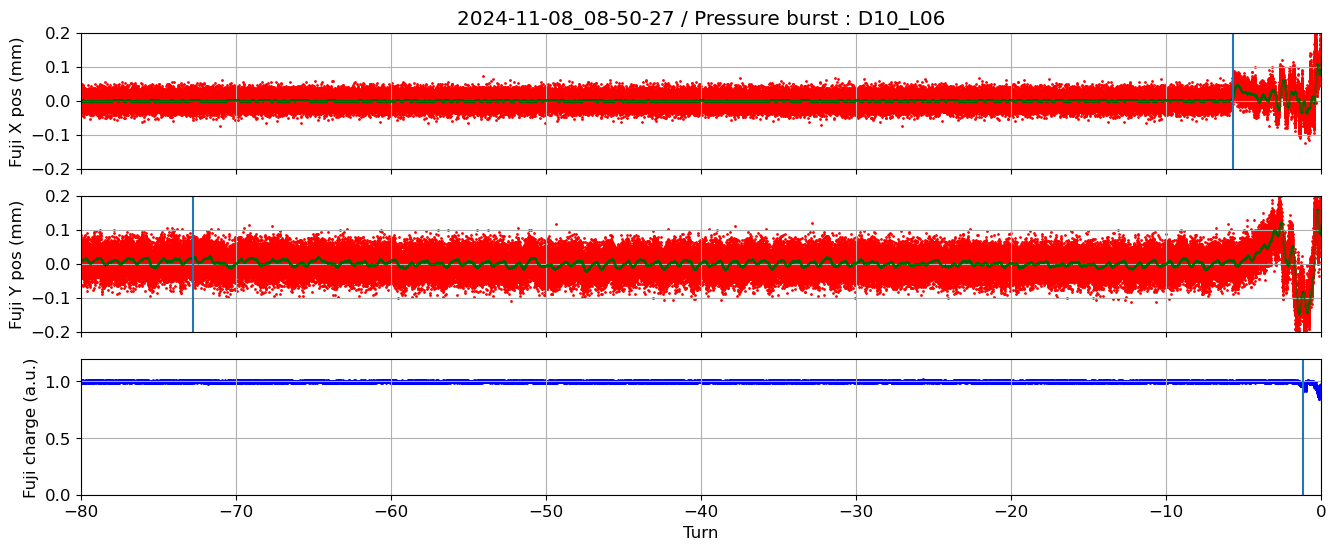

-5.6884765625
-72.7298828125


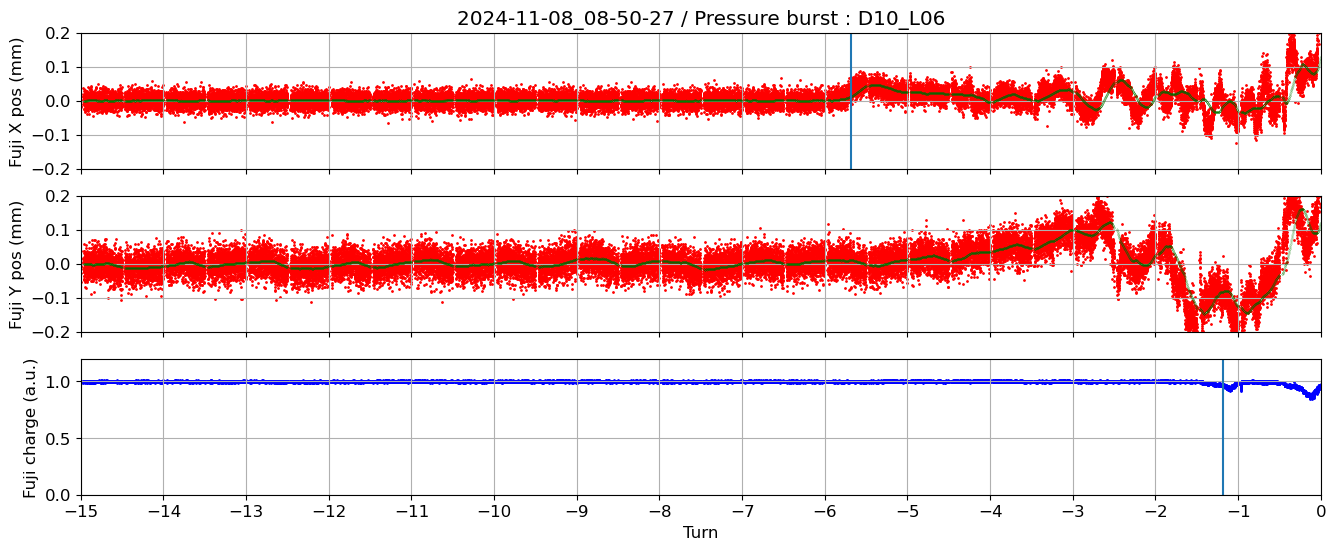

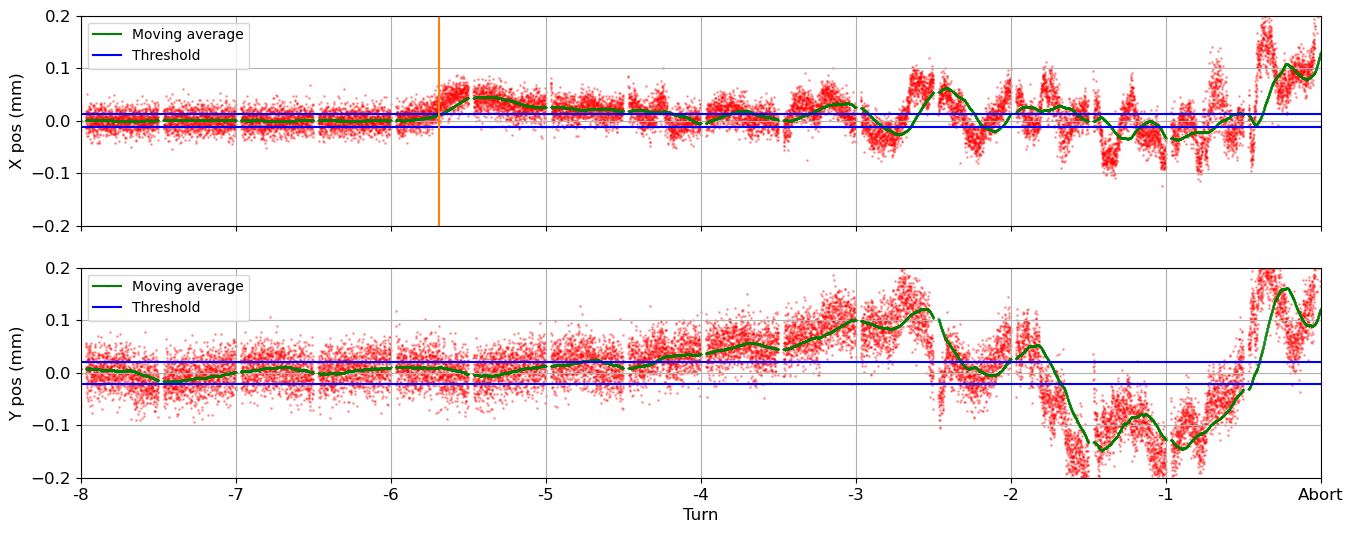

[ 77.36900127 +0.j           8.86350377-16.35591356j
   3.15915436+56.49065867j ... -29.38623603 +4.4487241j
   3.15915436-56.49065867j   8.86350377+16.35591356j]


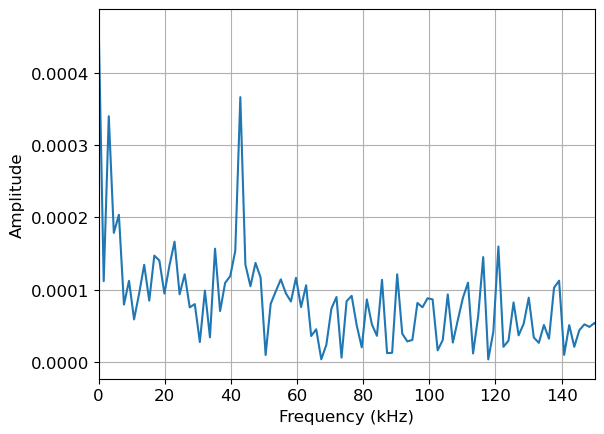

[ 721.95109055  +0.j          378.94797451-277.00876155j
 -142.32718877-401.73417781j ...   54.62938703+233.26944532j
 -142.32718877+401.73417781j  378.94797451+277.00876155j]


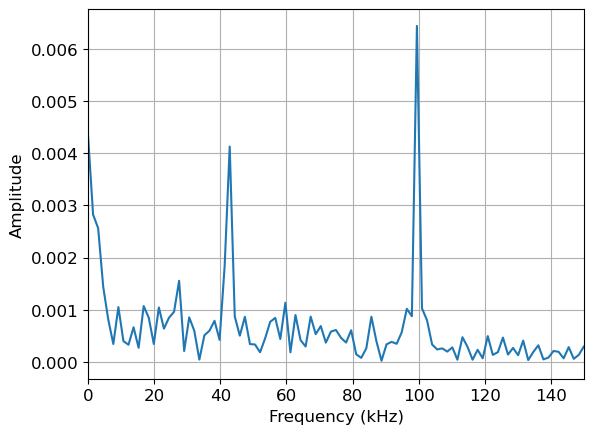

(-5.6884765625,
 -72.7298828125,
 0.5348363502058422,
 0.6080767494312713,
 -1.1769531249999972)

In [14]:
make_plot("LERFUJI_2024-11-08_08-50-27.npz",'D10_L06')

524288
-19265
-188458


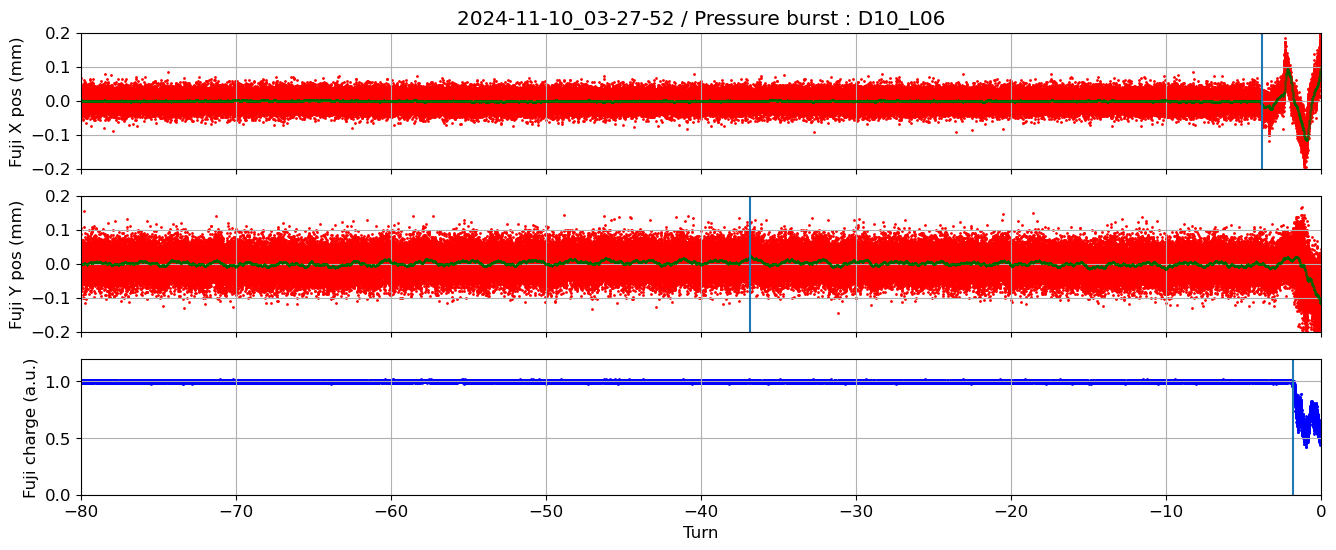

-3.762500000000003
-36.8080078125


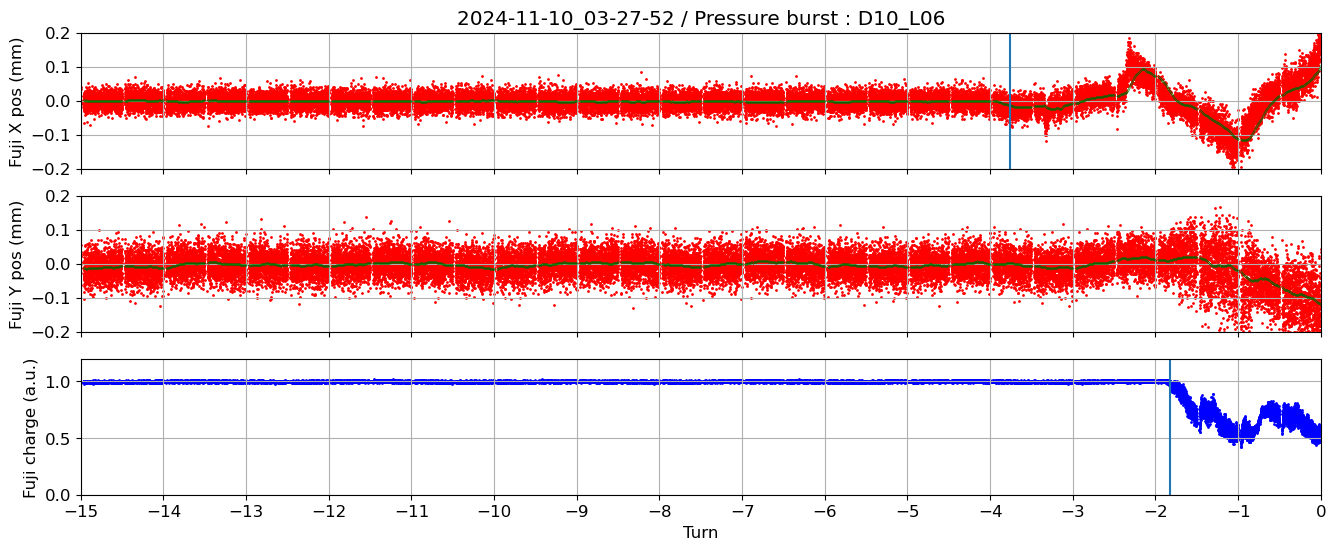

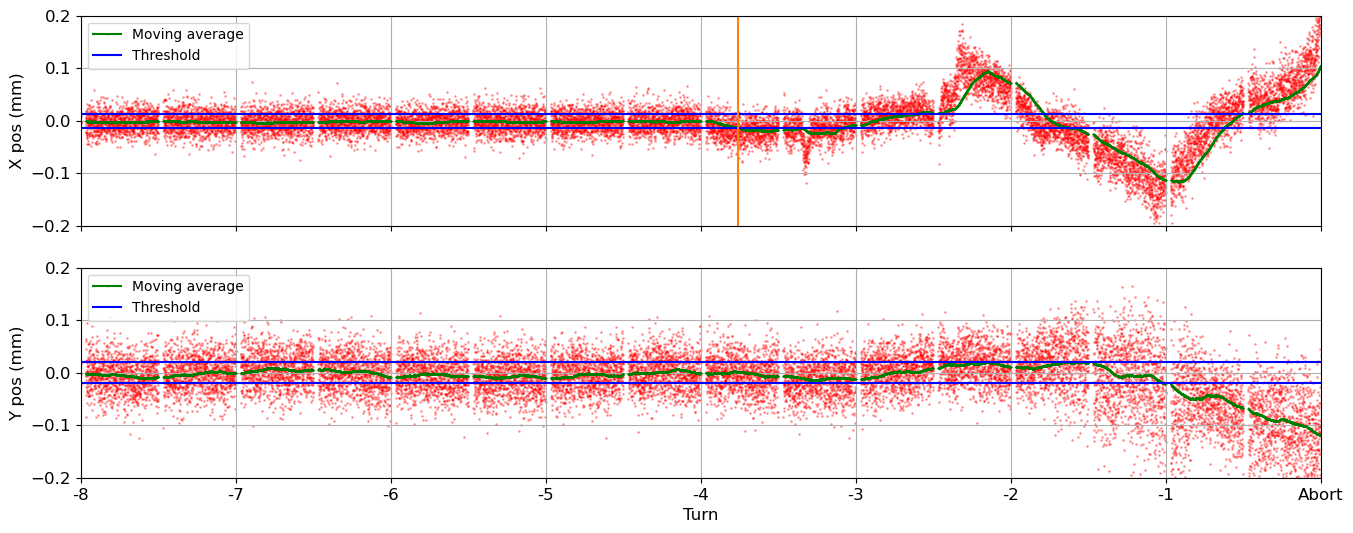

[-240.76150935+4.58487415e-15j   62.23086015-1.77809397e+01j
  -67.01097255-6.01219461e+01j ...  -18.1425477 -3.31765367e+01j
  -67.01097255+6.01219461e+01j   62.23086015+1.77809397e+01j]


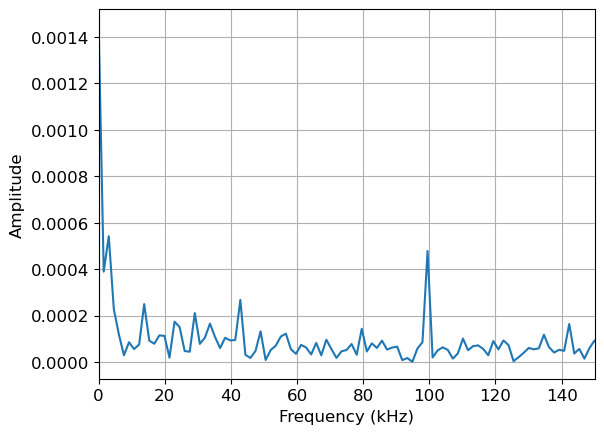

[ 792.236169  -1.39055434e-14j -404.00859106+3.24014338e+02j
  163.71286217-7.04041130e+01j ...   90.10911685+1.10892252e+02j
  163.71286217+7.04041130e+01j -404.00859106-3.24014338e+02j]


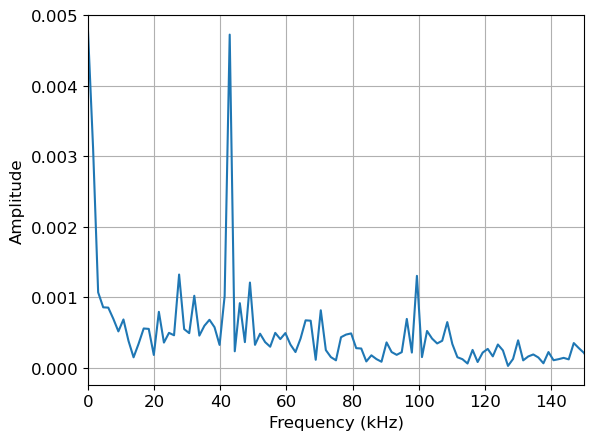

(-3.762500000000003,
 -36.8080078125,
 0.4820341856885276,
 0.47189213876841407,
 -1.8218750000000057)

In [13]:
make_plot("LERFUJI_2024-11-10_03-27-52.npz",'D10_L06')

In [68]:
def make_spectrum(filename1,filename2,mark,pressure):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz" or filename1=="LERFUJI_2024-10-16_02-27-58.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 0.7, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 0.7, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    iii=80

    a=tbtdata_111_x_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_x))*0.6
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111=index_111-80*5120
    print(index_111)
    a=tbtdata_111_y_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_111_y))*0.6
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111_y=index_111_y-80*5120
    print(index_111_y)


    #######################################
    #
    #               ZCU208
    #
    ########################################
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU208/Abort/'+filename2,allow_pickle=True)
    AC_sum=npz_kw['AC_sum']
    AC_delta=npz_kw['AC_delta']
    BD_sum=npz_kw['BD_sum']
    BD_delta=npz_kw['BD_delta']

    
    timesteps2=np.arange(len(AC_sum))/5120
    timesteps2=timesteps2-timesteps2[-1]

    ##################    


    df = pd.DataFrame({'x':timesteps2,'AC_sum':AC_sum,'AC_delta':AC_delta,'BD_sum':BD_sum,'BD_delta':BD_delta})
    threshold=500
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['AC_sum'] > threshold, (df['AC_delta']+df['BD_delta']) / (df['AC_sum']+df['BD_sum']) *(31.8/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_x'] = df['result_x']
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 0.7, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_y'] = np.where(df['AC_sum'] > threshold, (df['AC_delta']-df['BD_delta']) / (df['AC_sum']+df['BD_sum']) *(32.7/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 0.7, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['AC_sum'] > threshold,  df['AC_sum']+df['BD_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)
    
    

    condition = df['AC_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['AC_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除


    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan,np.nan,np.nan,np.nan
    tbtdata_208_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values

    if mark==1:
        tbtdata_208_x=df['result_interp_AC'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_ma=df['AC_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_std=df['AC_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y=df['result_interp_BD'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_ma=df['BD_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_std=df['BD_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    turn208=turn

    a=tbtdata_208_x_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_208_x))*0.6
    index_208 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120)
    index_208=index_208-80*5120
    print(index_208)
    a=tbtdata_208_y_ma[-80*5120:]
    b=np.full(iii*5120,np.nanstd(tbtdata_208_y))*0.6
    index_208_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120)
    index_208_y=index_208_y-80*5120
    print(index_208_y)


    ##########  PLOT  ############
    
    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    #ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    #ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])

    
    
    #ax7.scatter(timeaxis[-20*5120:],tbtdata_111_x[-21*5120:-5120]**2+tbtdata_111_y[-20*5120:]**2,s=1)
    #ax7.grid()
    #ax7.set_ylim(0,0.3)
    plt.xlim(-10,0)
    plt.xlabel('Turn')
    #plt.savefig(f'masterthesis/combined/{filename1[8:-4]}.png',dpi=100)
    plt.show()



    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    #ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    #ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    
    plt.xlim(-80,0)
    plt.xlabel('Turn')
    #plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_2.png',dpi=100)
    plt.show()

    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]} / Pressure burst : {pressure}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    #ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    #ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    #ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    #ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    #ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    
    plt.xlim(-27,-12)
    plt.xlabel('Turn')
    #plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_3.png',dpi=100)
    plt.show()



    """

    
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True,figsize=(12,3))
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.scatter(timeaxis,100*charge_111,c='blue',s=1)
    ax1.grid()
    ax1.set_ylim(0,120)
    ax1.set_ylabel('Fuji charge (%)')

    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax2.scatter(timeaxis,100*charge_208,c='blue',s=1)
    ax2.grid()
    ax2.set_ylim(0,120)
    ax2.set_ylabel('D5 charge (%)')

    ax2.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    plt.xlim(-8,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_charge.png',dpi=100,bbox_inches='tight')
    plt.close()

    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    fig, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(12,3))
    mask = ~np.isnan(charge_111[-20*5120:]) & ~np.isnan(charge_208[-20*5120:])
    result = np.zeros_like(charge_208[-20*5120:])
    result[mask] = charge_111[-20*5120:][mask] - charge_208[-20*5120:][mask]
    ax1.scatter(timeaxis[-20*5120:],100*result,label='D5 to Fuji',s=1)



    mask = ~np.isnan(charge_111[-21*5120:-5120]) & ~np.isnan(charge_208[-20*5120:])
    result = np.zeros_like(charge_208[-20*5120:])
    result[mask] = charge_111[-21*5120:-5120][mask] - charge_208[-20*5120:][mask]
    ax1.scatter(timeaxis[-20*5120:],100*result,label='Fuji to D5',s=1)
    
    ax1.grid()
    ax1.set_ylabel('Charge loss (%)')
    ax1.set_ylim(0,30)
    ax1.legend(loc='upper left')
    ax1.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0],['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','Abort'])
    plt.xlim(-8,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_chargeloss.png',dpi=100,bbox_inches='tight')
    plt.close()

    """

    y=tbtdata_111_x[-5120*5:-5120*1]/np.sqrt(19.1293)
    x=tbtdata_208_x[-5120*4:]/np.sqrt(6.07)
    valid_mask = ~np.isnan(x) & ~np.isnan(y)  # 両方が有効なインデックスを取得
    x_data = x[valid_mask]
    y_data = y[valid_mask]
    def linear_model(x, a, b):
        return a * x + b

    
    # curve_fitを使ってフィット
    popt, pcov = curve_fit(linear_model, x_data, y_data)
    
    # フィット結果とその誤差
    a_fit, b_fit = popt
    a_err, b_err = np.sqrt(np.diag(pcov))  # 標準誤差は共分散行列の対角成分の平方根
    
    """
    coefficients, cov = np.polyfit(x_data, y_data, deg=1, cov=True)
    a_fit, b_fit = coefficients
    a_err, b_err = np.sqrt(np.diag(cov))  # 標準誤差
    """
    # フィット結果の出力
    print(f"フィット結果:")
    print(f"  傾き (a): {a_fit:.3f} ± {a_err:.3f}")
    print(f"  切片 (b): {b_fit:.3f} ± {b_err:.3f}")
    
    # フィット曲線を生成
    x_fit = np.linspace(-1, 1, 100)
    y_fit = linear_model(x_fit, a_fit, b_fit)
    
    # プロット
    
    plt.scatter(x_data, y_data, label="Data", color="blue",s=1)
    plt.plot(x_fit, y_fit, label=f"Fit: y = ({a_fit:.3f}±{a_err:.3f})x + ({b_fit:.3f}±{b_err:.3f})", color="red")
    plt.xlabel("X pos (mm)")
    plt.ylabel("X pos after 1 turn (mm)")
    plt.legend()
    plt.xlim(-0.5,0.5)
    plt.ylim(-0.1,0.1)
    plt.grid()
    plt.show()



    

    #######################################################
    num_plots=9
    fig, axs = plt.subplots(3, 3, figsize=(12, 10))
    for i in range(num_plots):
        ch=1-charge_111[-5120:-1]
        x=tbtdata_111_x[-5120*(10-i):-5120*(9-i)-1]
        y=tbtdata_208_x[-5120*(9-i):-5120*(8-i)-1]/np.sin(np.pi*19.488)/np.sqrt(19.1293*7.05445) - (1/np.tan(19.488*np.pi)-0.99675)*tbtdata_111_x[-5120*(10-i):-5120*(9-i)-1]/19.1293
        valid_mask = ~np.isnan(x) & ~np.isnan(y)  # 両方が有効なインデックスを取得
        x_valid = x[valid_mask]
        y_valid = y[valid_mask]
        ch_valid=ch[valid_mask]
        sort_indices = np.argsort(ch_valid)
        x_sorted = x_valid[sort_indices]
        y_sorted = y_valid[sort_indices]
        ch_sorted = ch_valid[sort_indices]
        # プロットの行と列のインデックス
        row = i // 3
        col = i % 3
        # 散布図を描画
        scatter=axs[row, col].scatter(x_sorted,y_sorted,c=ch_sorted,s=1,cmap='cividis_r')
        axs[row, col].set_title(f"Plot {9-i}")
        axs[row, col].set_xlabel(f"Fuji X pos")
        axs[row, col].set_ylabel(f"D5 X pos")
        #axs[row, col].set_xlim(-0.4,0.4)
        #axs[row, col].set_ylim(-0.1,0.1)
        axs[row, col].grid()
        #x___ = np.linspace(-0.3, 0.3, 10)  # -10から10までを100点で分割
        #y___ = 2 * x___
        #axs[row,col].plot(x___,y___,c='red',linewidth=0.5)
        cbar = fig.colorbar(scatter, ax=axs[row, col], orientation="vertical", shrink=0.9)
        #cbar.set_label("Charge Difference")
    # 全体のレイアウト調整
    plt.tight_layout()
    #plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_4.png',dpi=100)
    plt.show()

    num_plots=9
    fig, axs = plt.subplots(3, 3, figsize=(12, 10))
    for i in range(num_plots):
        ch=1-charge_111[-5120:-1]
        x=tbtdata_111_y[-5120*(10-i):-5120*(9-i)-1]
        y=tbtdata_208_y[-5120*(9-i):-5120*(8-i)-1]/np.sin(np.pi*20.3758)/np.sqrt(19.147*77.1796) - (1/np.tan(20.3758*np.pi)-1)*tbtdata_111_y[-5120*(10-i):-5120*(9-i)-1]/19.147
        
        valid_mask = ~np.isnan(x) & ~np.isnan(y)  # 両方が有効なインデックスを取得
        x_valid = x[valid_mask]
        y_valid = y[valid_mask]
        ch_valid=ch[valid_mask]
        sort_indices = np.argsort(ch_valid)
        x_sorted = x_valid[sort_indices]
        y_sorted = y_valid[sort_indices]
        ch_sorted = ch_valid[sort_indices]
        # プロットの行と列のインデックス
        row = i // 3
        col = i % 3
        # 散布図を描画
        scatter=axs[row, col].scatter(x_sorted,y_sorted,c=ch_sorted,s=1,cmap='cividis_r')
        axs[row, col].set_title(f"Plot {9-i}")
        axs[row, col].set_xlabel(f"Fuji Y pos")
        axs[row, col].set_ylabel(f"D5 Y Pos")
        #axs[row, col].set_xlim(-0.4,0.4)
        #axs[row, col].set_ylim(-0.1,0.1)
        axs[row, col].grid()
        #x___ = np.linspace(-0.3, 0.3, 10)  # -10から10までを100点で分割
        #y___ = 2 * x___
        #axs[row,col].plot(x___,y___,c='red',linewidth=0.5)
        cbar = fig.colorbar(scatter, ax=axs[row, col], orientation="vertical", shrink=0.9)
        #cbar.set_label("Charge Difference")
    # 全体のレイアウト調整
    plt.tight_layout()
    #plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_3.png',dpi=100)
    plt.show()

    
    
    
    #return time_111, time_111_y,time_208,time_208_y
    return np.nanmax(tbtdata_111_x[:-10])-np.nanmin(tbtdata_111_x[:-10]), np.nanmax(tbtdata_111_y[:-10])-np.nanmin(tbtdata_111_y[:-10]), np.nanmax(tbtdata_208_x[:-10])-np.nanmin(tbtdata_208_x[:-10]), np.nanmax(tbtdata_208_y[:-10])-np.nanmin(tbtdata_208_y[:-10]),

-23107
-17376
-27610
-27488


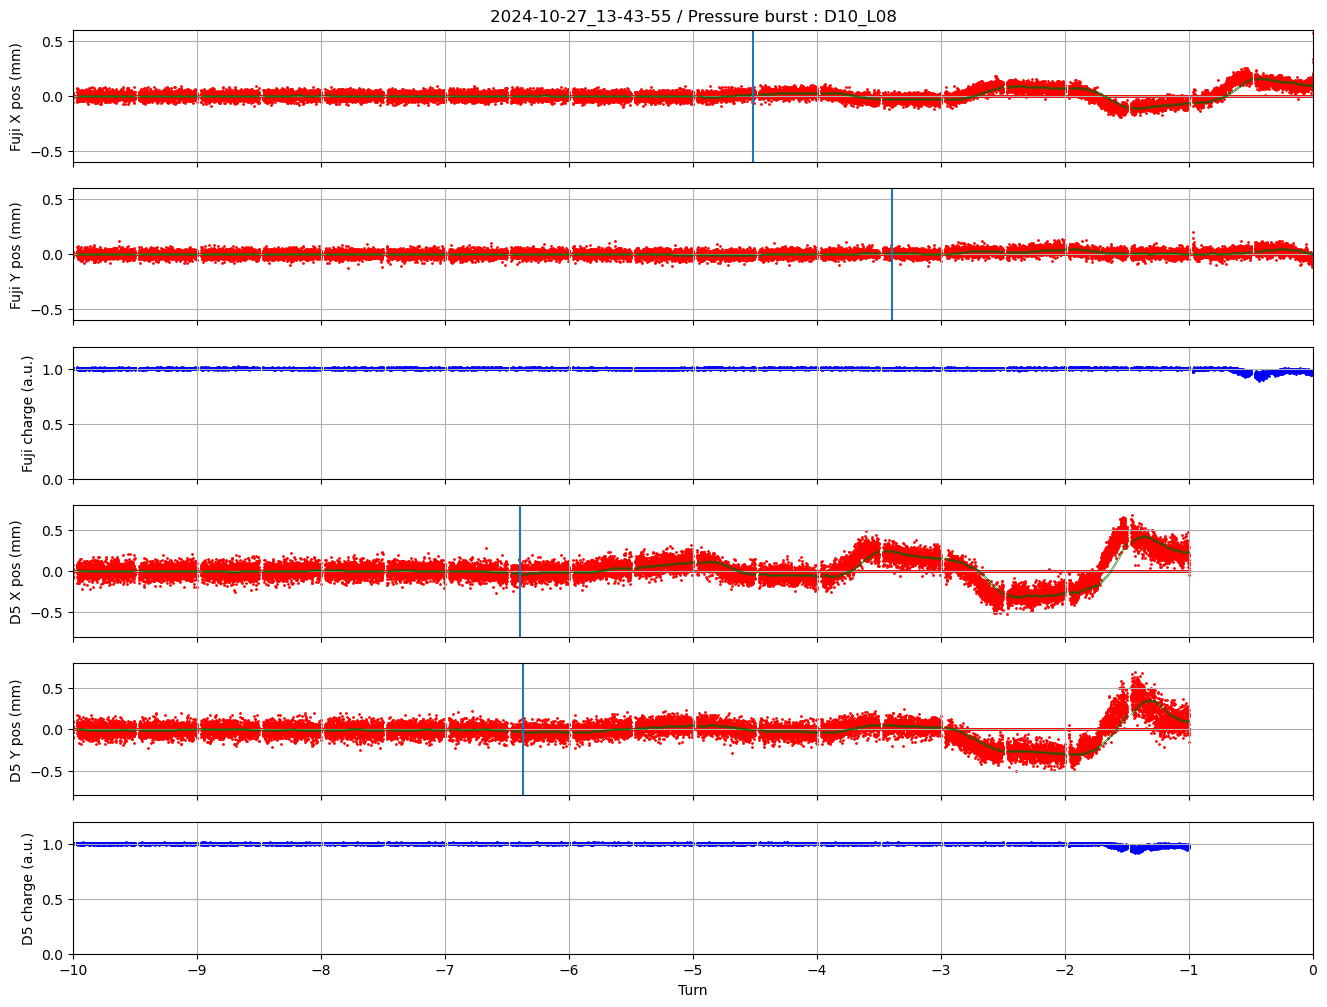

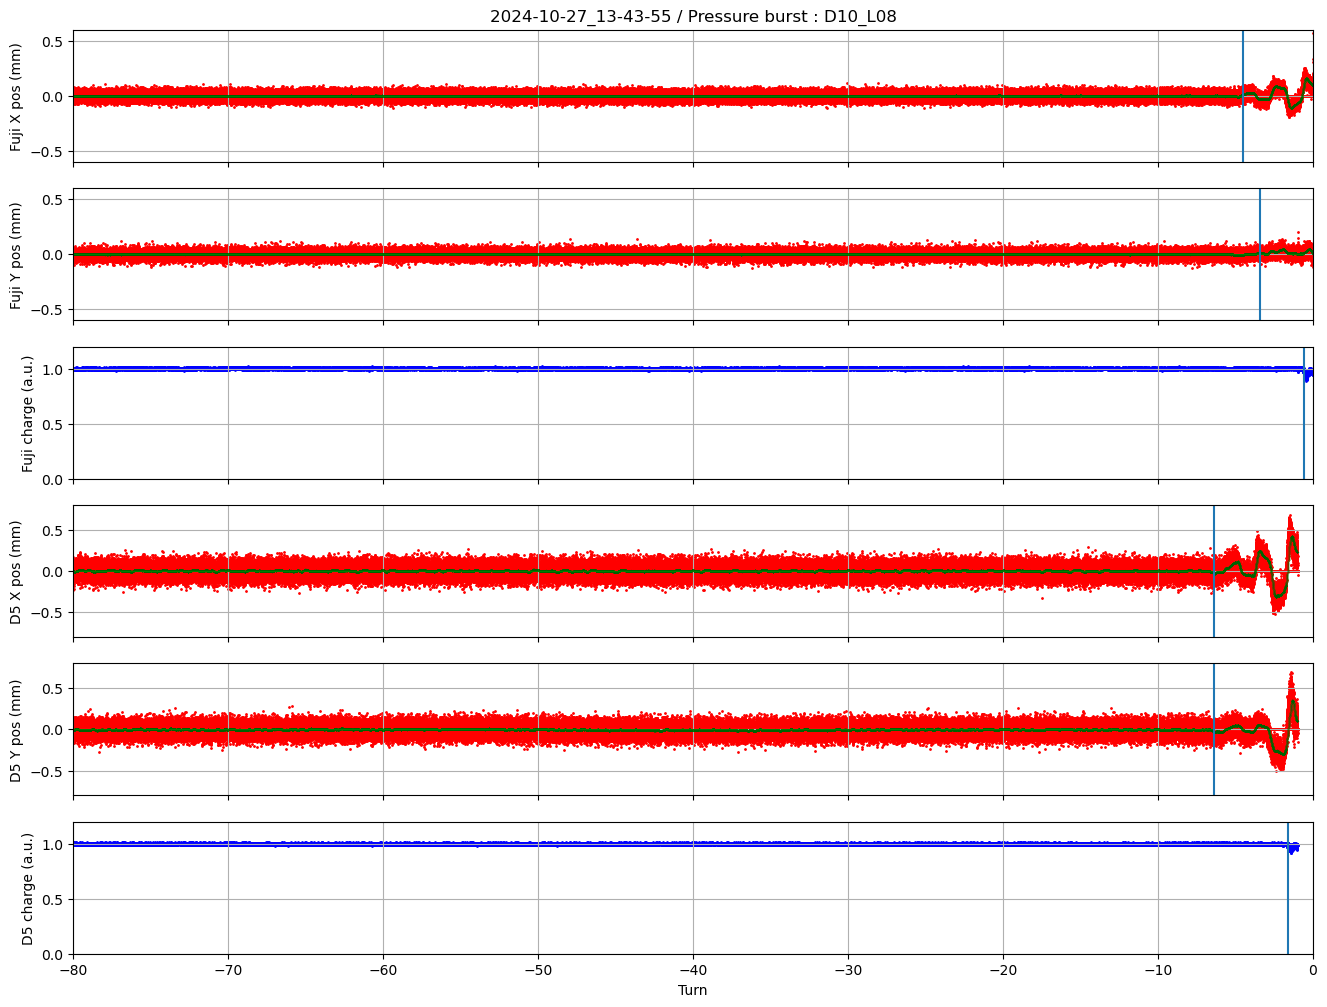

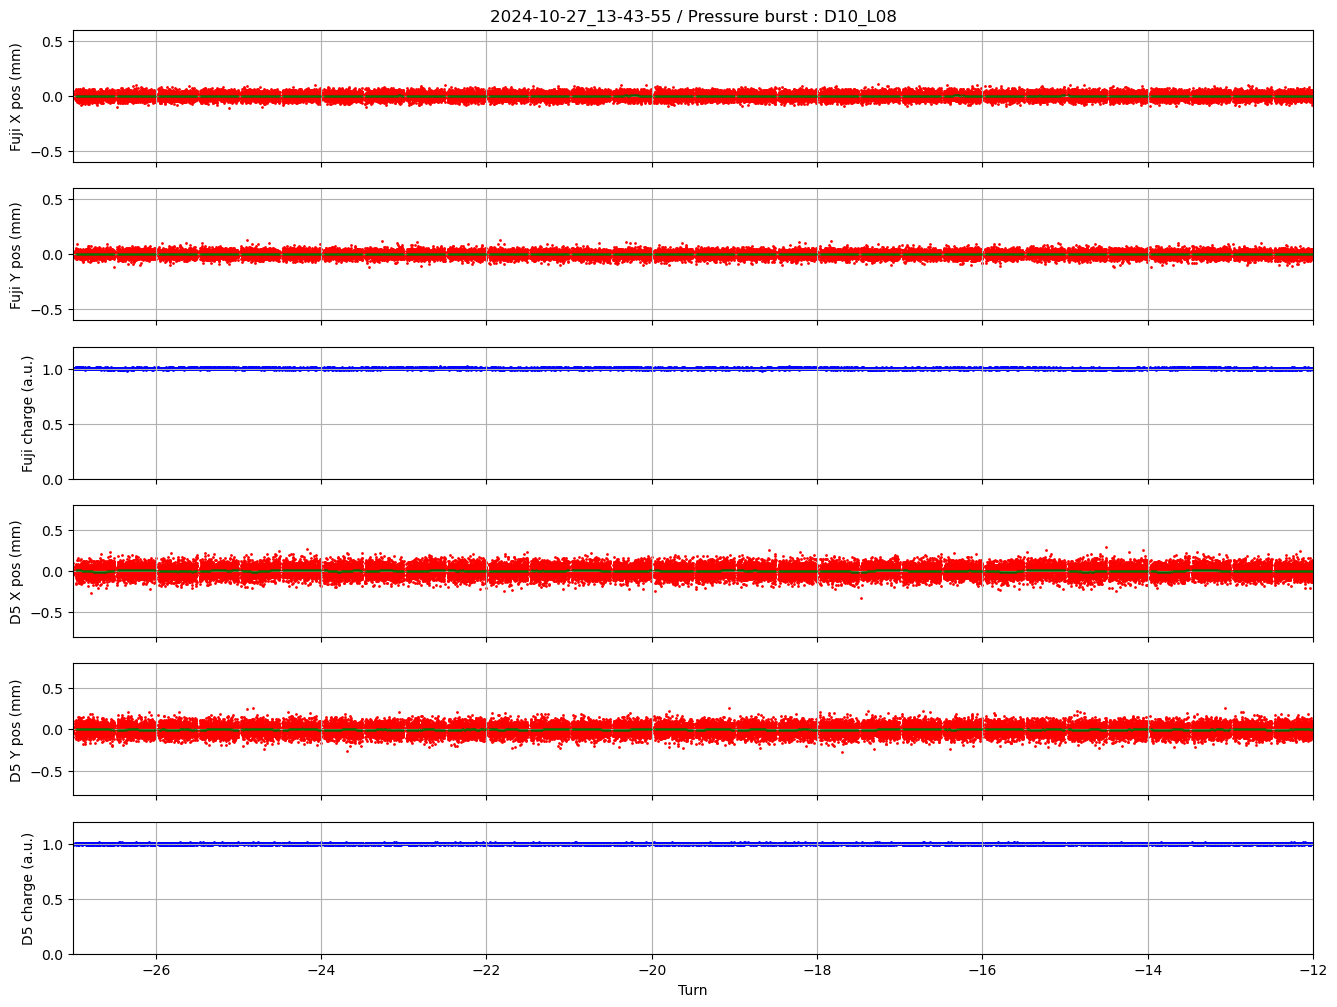

フィット結果:
  傾き (a): -0.130 ± 0.001
  切片 (b): 0.000 ± 0.000


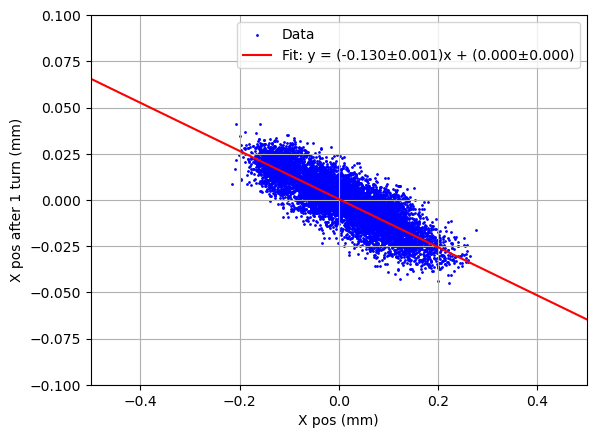

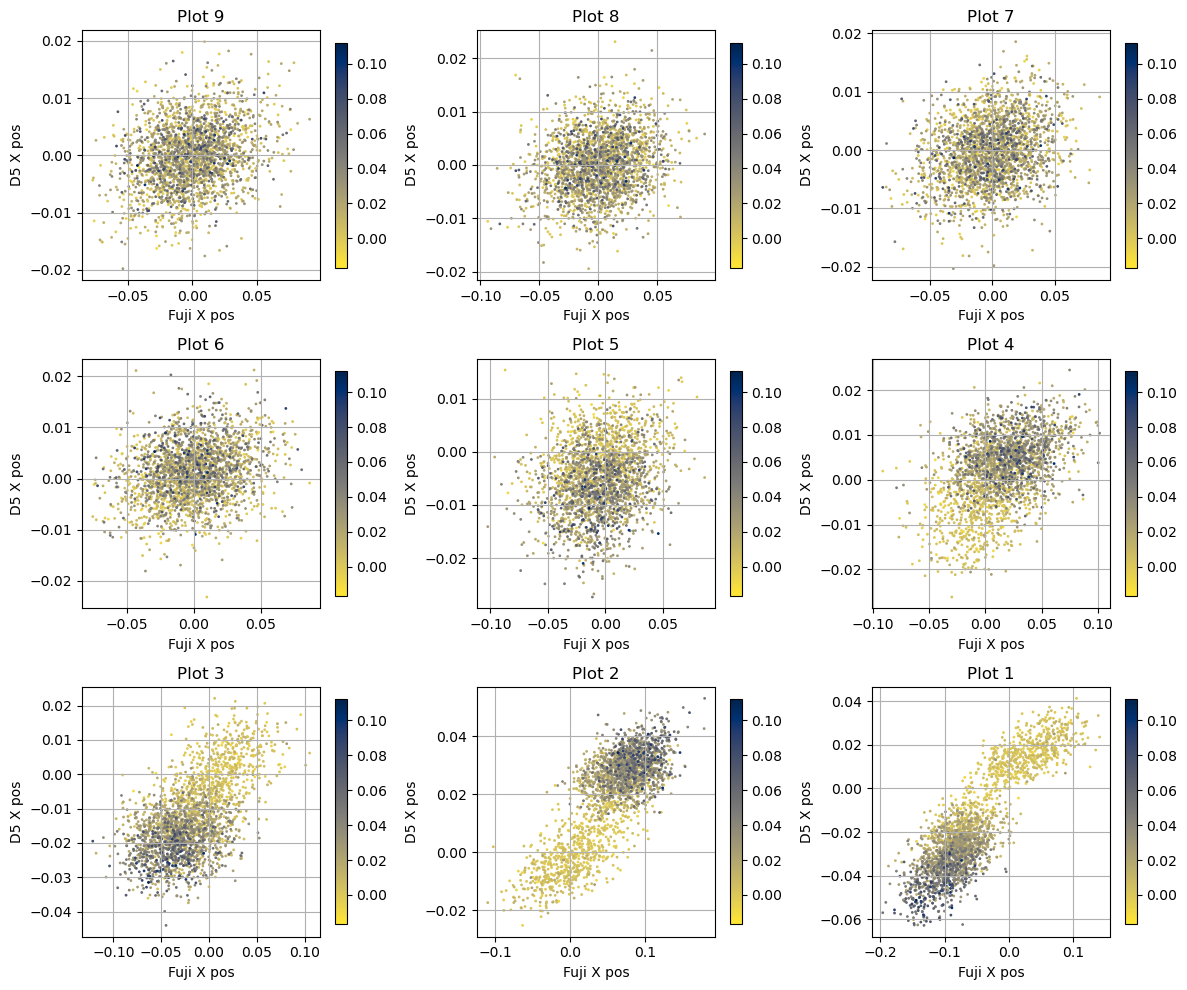

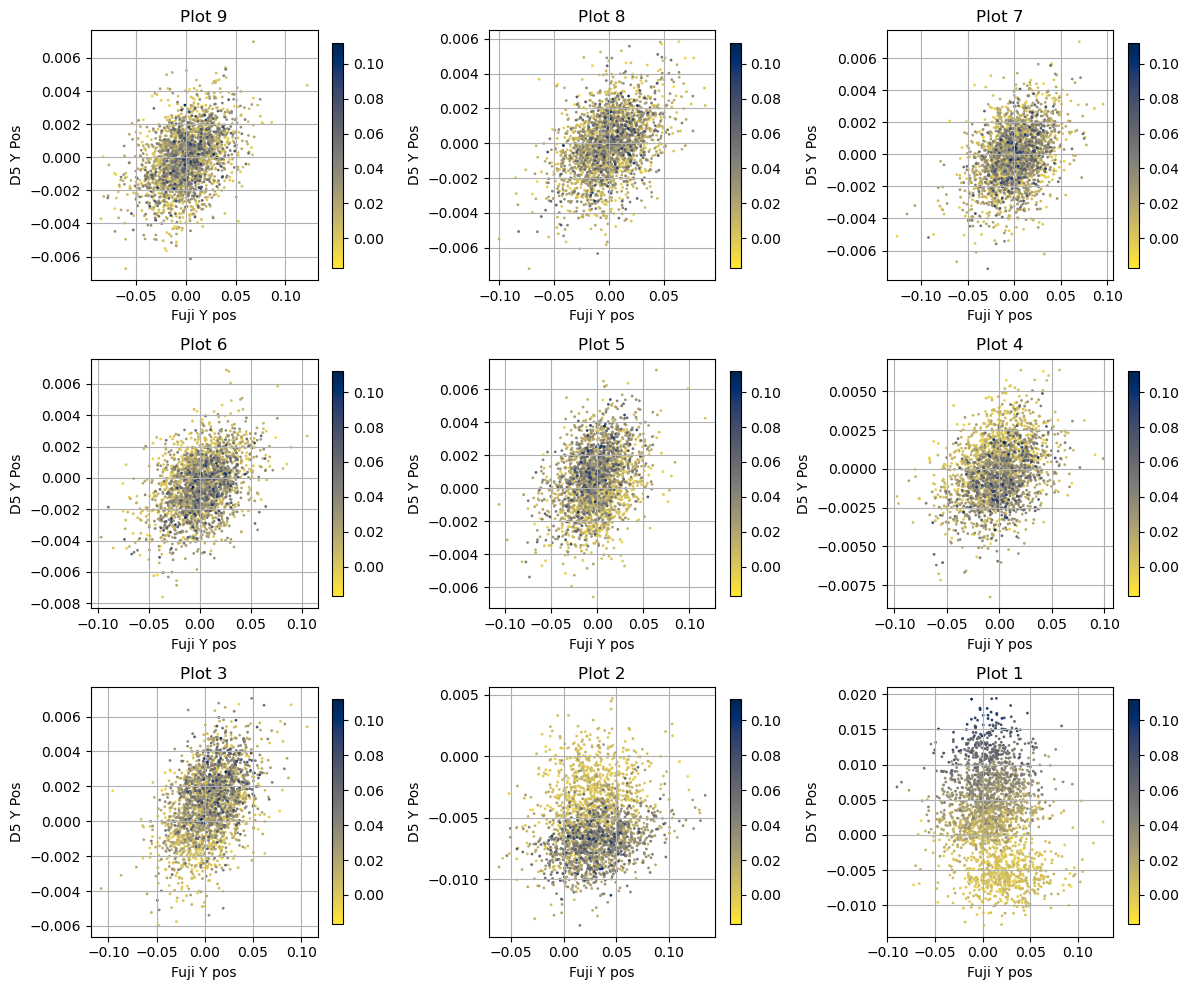

(0.4521005880853848, 0.3272410880266552, 1.210394188396485, 1.2049628886290313)

In [69]:
make_spectrum("LERFUJI_2024-10-27_13-43-55.npz","LERD5_2024-10-27_13-43-55.npz",0,'D10_L08')

-117252
-129836
-124167
-124957


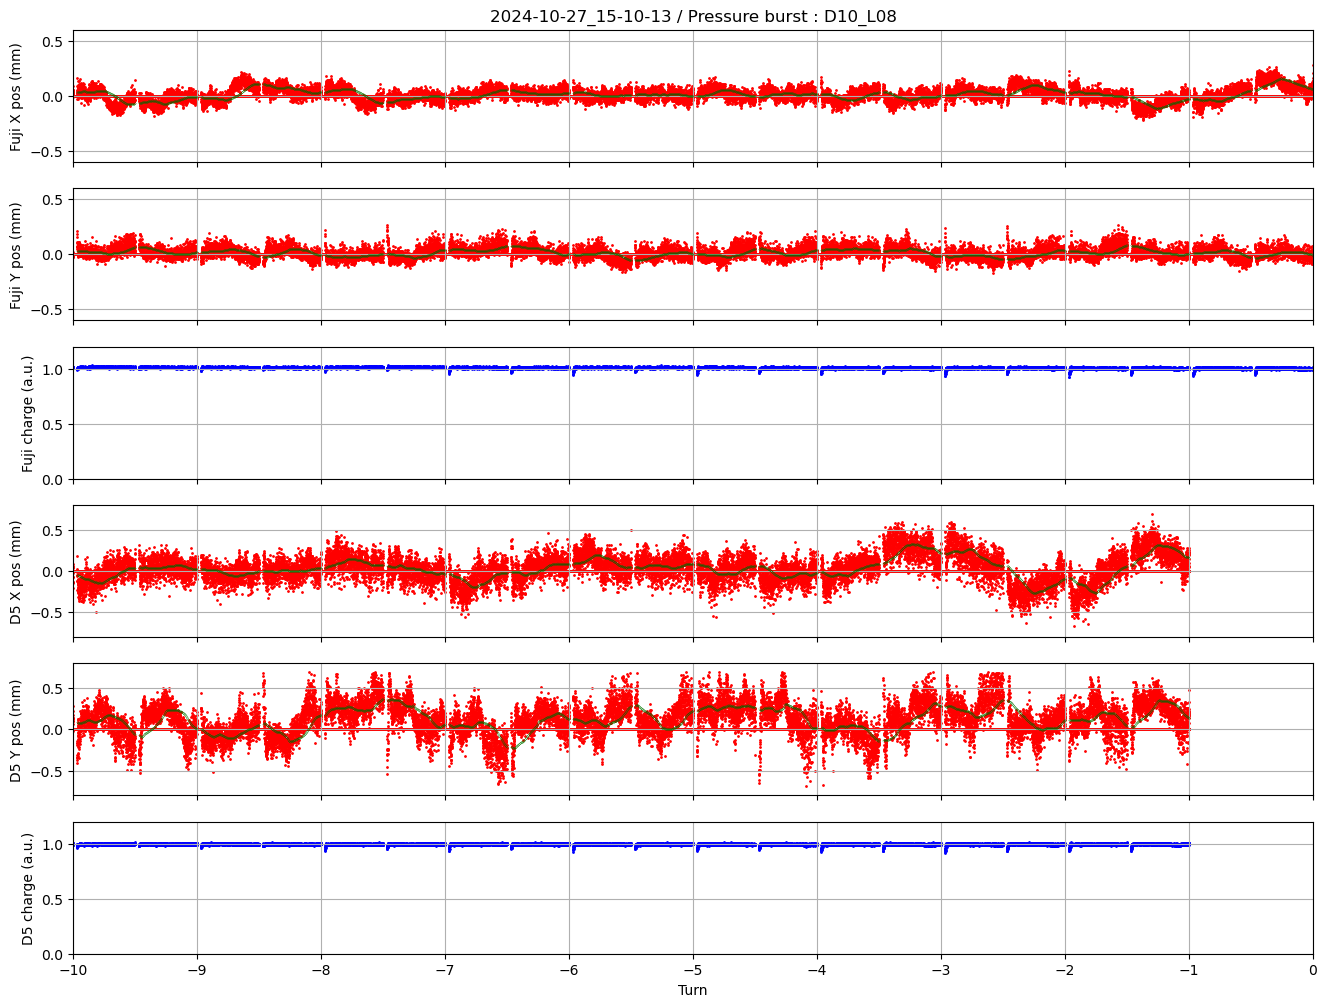

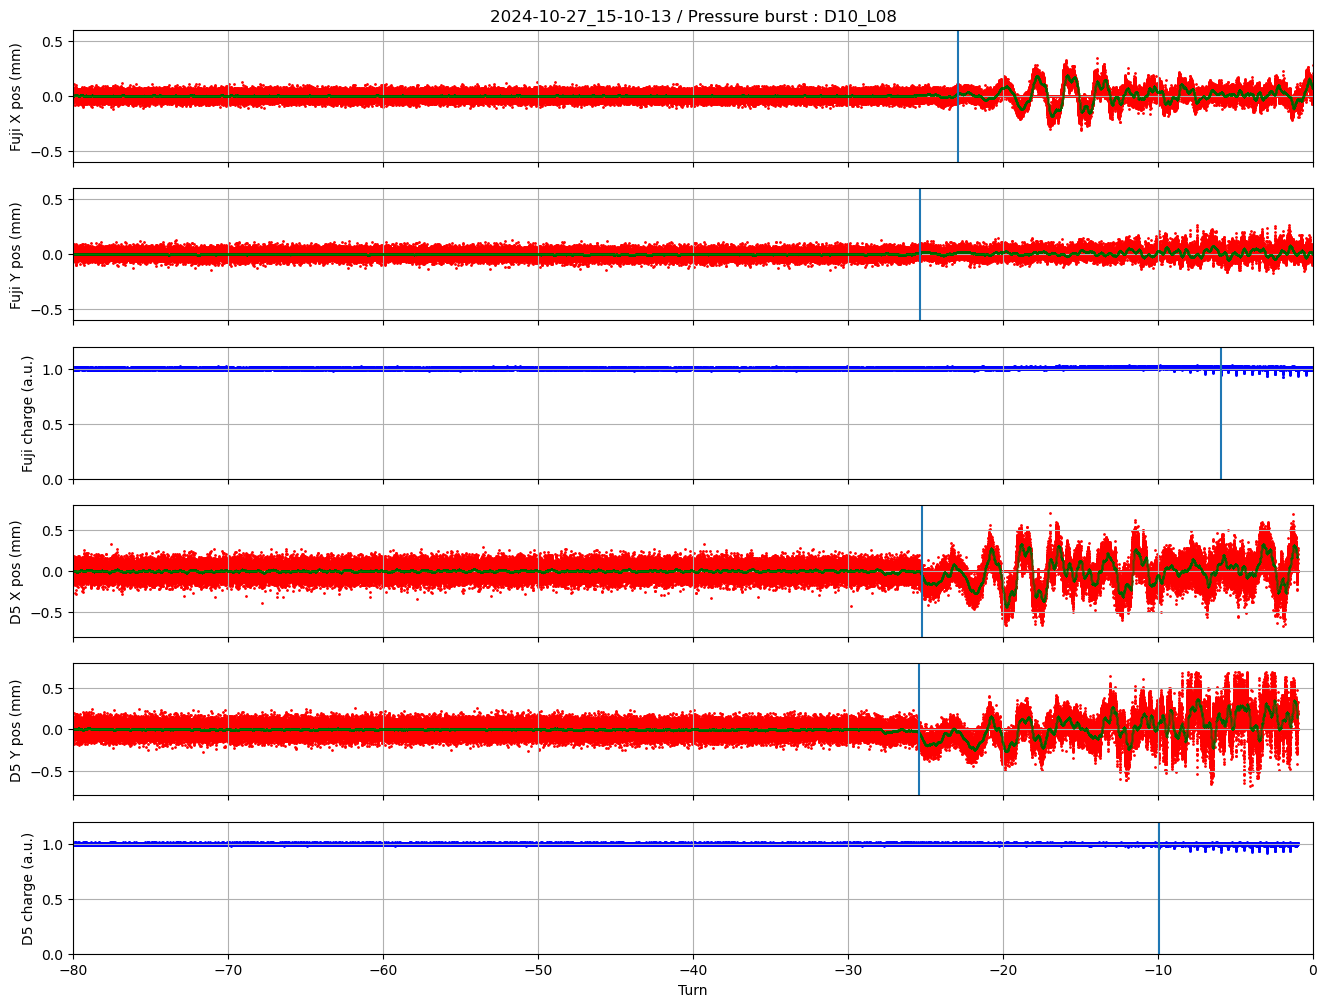

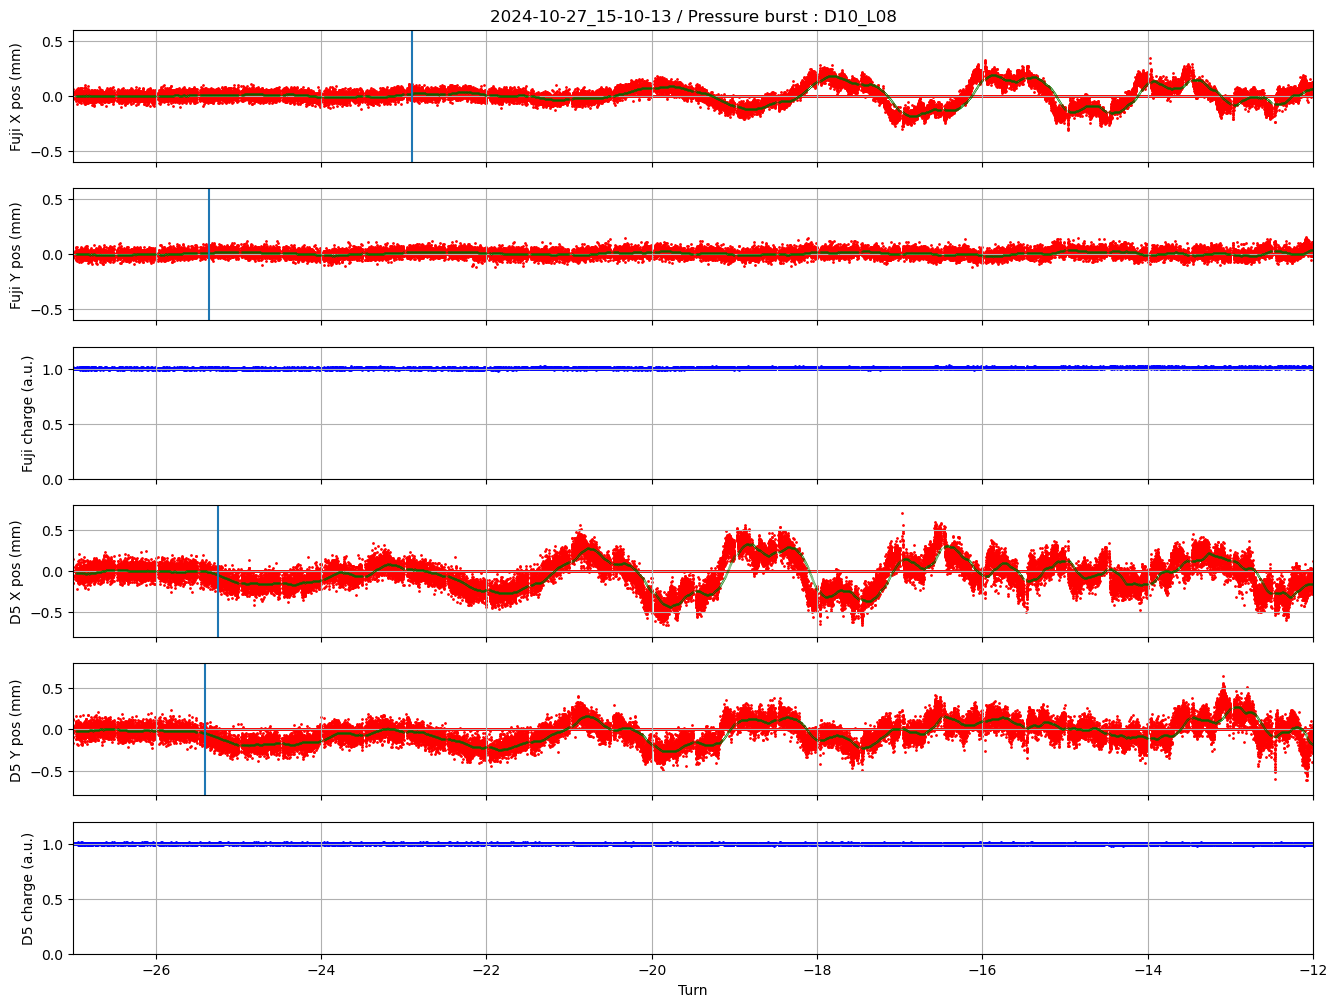

フィット結果:
  傾き (a): -0.923 ± 0.003
  切片 (b): 0.005 ± 0.000


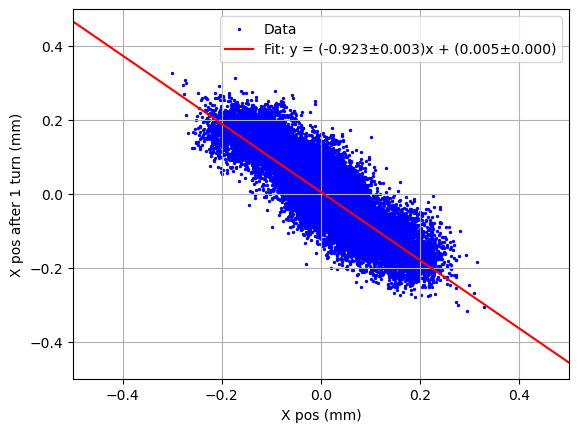

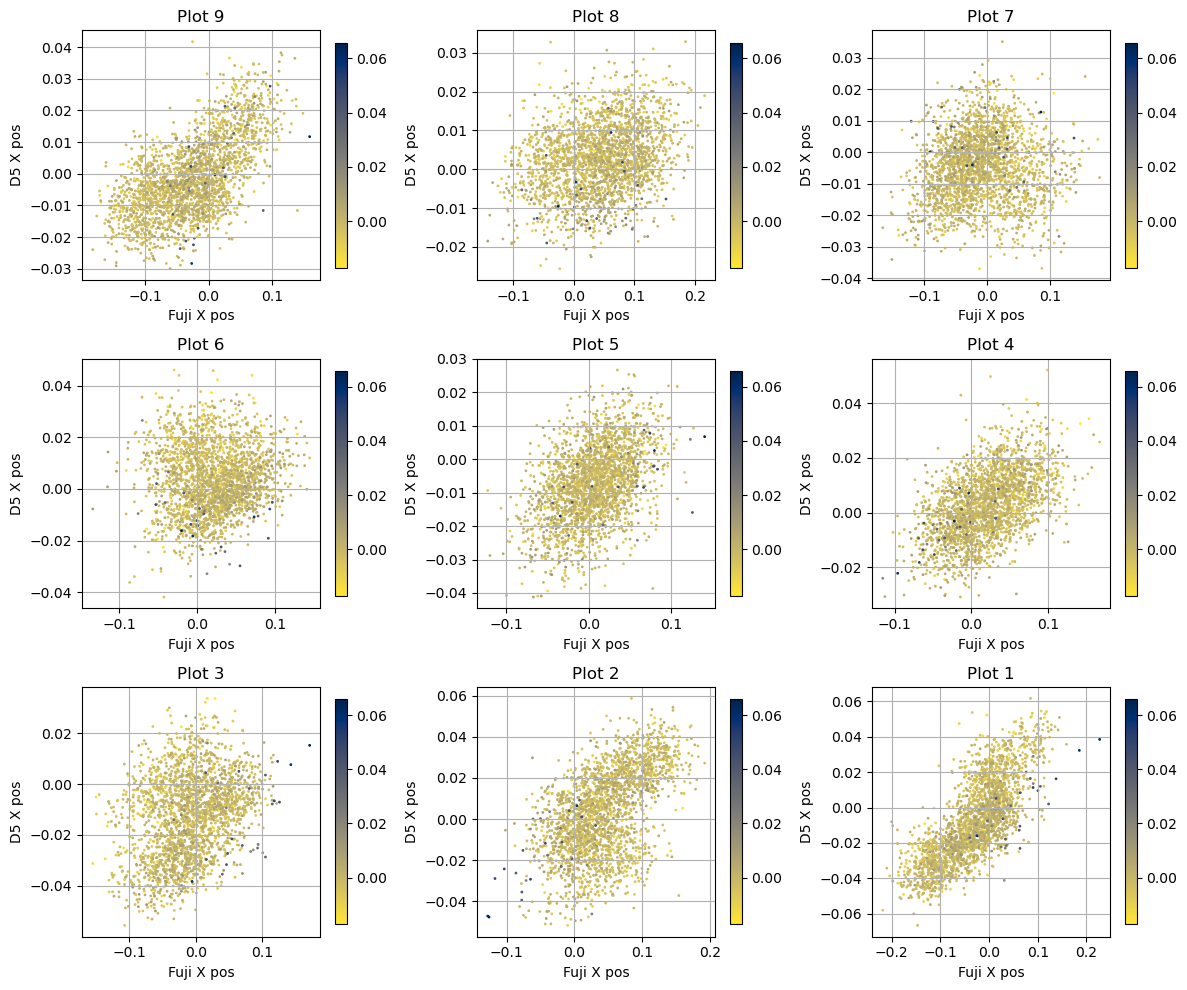

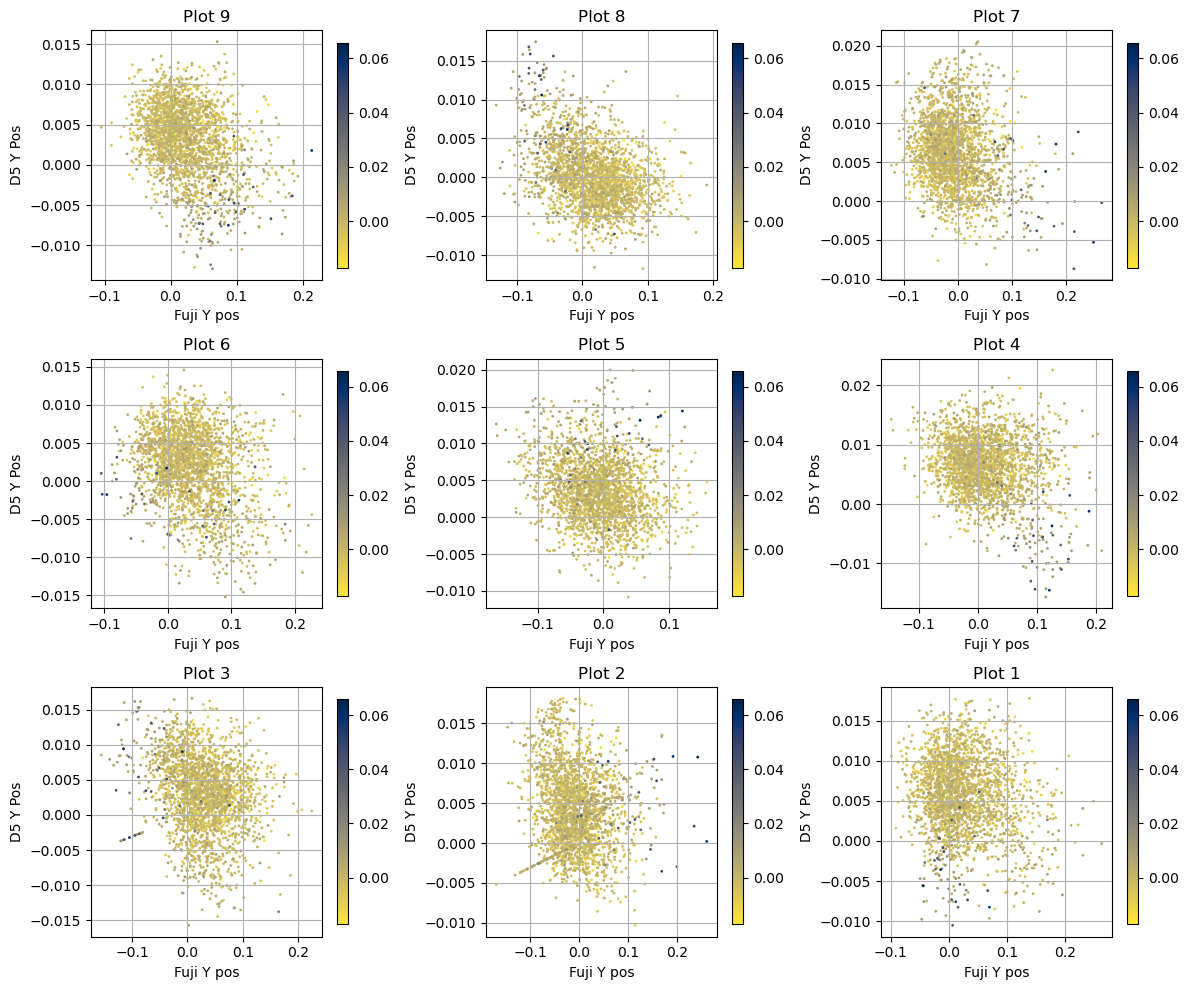

(0.6608049507080623,
 0.43498334322649423,
 1.364181426557657,
 1.3803309643017854)

In [54]:
make_spectrum("LERFUJI_2024-10-27_15-10-13.npz","LERD5_2024-10-27_15-10-13.npz",0,'D10_L08')

In [67]:
np.arctan(-0.13)

-0.12927500404814307